In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#rom tqdm import tqdm

#from bcnf.simulation.physics import physics_ODE_simulation, calculate_point_of_impact
#from bcnf.simulation.camera import record_trajectory
from bcnf.simulation.sampling import generate_data

print('Start')

generate_data(print_acc_rej=True, n=5000, type='parameters', T=4, name='preliminary_data_4s')

Start


100%|██████████| 5000/5000 [3:45:20<00:00,  2.70s/it, accepted=5000, ratio=0.101, rejected=44547]   


Text(0.5, 0, '% of visibility')

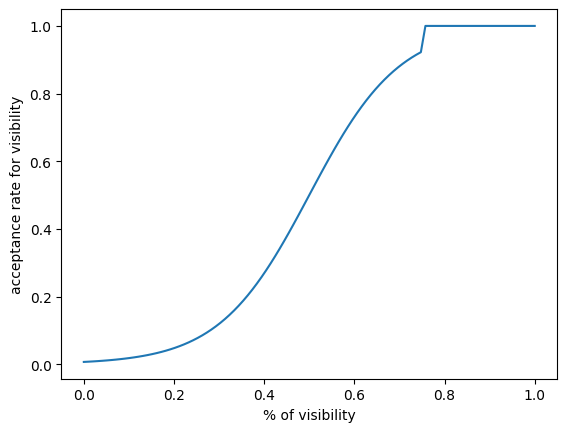

In [2]:
def mod_sigmoid(x):
    if x > 0.75:
        return 1
    else: 
        return 1 / (1 + np.exp(-(x-0.5)*10))
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sigmoid(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for visibility')
plt.xlabel('% of visibility')

Text(0.5, 0, '% of travel distance (reference: 50 m)')

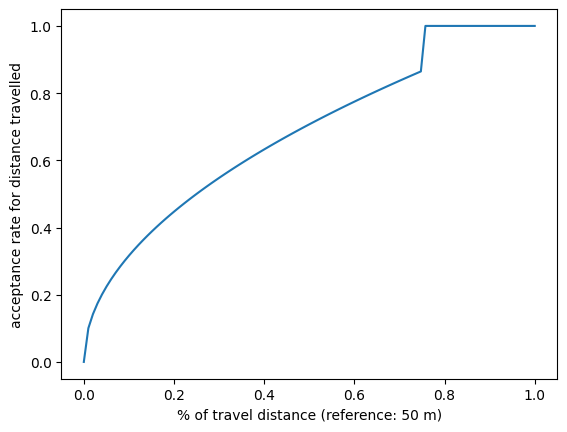

In [3]:
def mod_sqrt(x):
    if x > 0.75:
        return 1
    else: 
        return np.sqrt(x)
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sqrt(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for distance travelled')
plt.xlabel('% of travel distance (reference: 50 m)')

In [6]:
# load df from pickle

from bcnf.utils import get_dir
import pickle
import os

with open(os.path.join(get_dir('data', 'bcnf-data'), 'preliminary_data_4s.pkl'), 'rb') as f:
    data = pickle.load(f)

# print length of data
print(len(data['x0_x']))

500


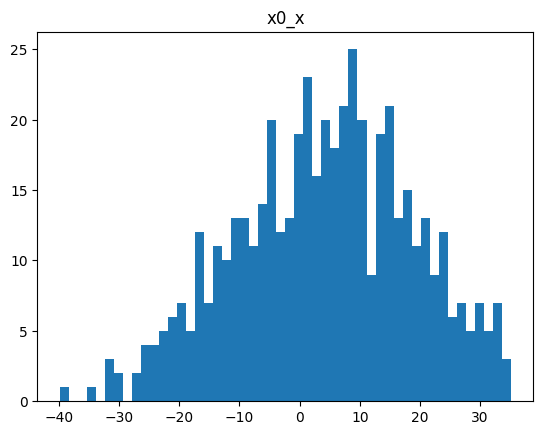

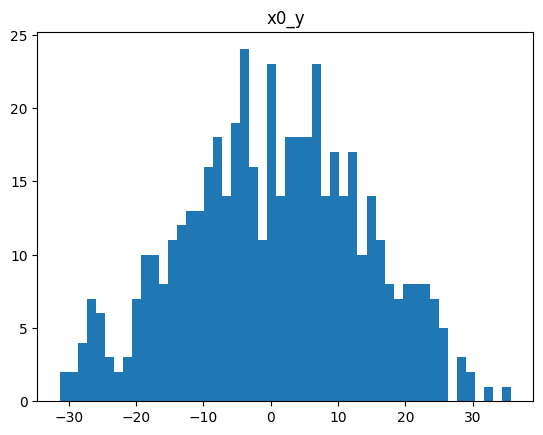

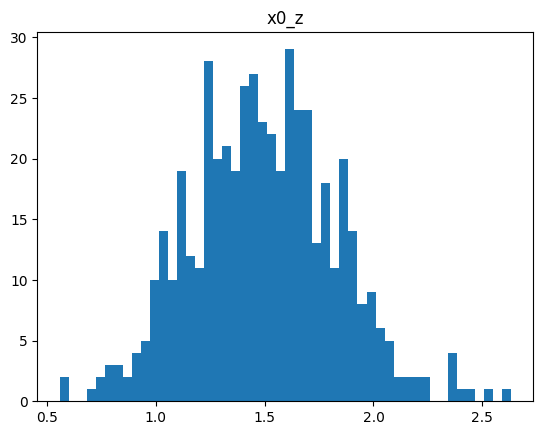

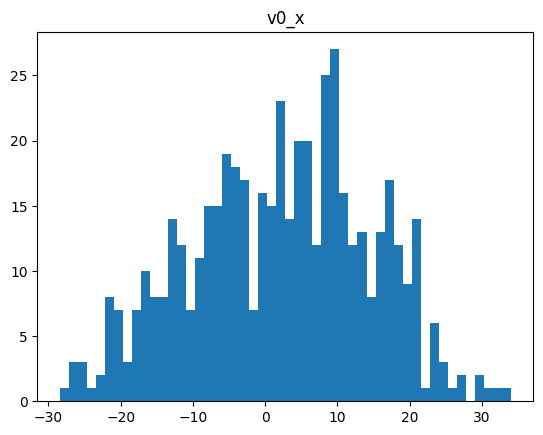

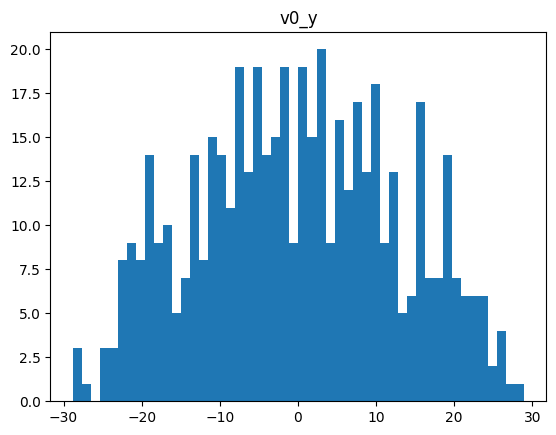

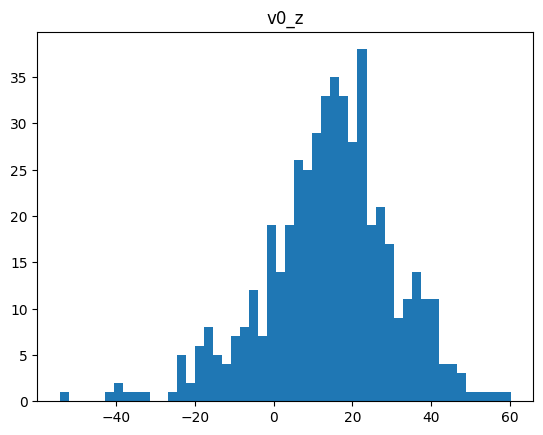

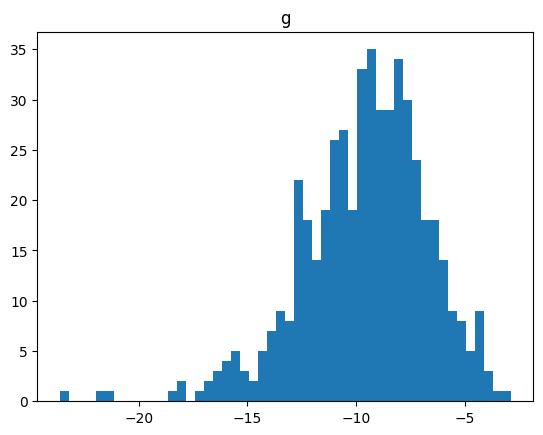

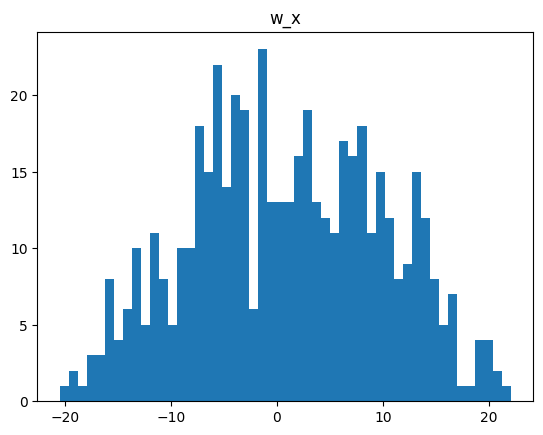

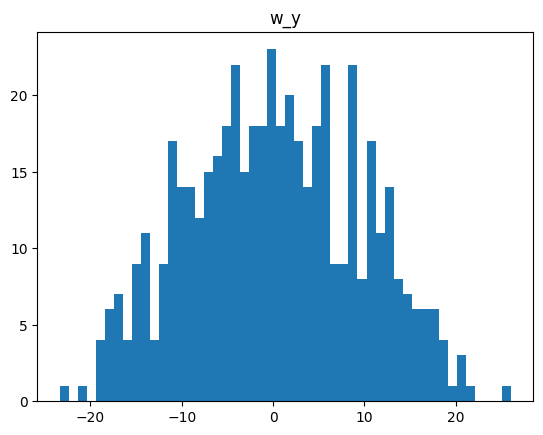

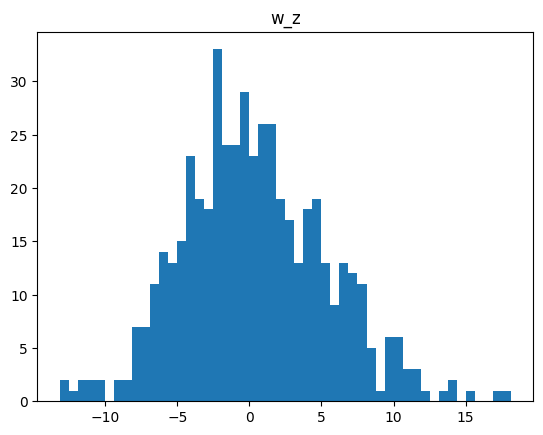

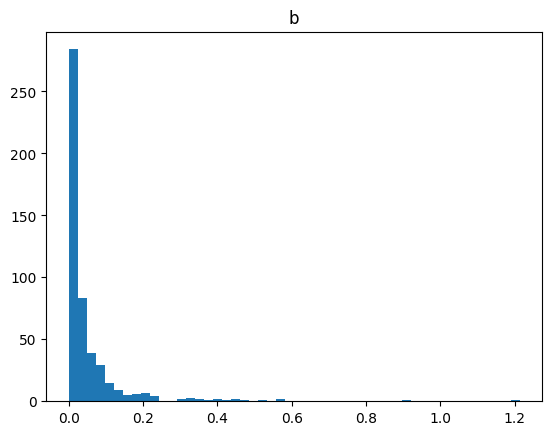

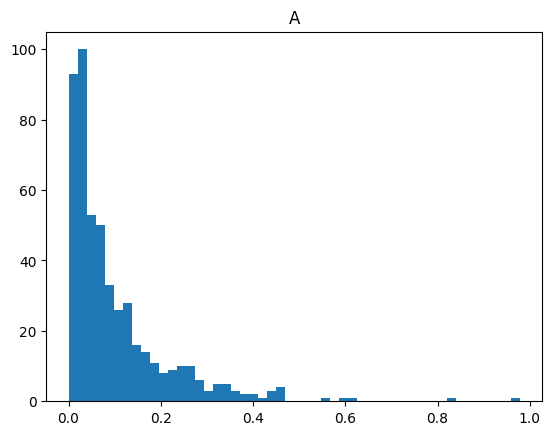

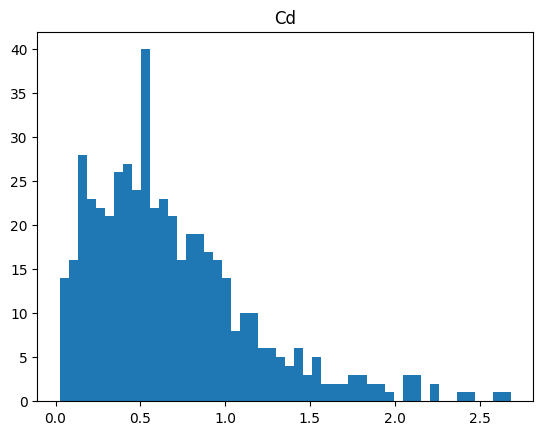

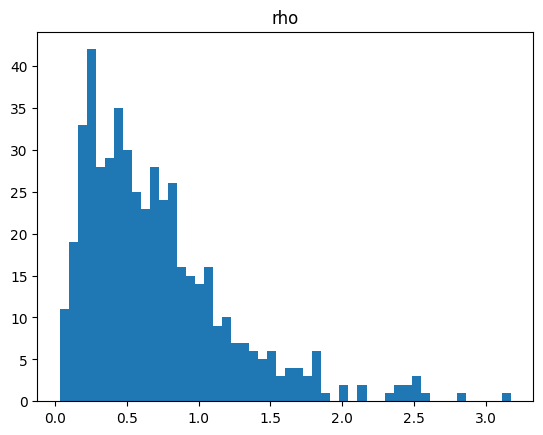

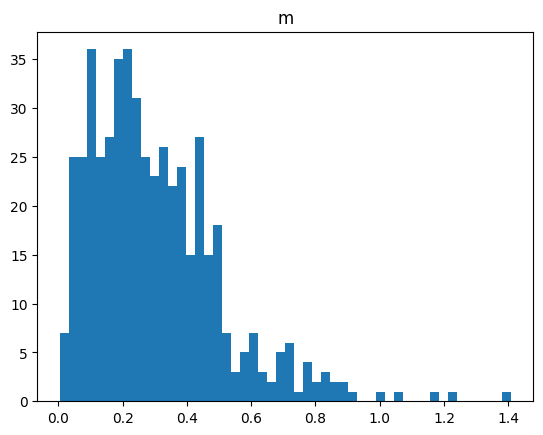

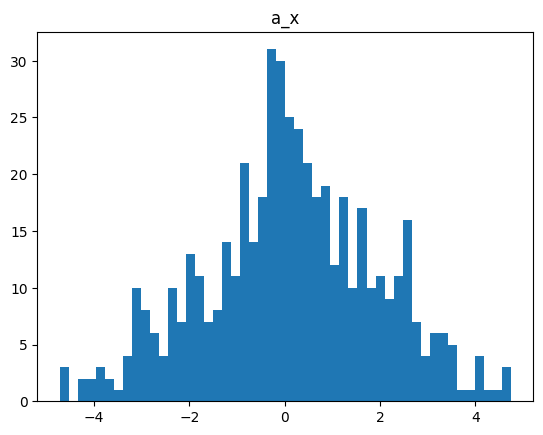

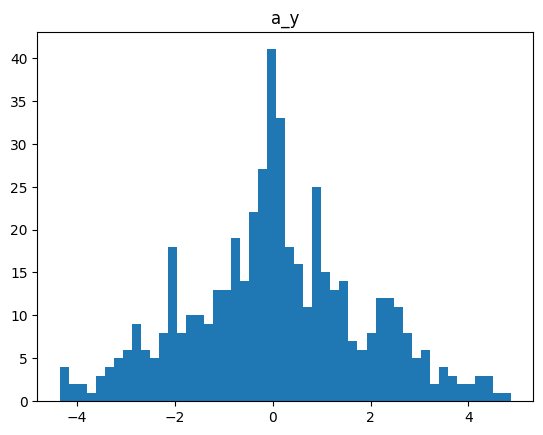

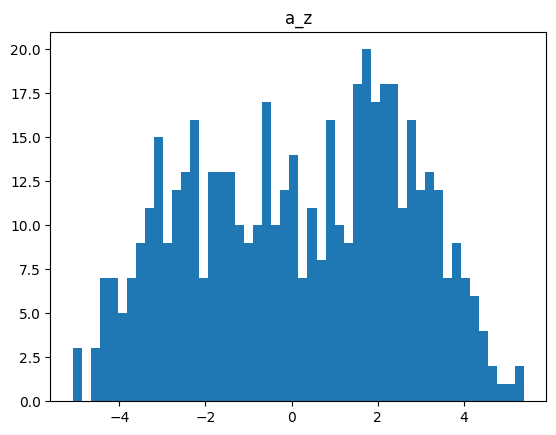

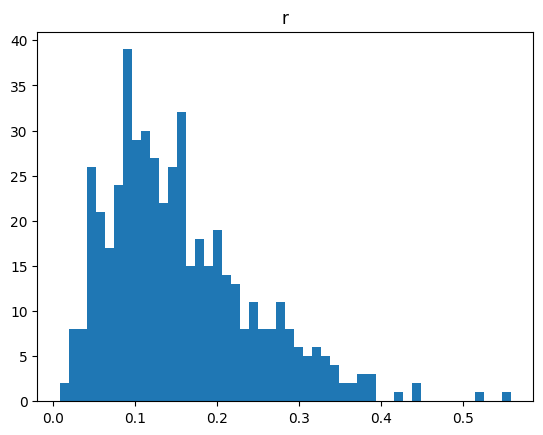

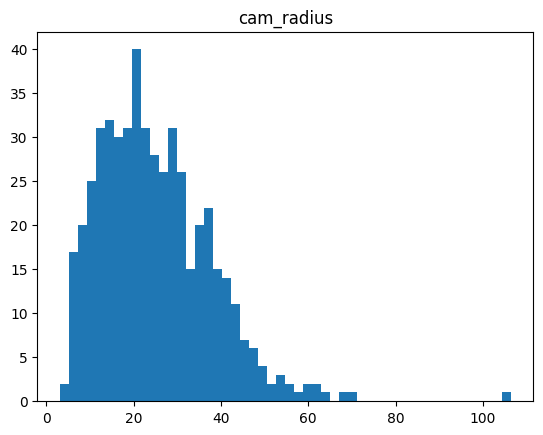

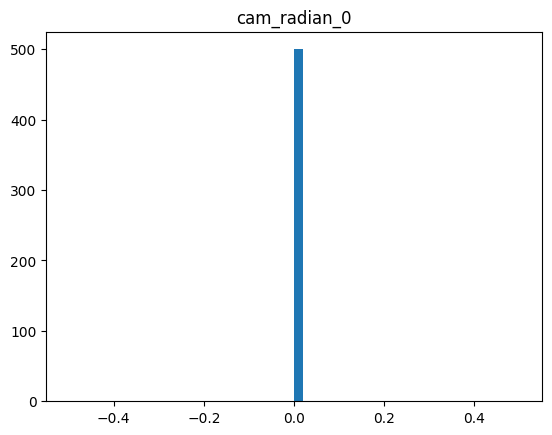

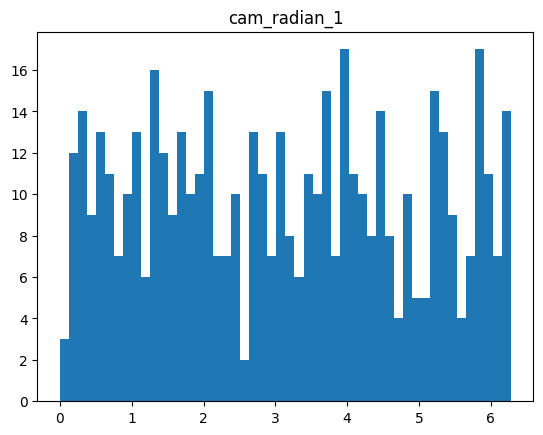

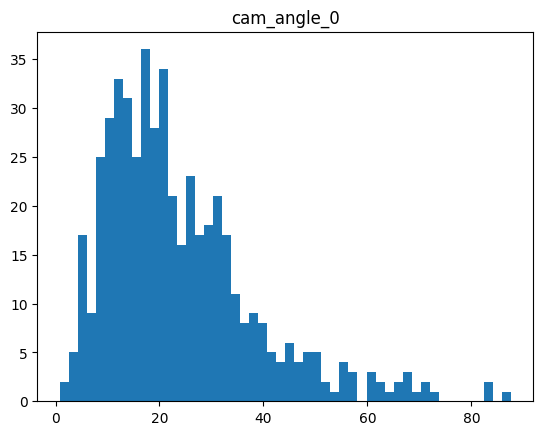

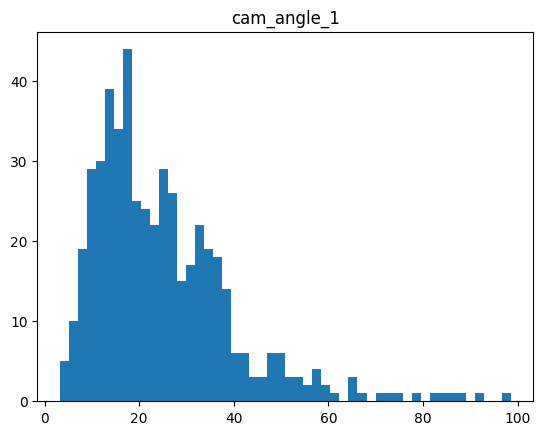

In [9]:
# plot histogram of each variable 
for key in data.keys():
    if (key == 'cams') or (key == 'traj'):
        continue

    if (key != 'cam_radian') and (key != 'cam_angles'):
        plt.hist(data[key], bins=50)
        plt.title(key)
        plt.show()
    else:
        concatenated = np.concatenate(data[key])
        plt.hist(concatenated, bins=50)
        plt.title(key)
        plt.show()

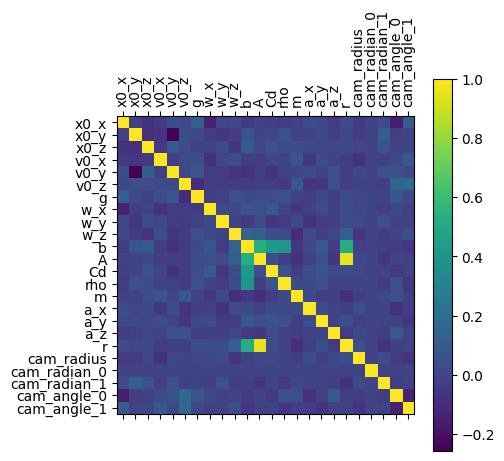

In [8]:
from bcnf.utils import get_dir
import pickle
import os

with open(os.path.join(get_dir('data', 'bcnf-data'), 'data.pkl'), 'rb') as f:
    data = pickle.load(f)

# take cam_radians and create new entry per array entry

def cov_coeff(a, b):
    # if a or b is only zeros, return 0
    if np.all(a == 0) and np.all(b == 0):
        return 1
    elif  np.all(a == 0) or np.all(b == 0):
        return 0
    else:
        return np.corrcoef(a, b)[0, 1]

cam_radians = data['cam_radian']
num_cam_radians = len(cam_radians[0])

for i in range(num_cam_radians):
    #data['cam_radian_' + str(i)] = []
    data['cam_radian_' + str(i)] = [x[i] for x in cam_radians]

###
cam_angles = data['cam_angles']
num_cam_angles = len(cam_angles[0])

for i in range(num_cam_angles):
    #data['cam_angle_' + str(i)] = []
    data['cam_angle_' + str(i)] = [x[i] for x in cam_angles]

data.pop('cams')
data.pop('traj')
data.pop('cam_radian')
data.pop('cam_angles')

# plot correlation matrix
import pandas as pd
df = pd.DataFrame(data)
plt.matshow(df.corr(method=cov_coeff))
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()
plt.show()

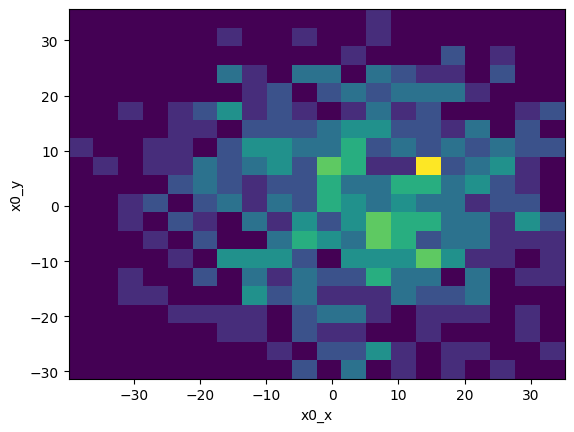

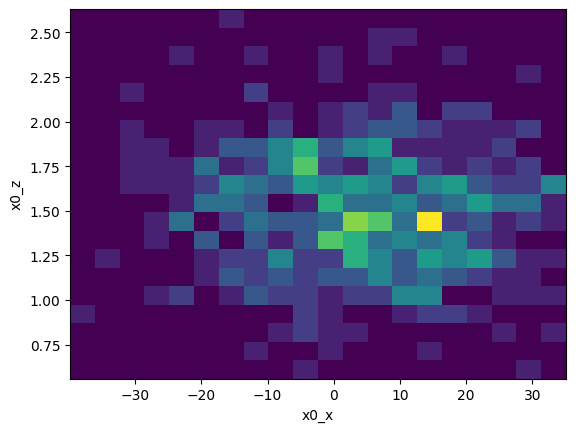

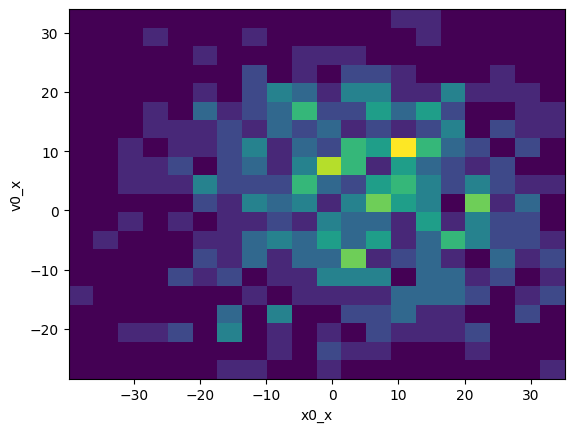

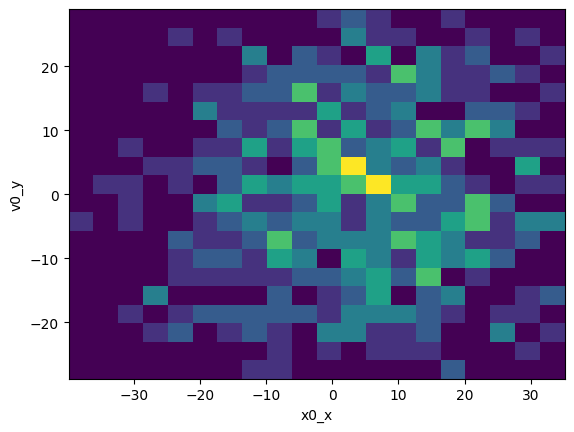

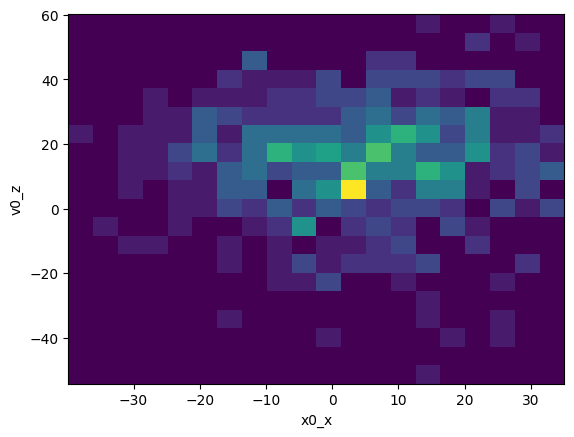

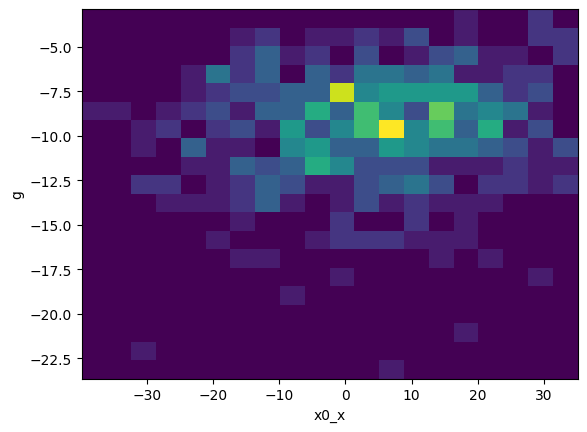

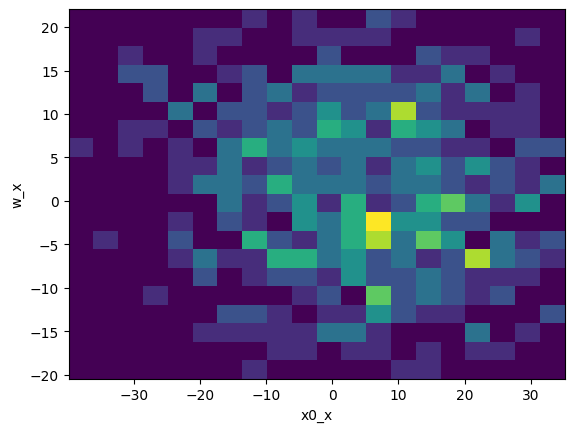

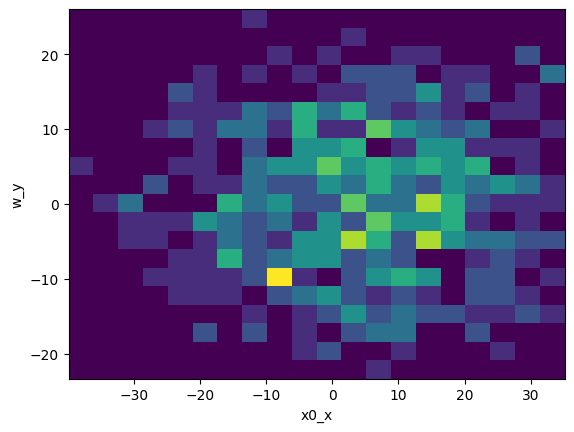

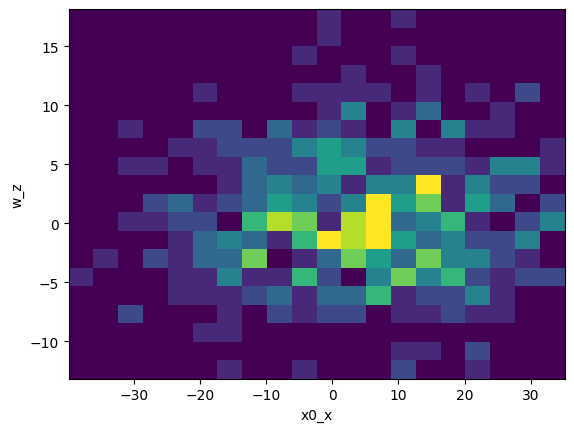

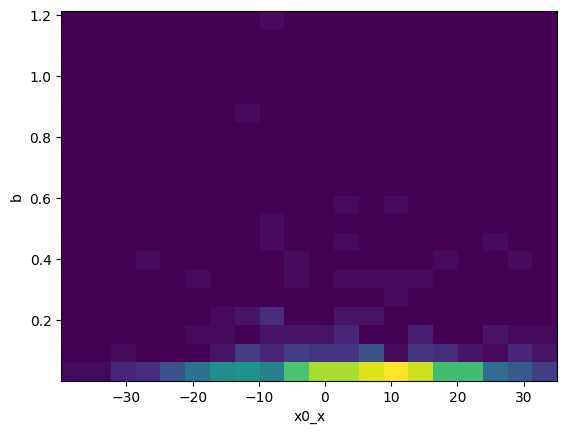

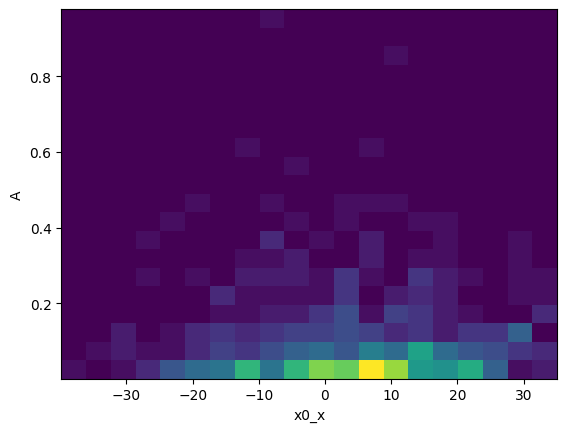

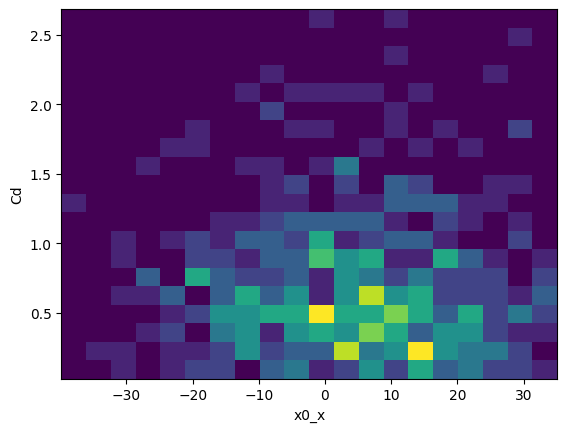

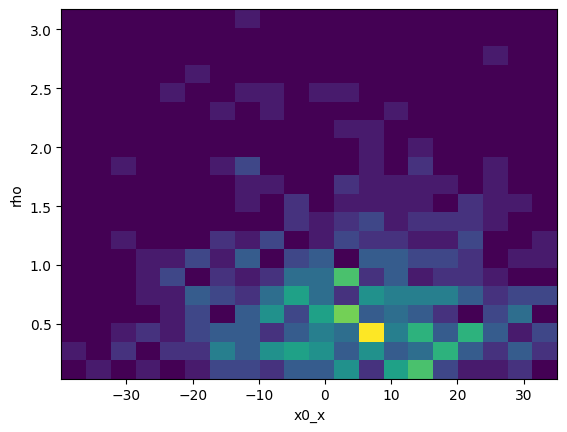

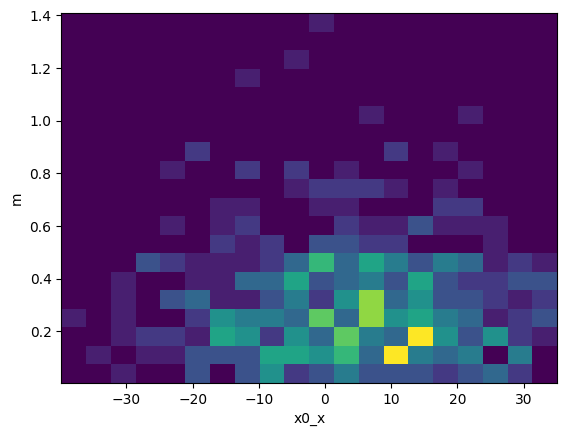

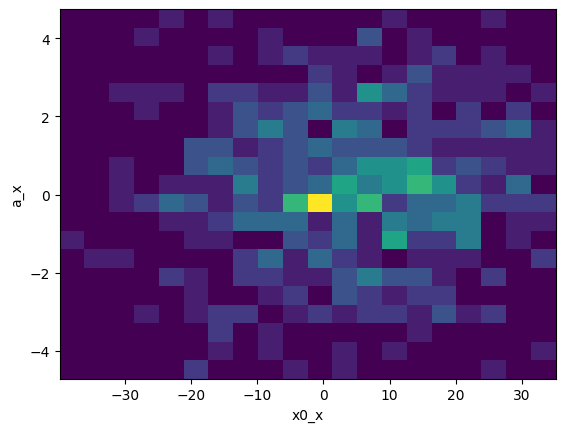

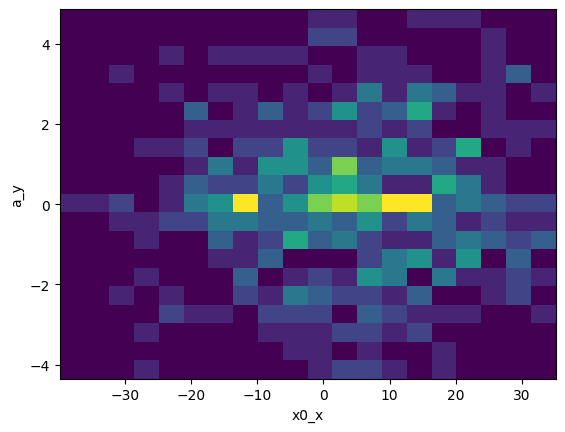

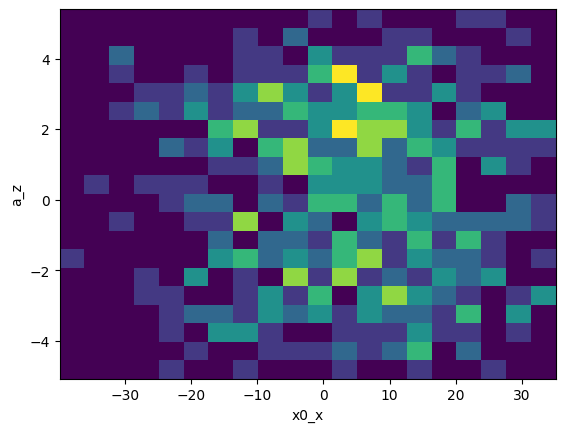

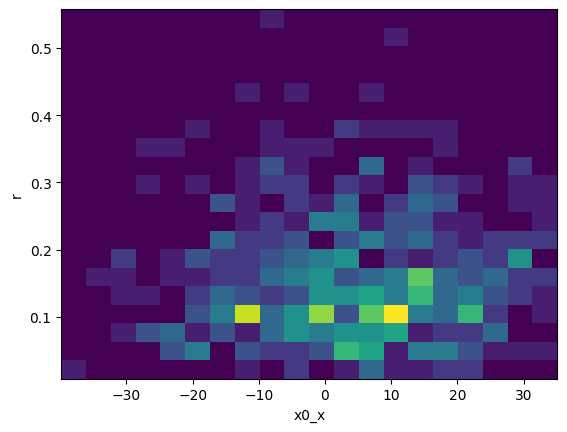

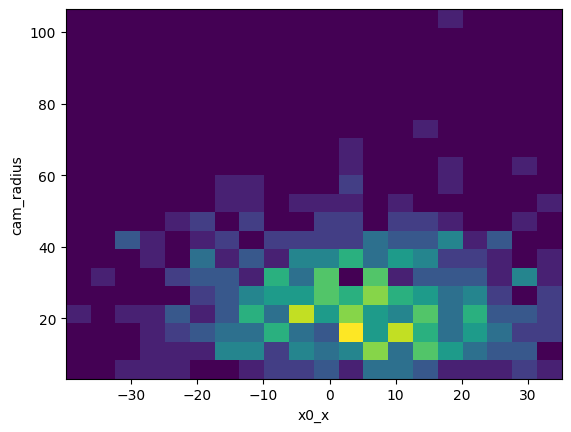

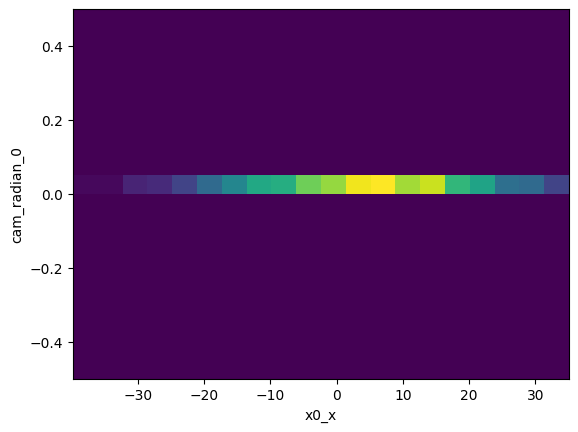

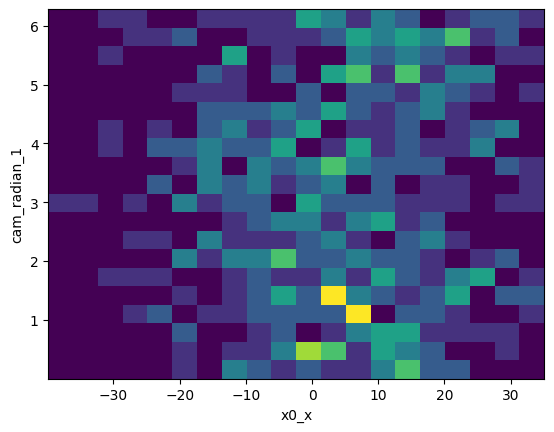

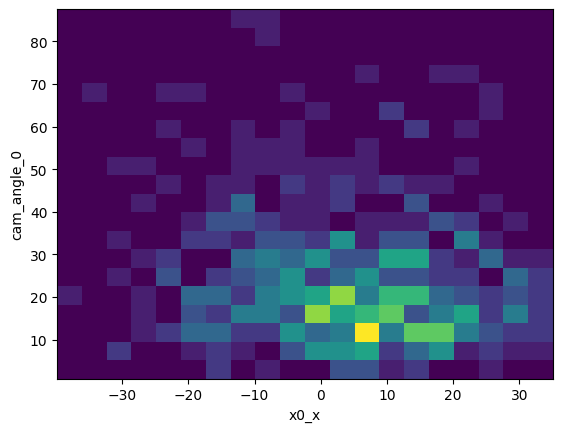

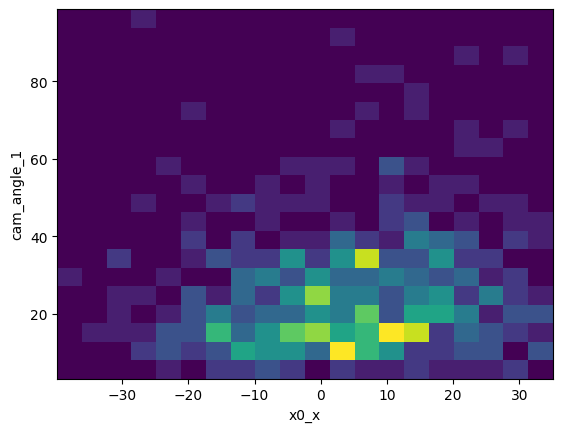

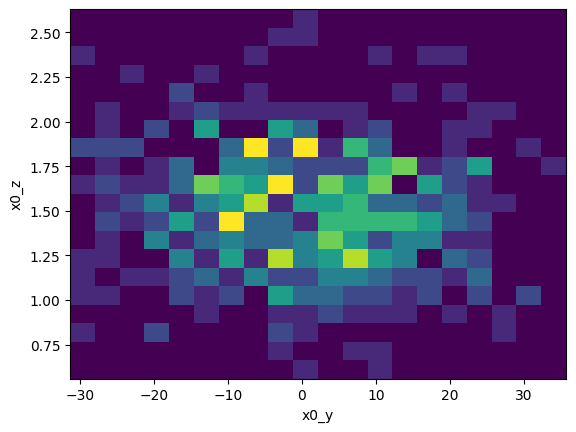

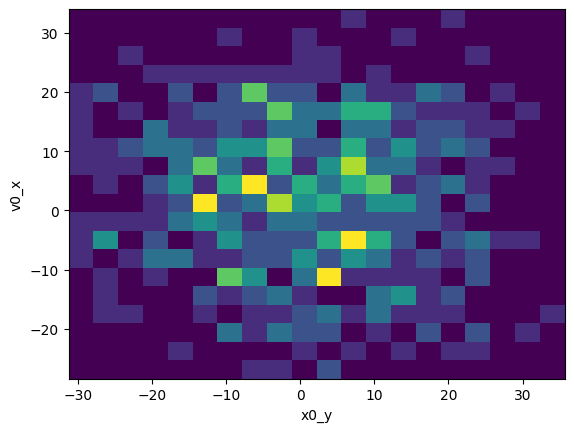

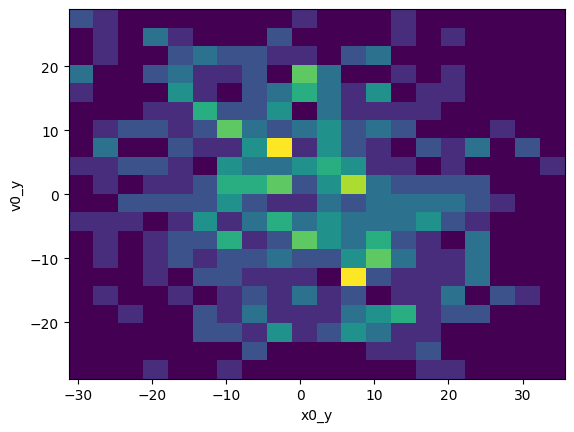

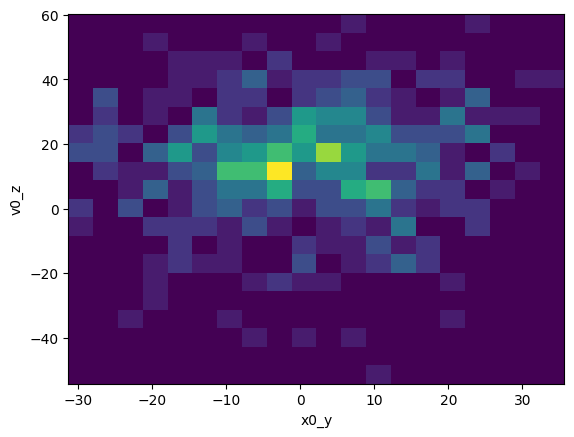

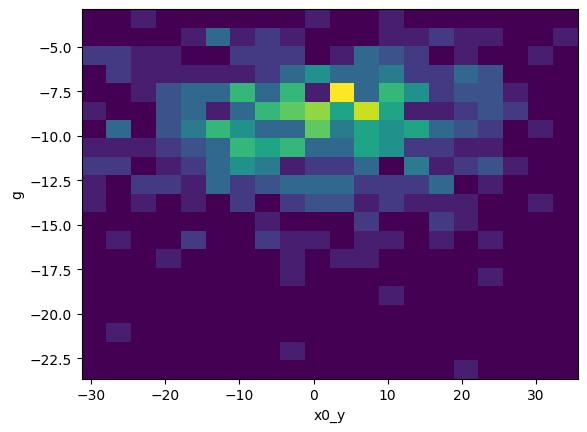

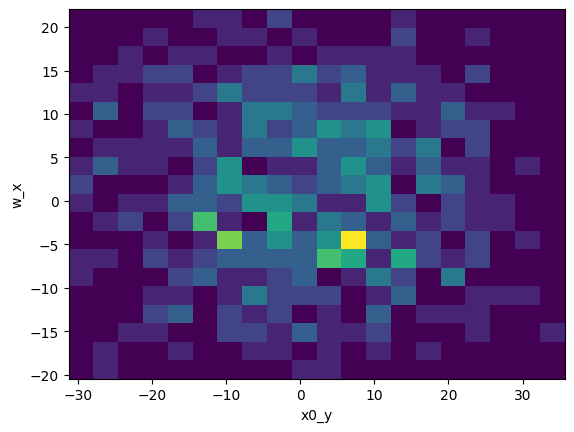

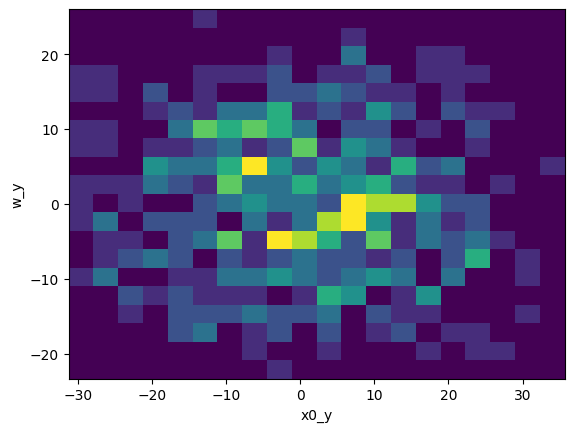

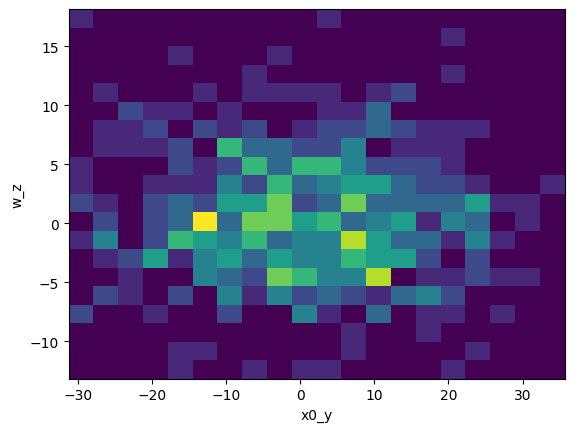

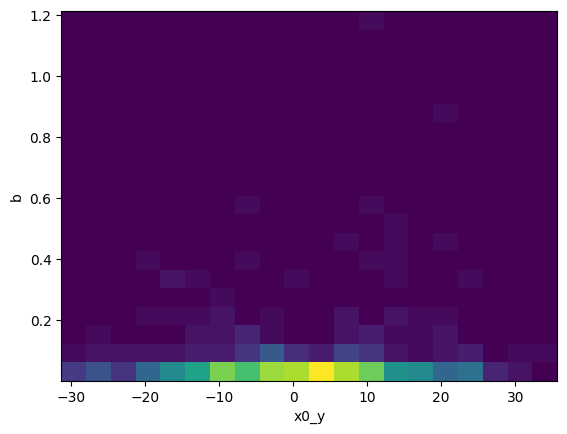

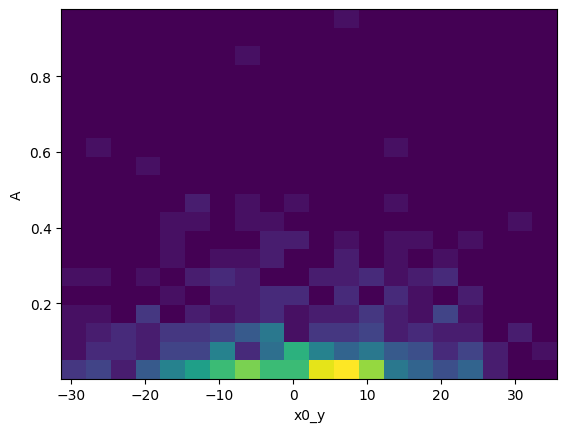

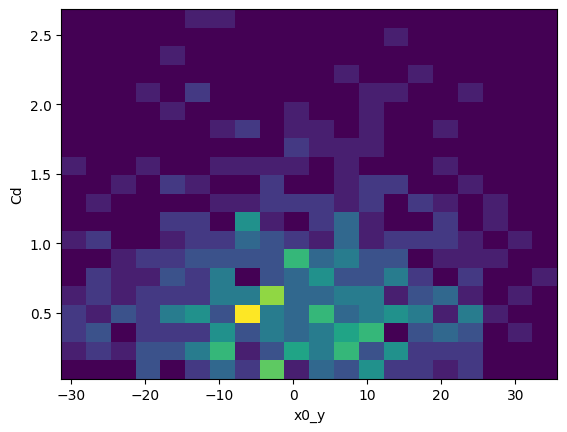

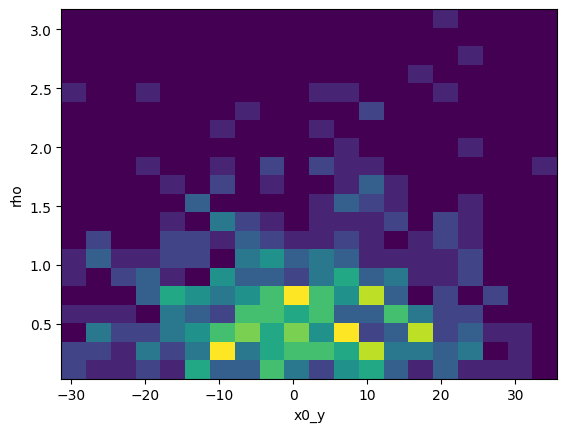

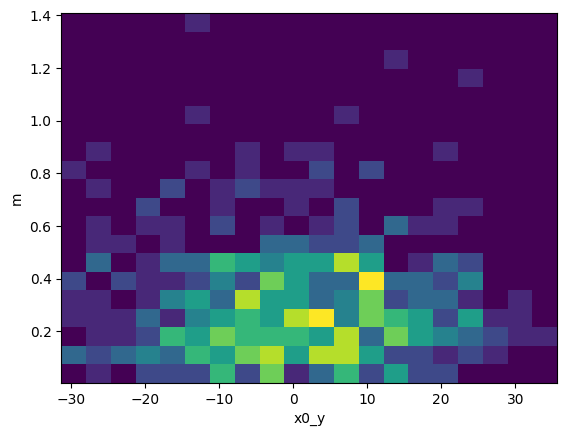

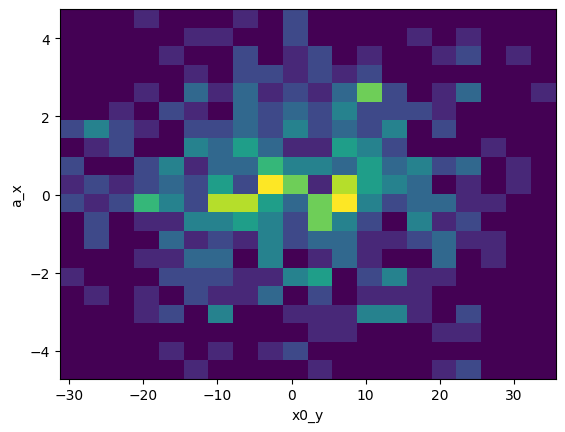

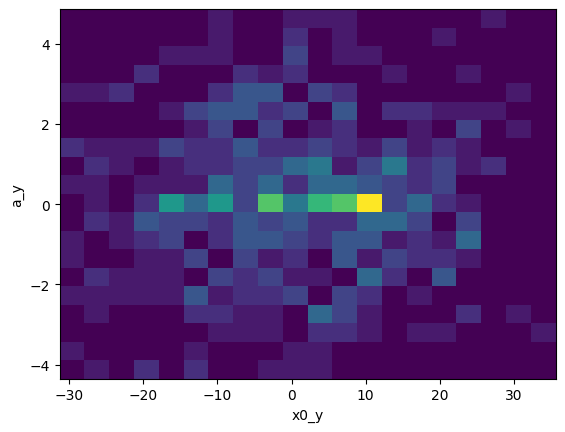

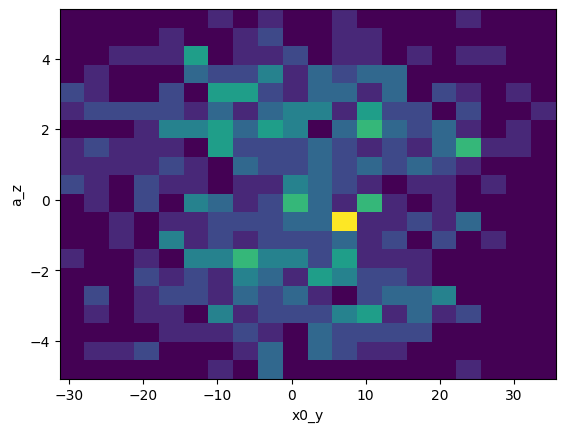

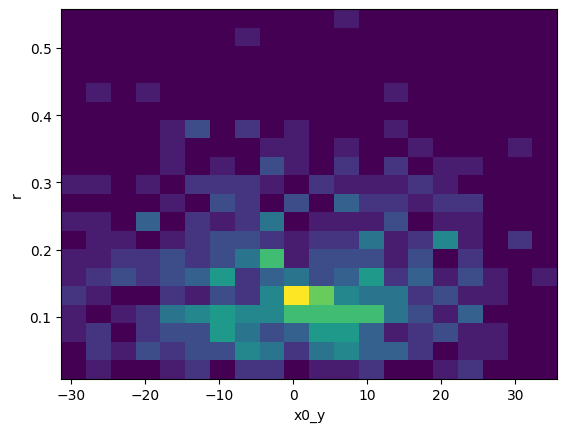

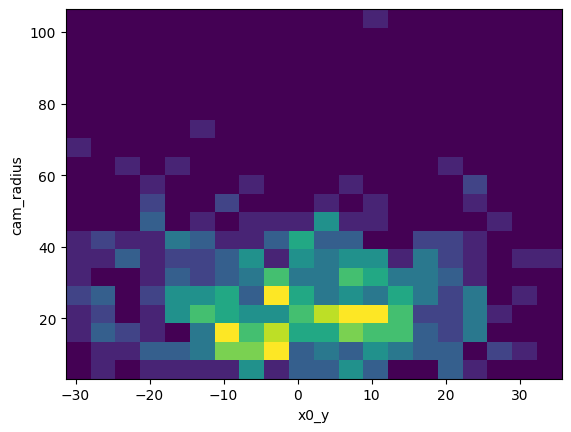

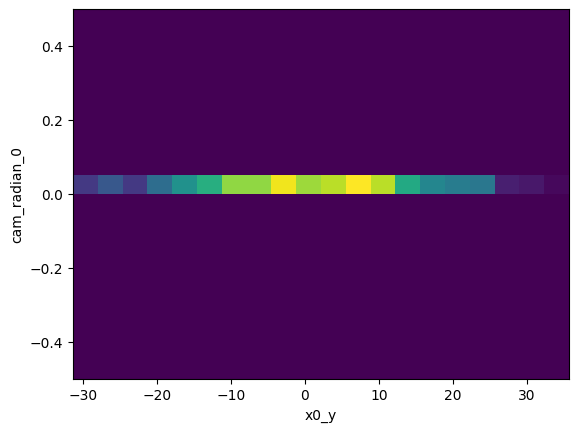

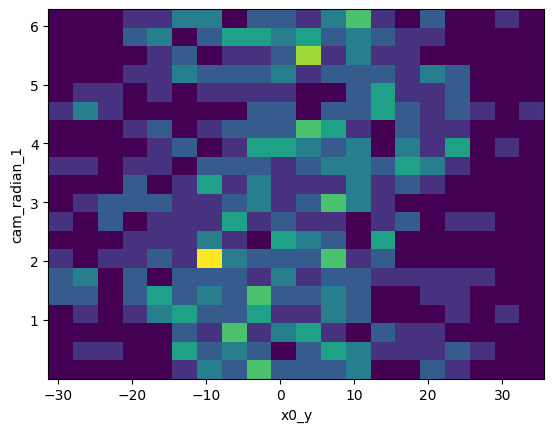

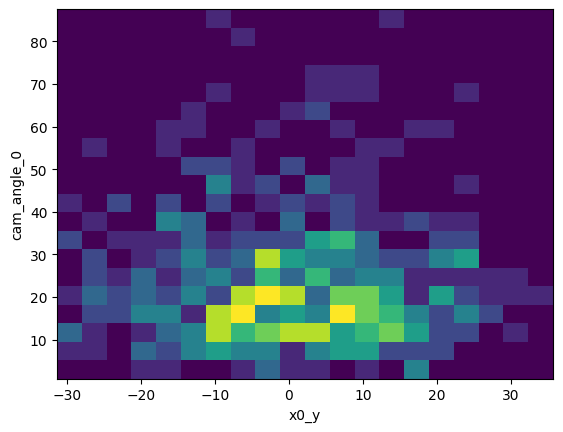

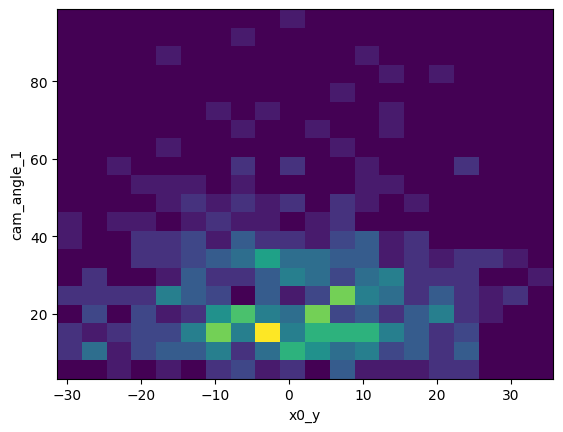

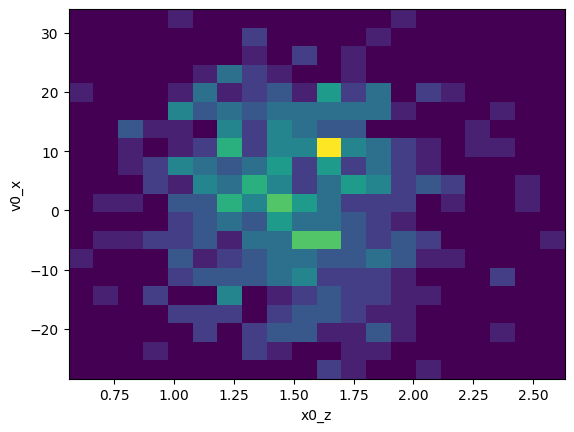

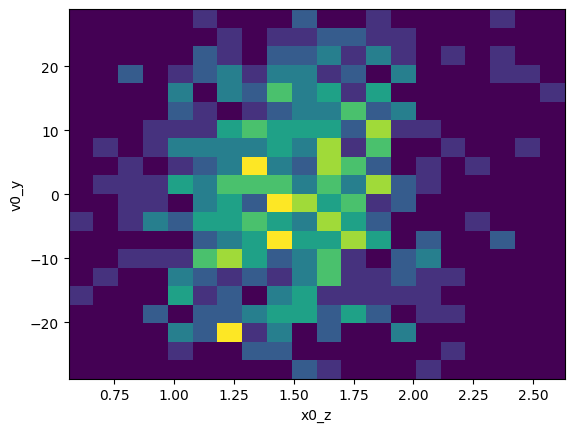

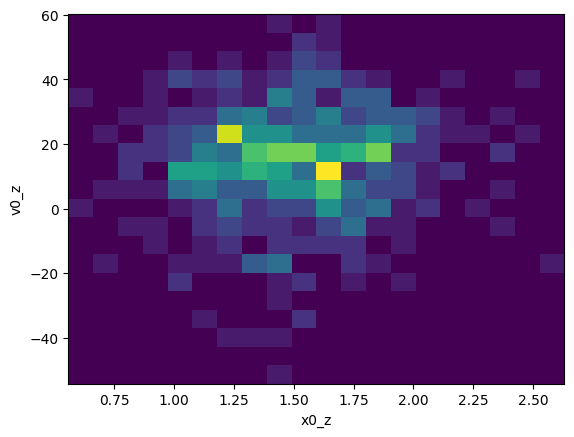

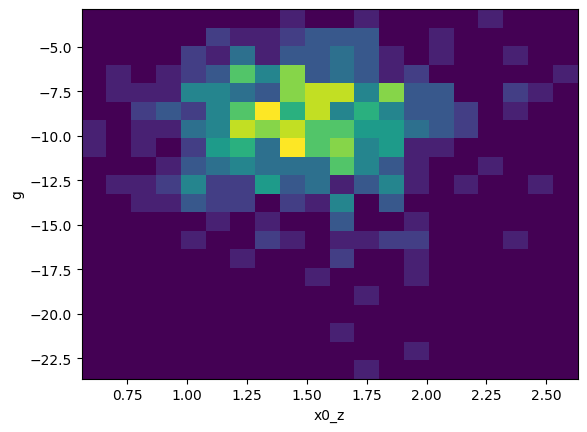

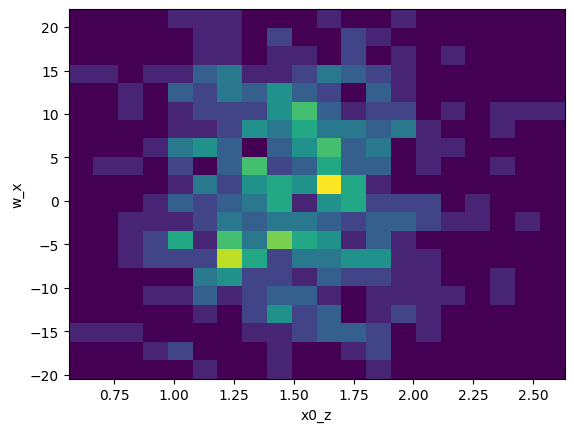

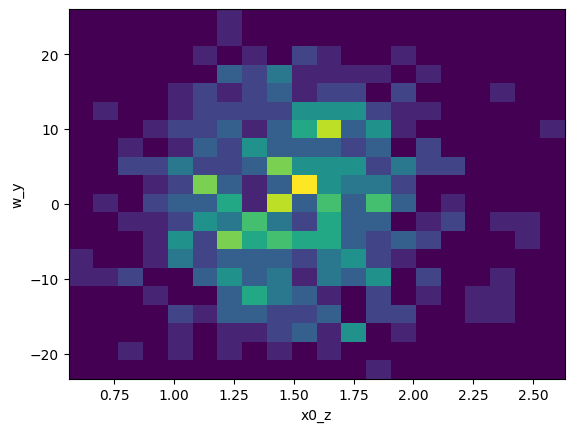

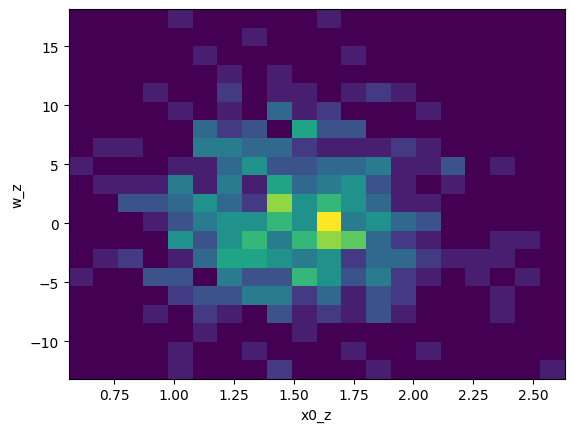

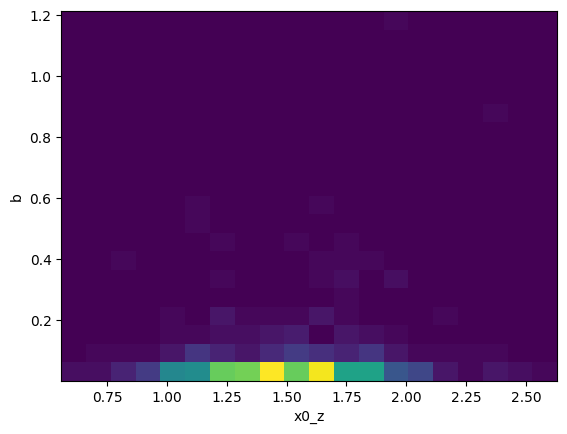

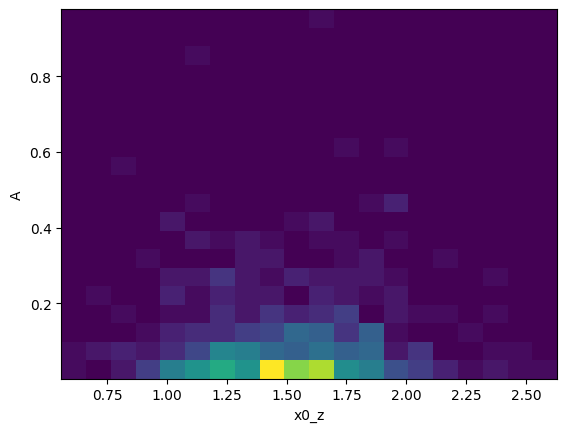

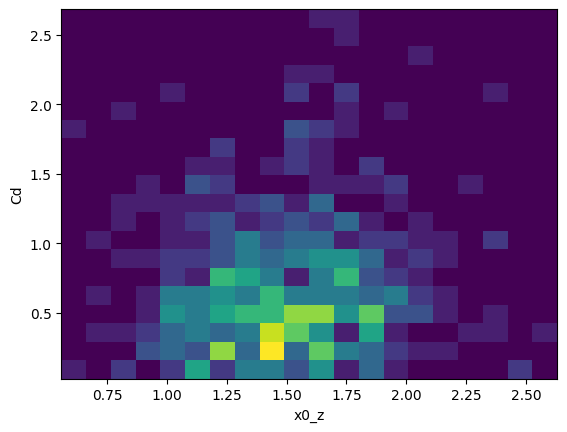

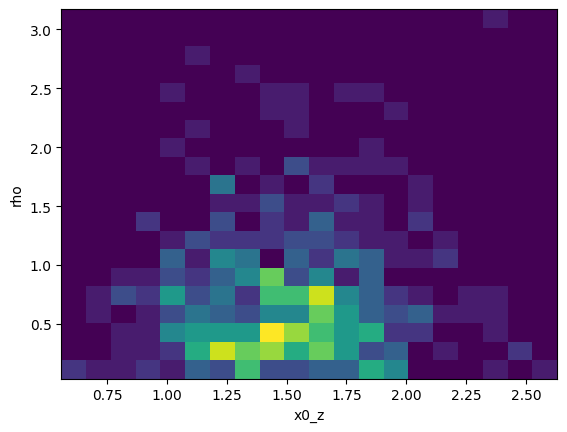

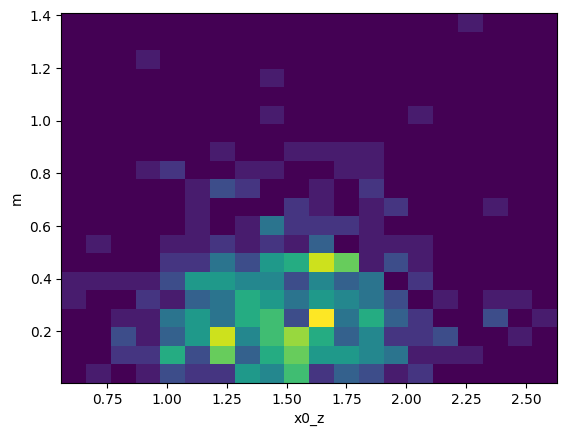

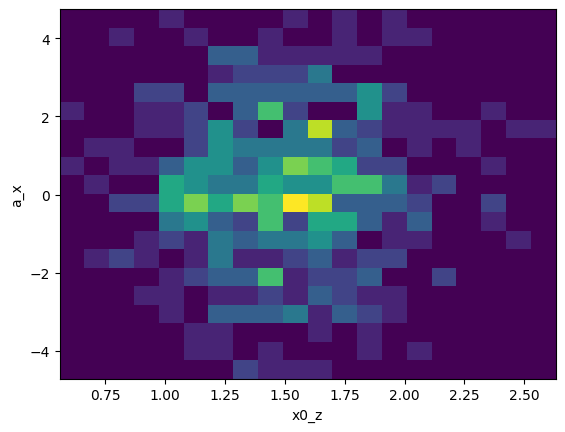

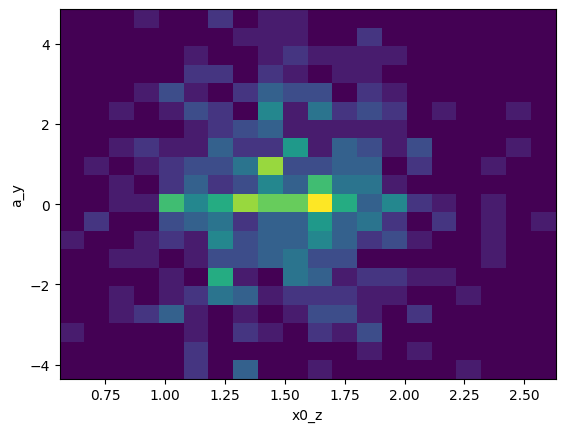

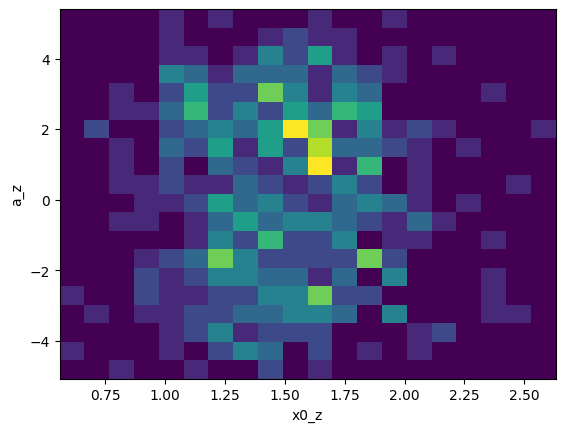

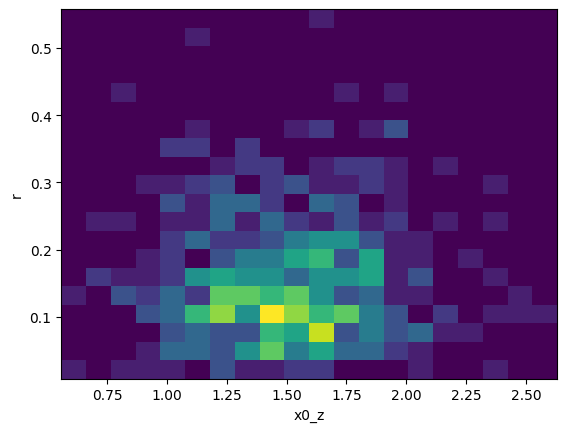

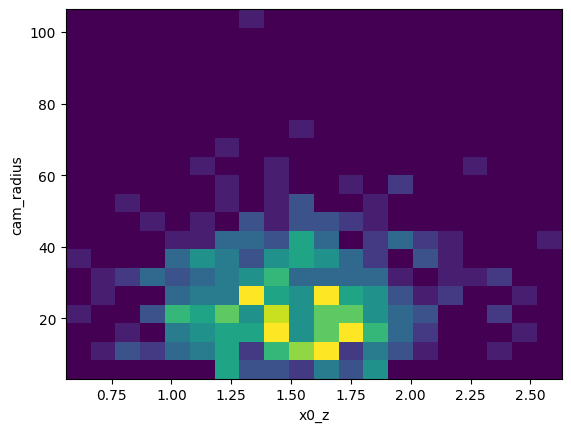

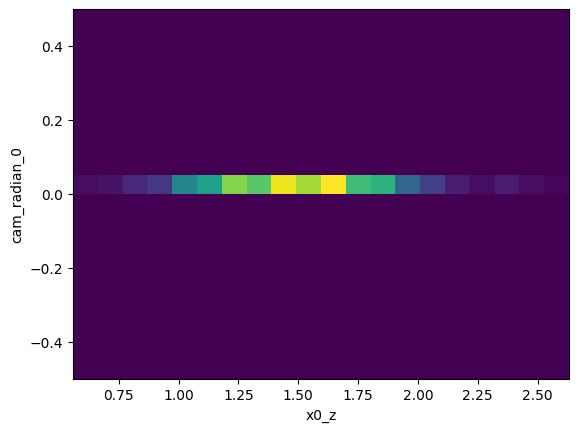

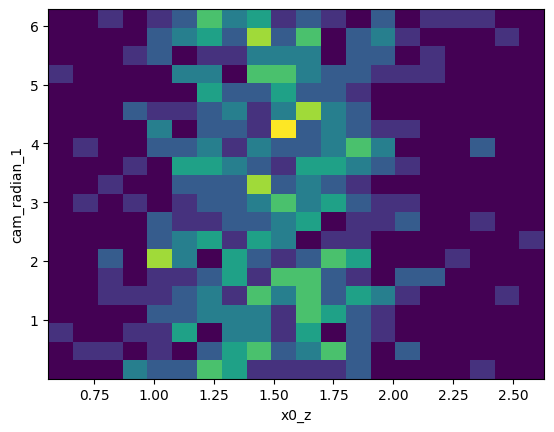

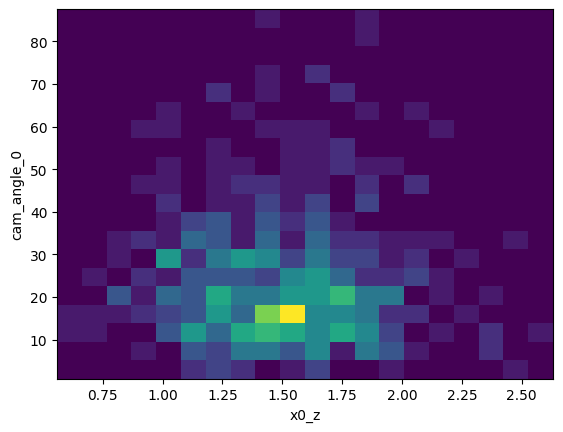

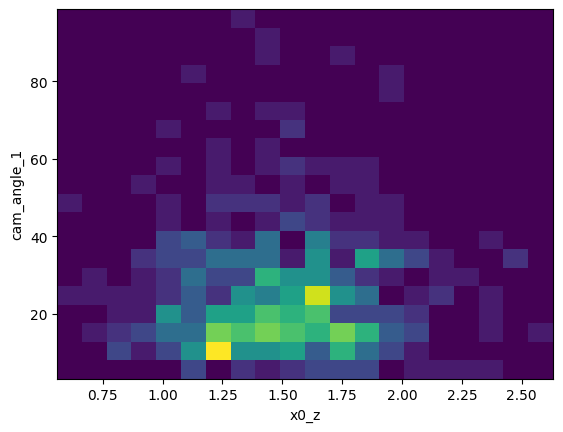

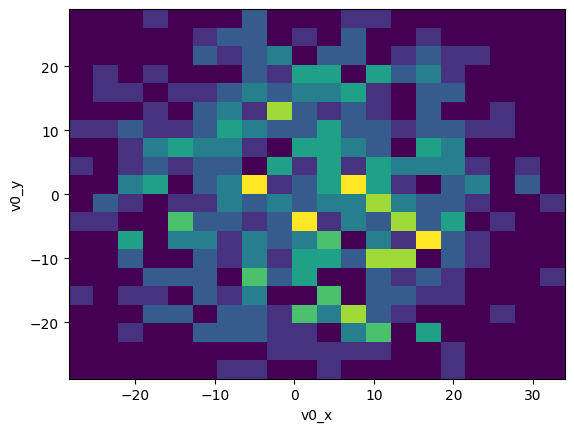

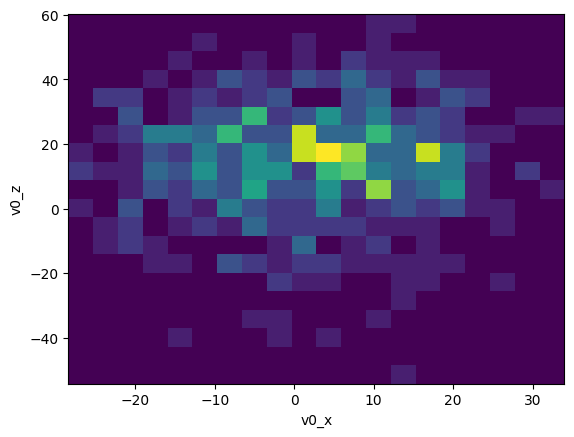

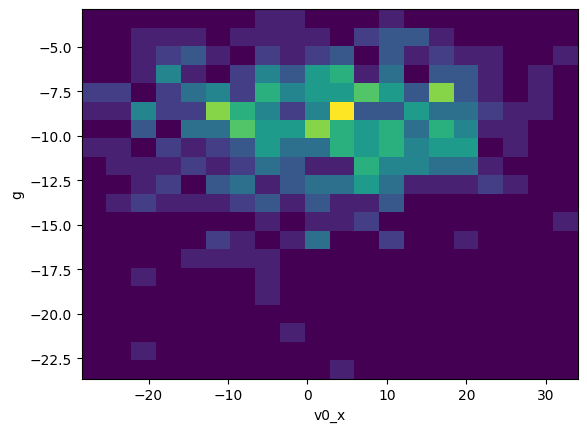

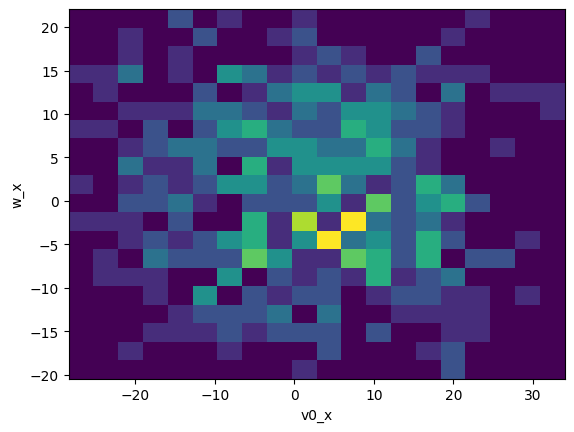

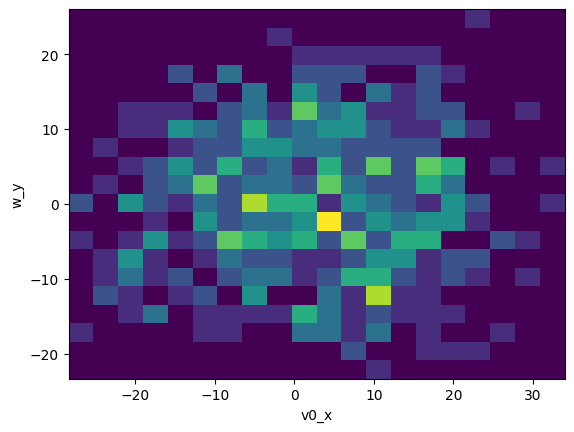

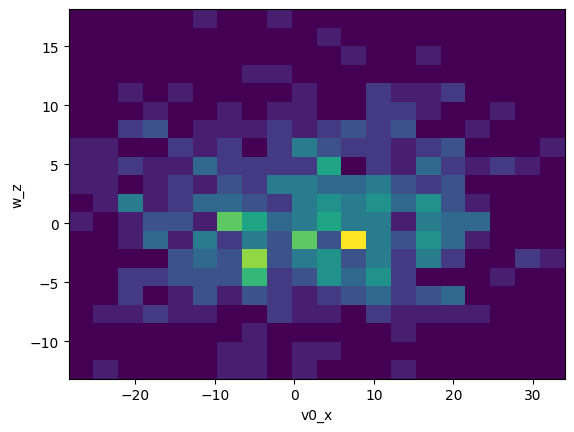

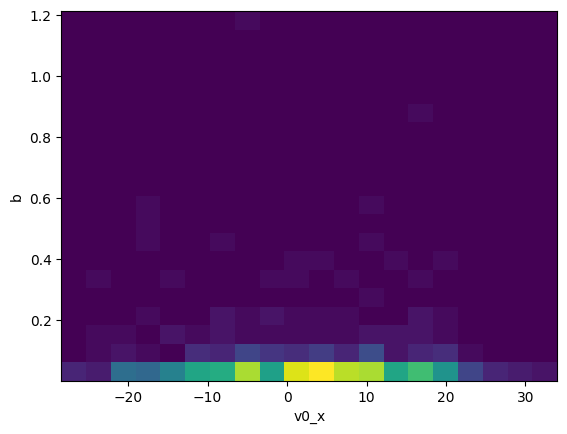

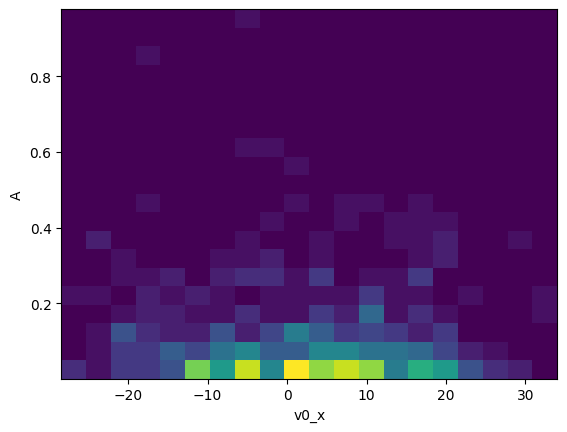

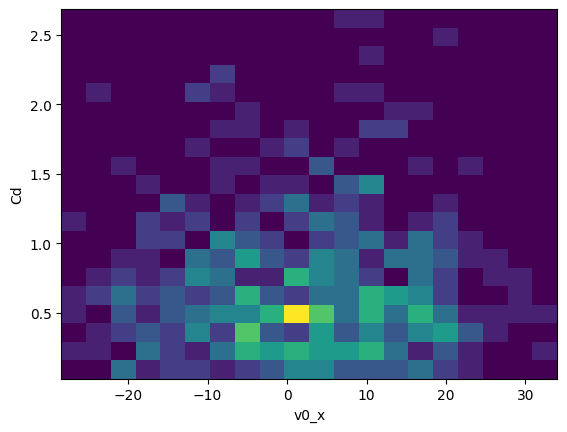

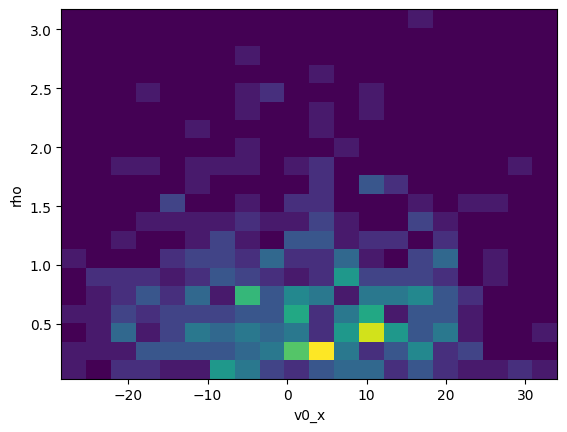

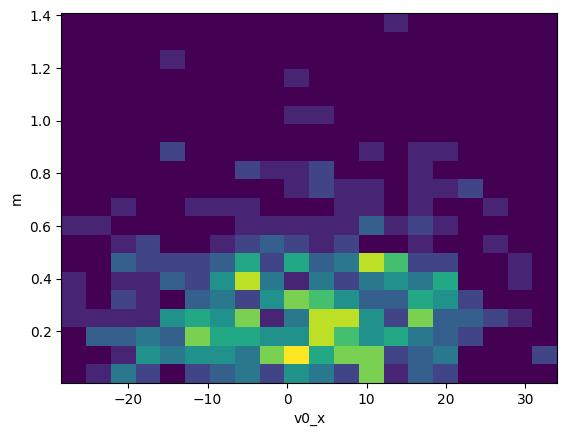

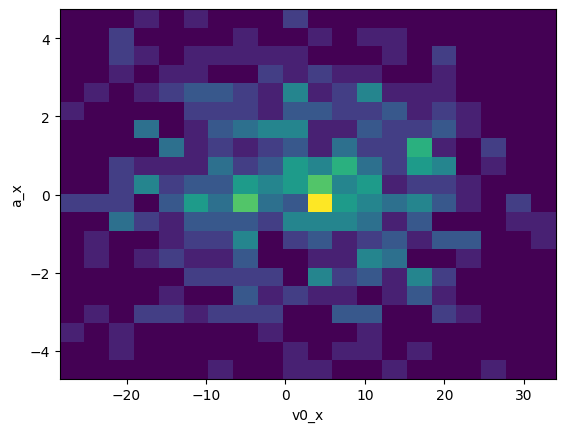

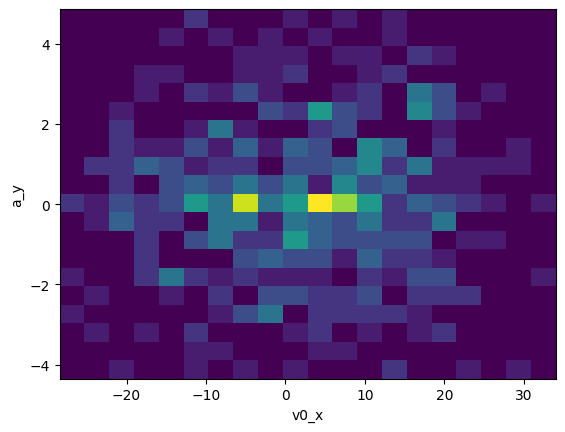

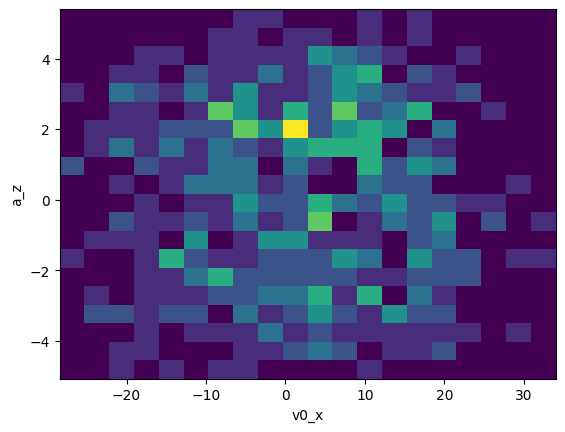

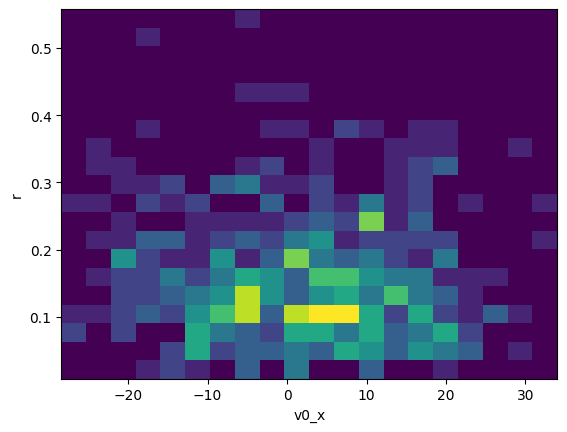

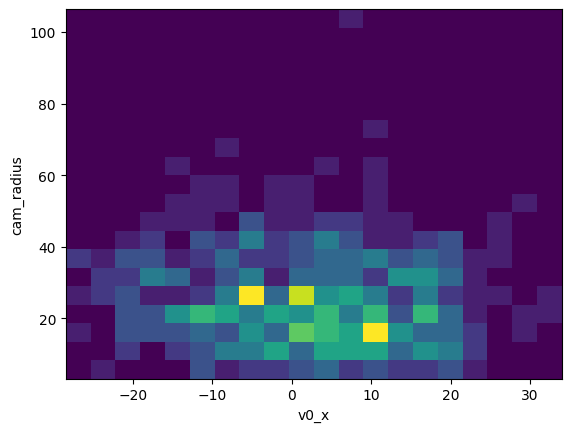

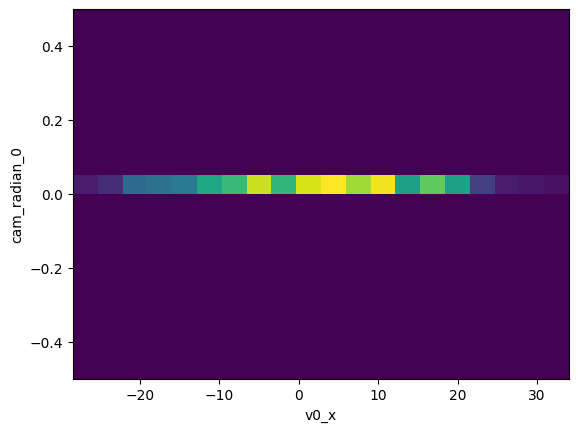

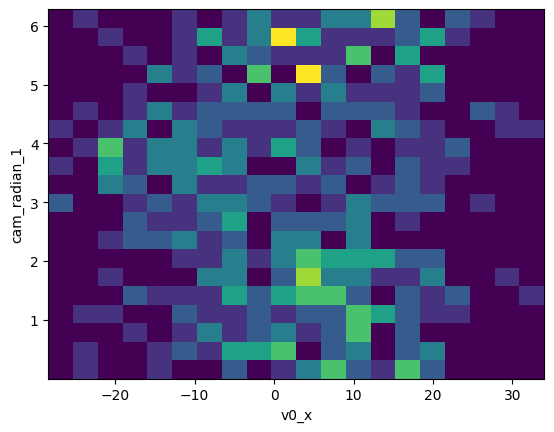

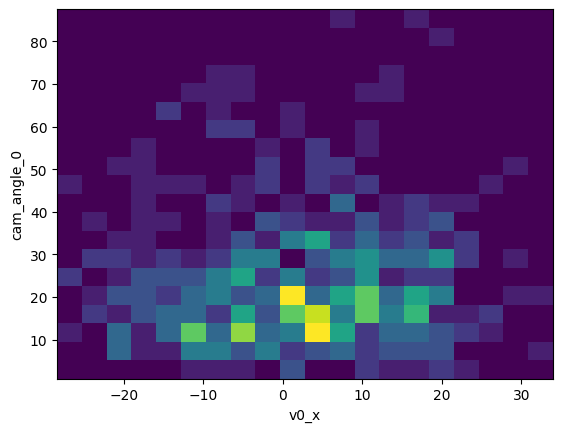

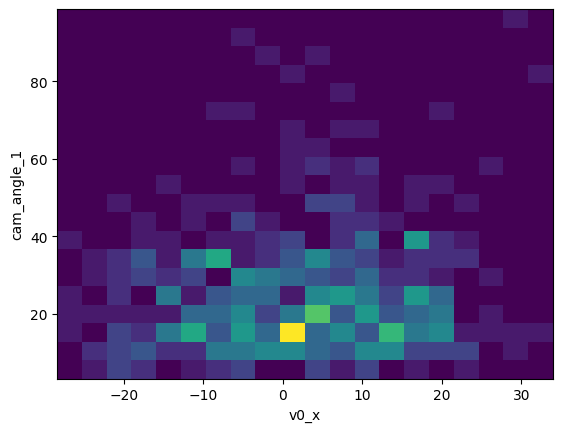

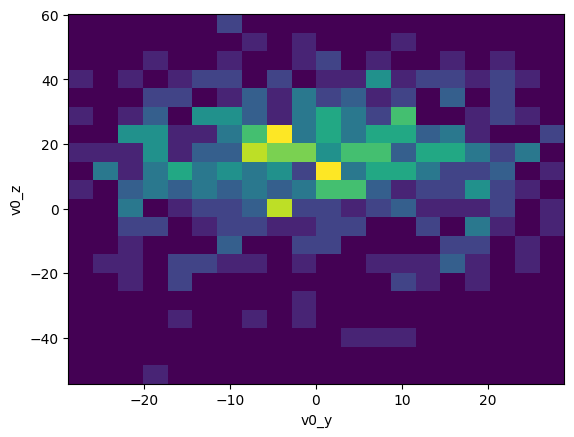

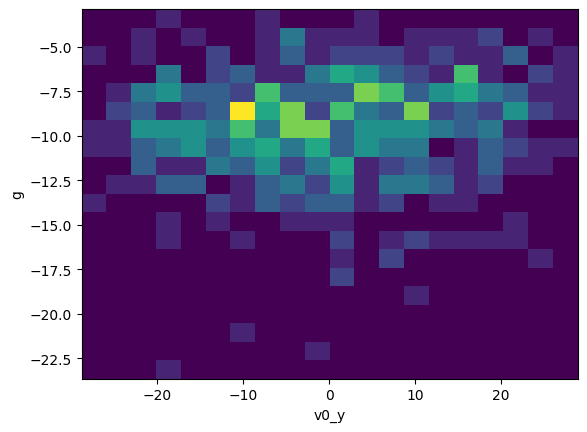

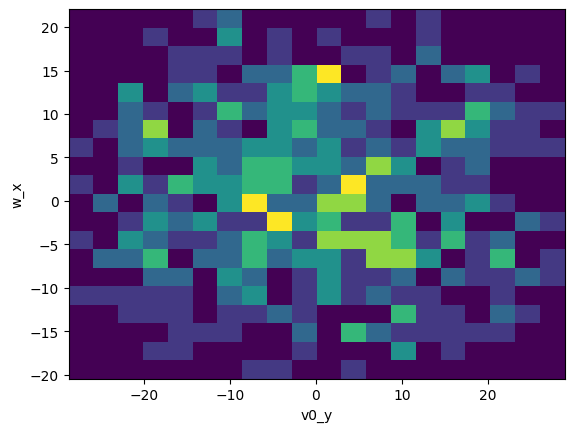

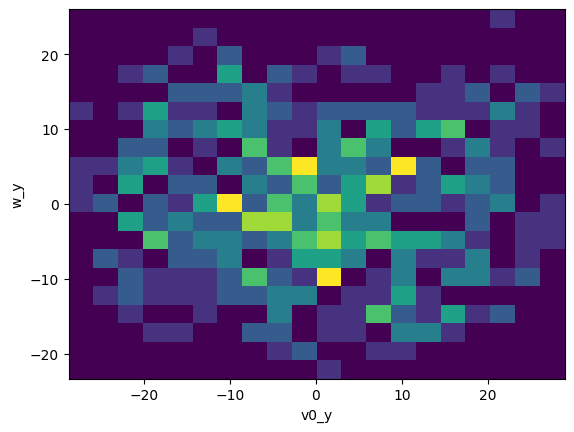

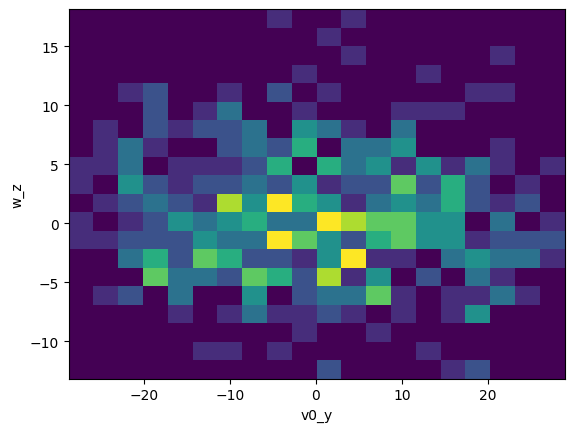

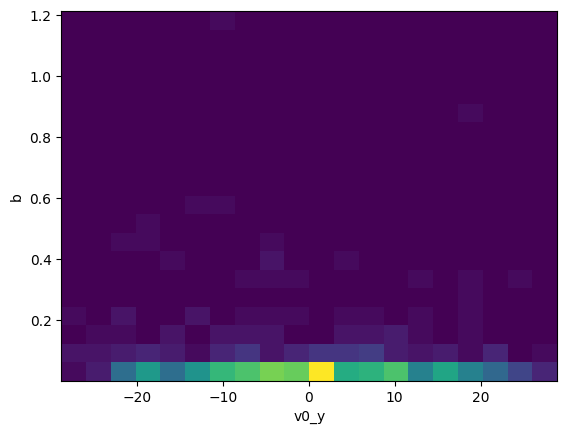

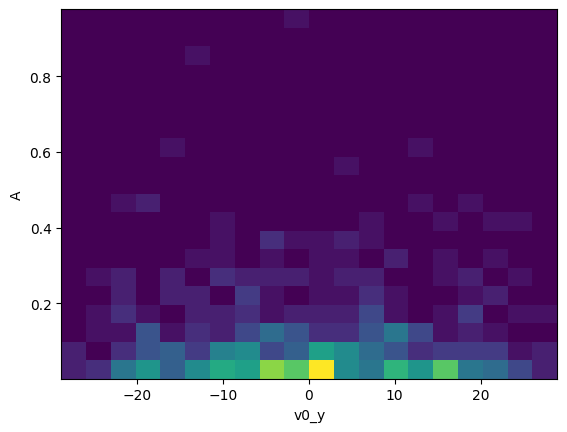

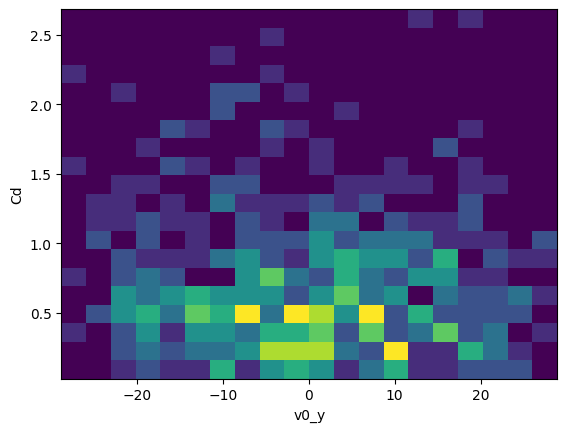

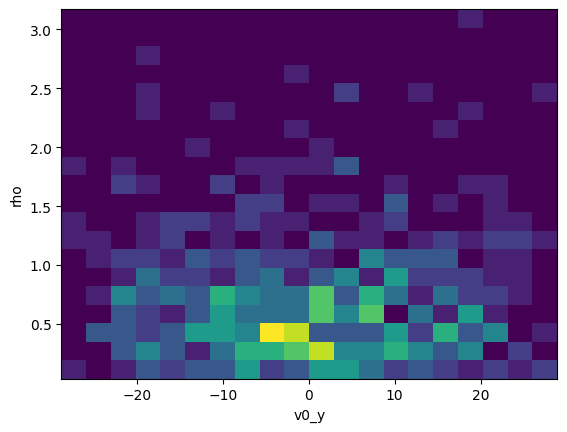

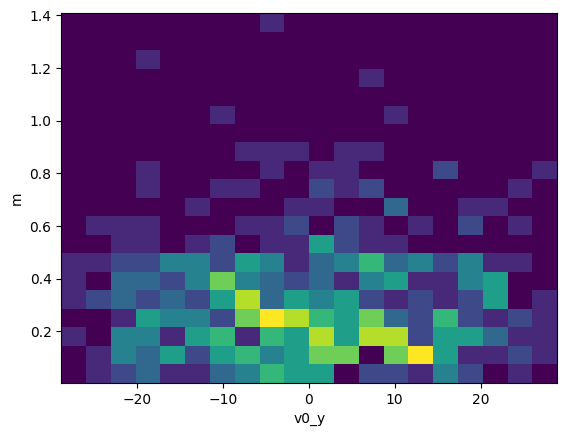

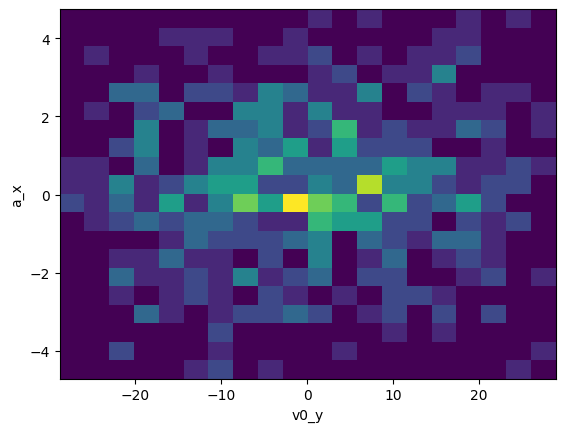

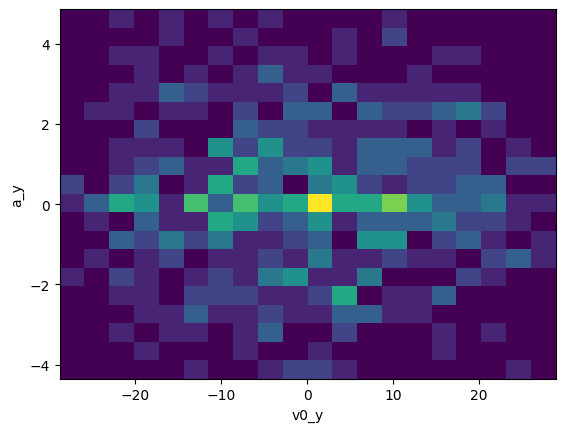

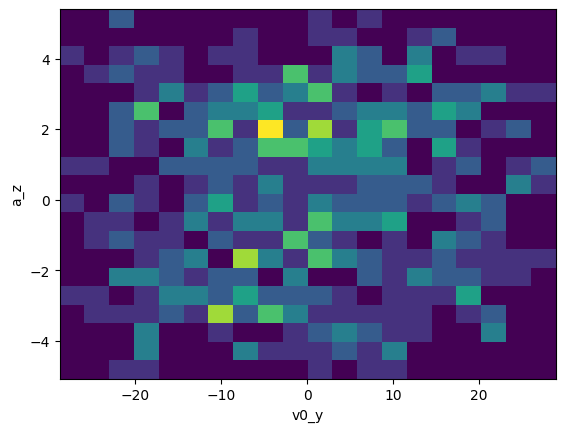

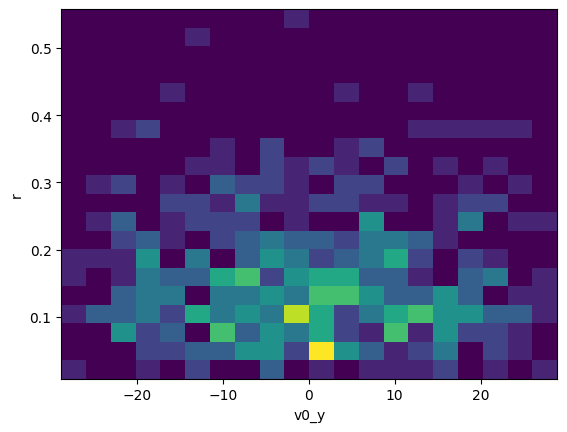

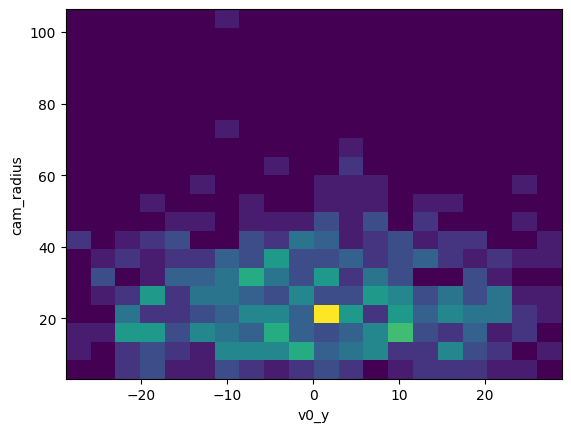

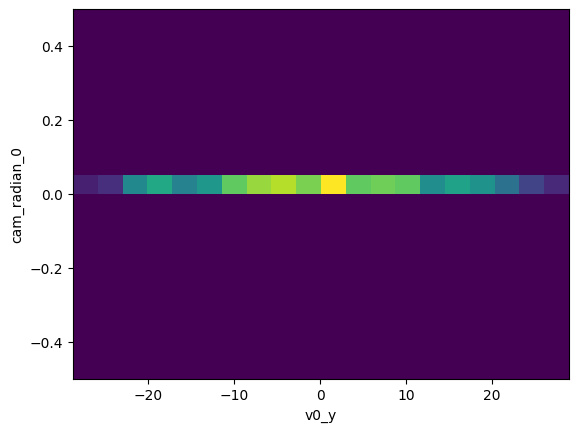

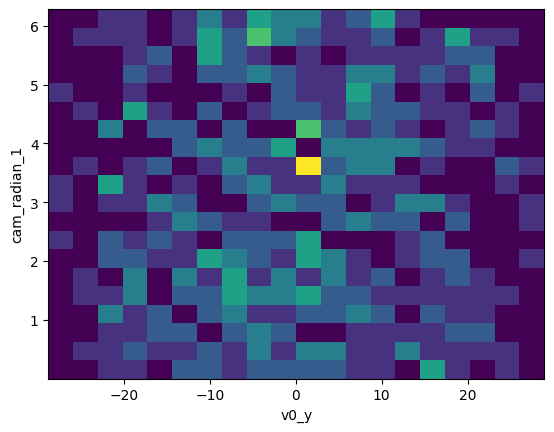

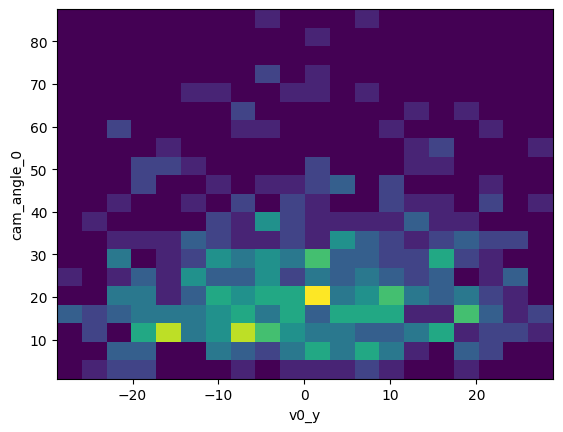

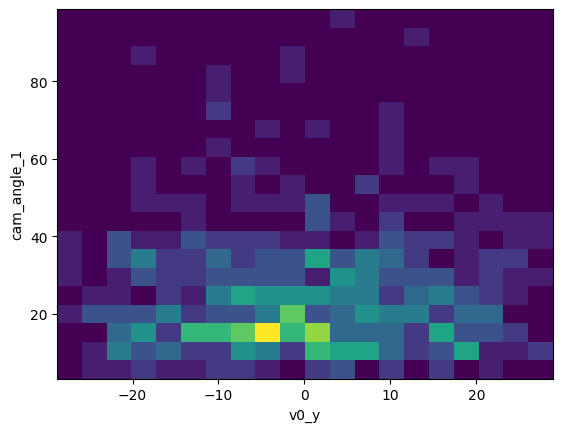

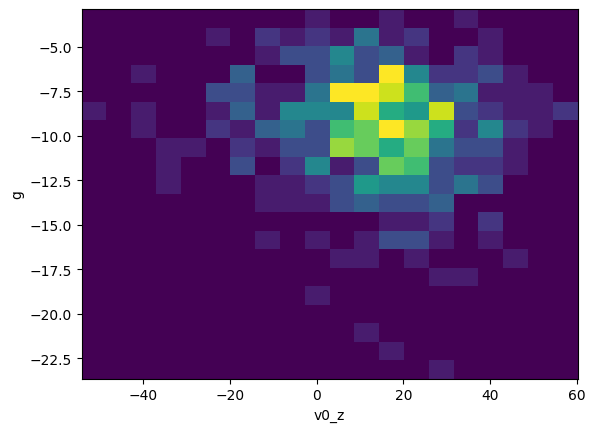

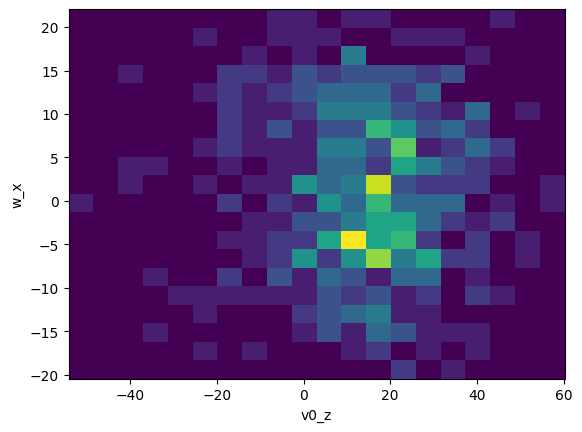

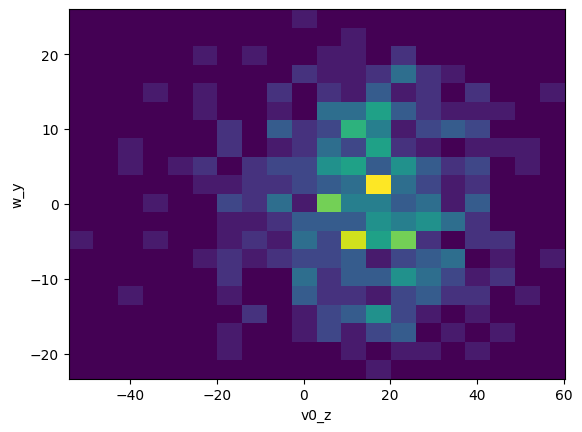

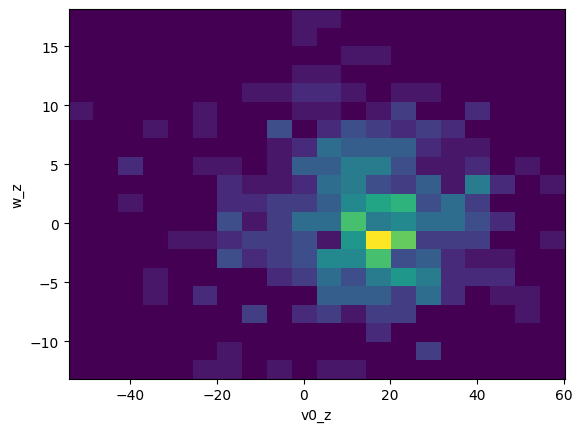

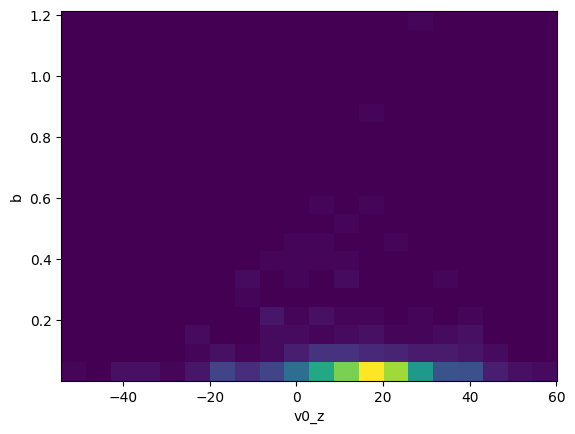

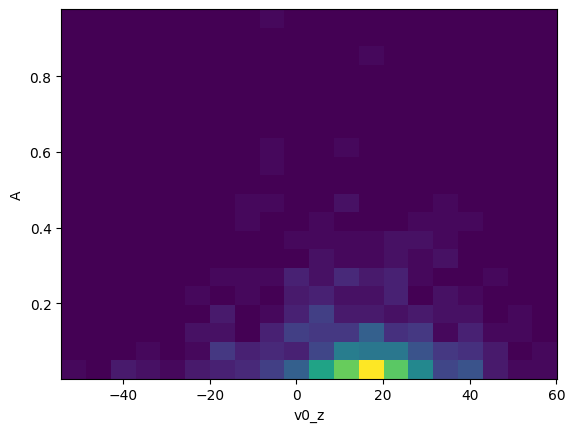

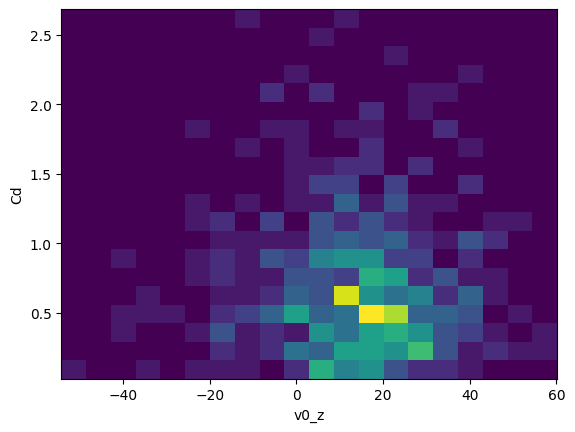

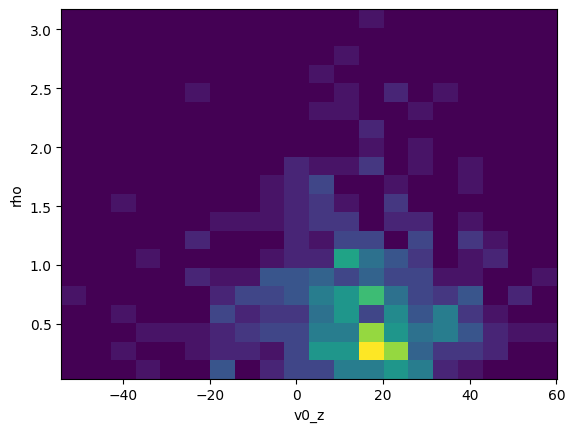

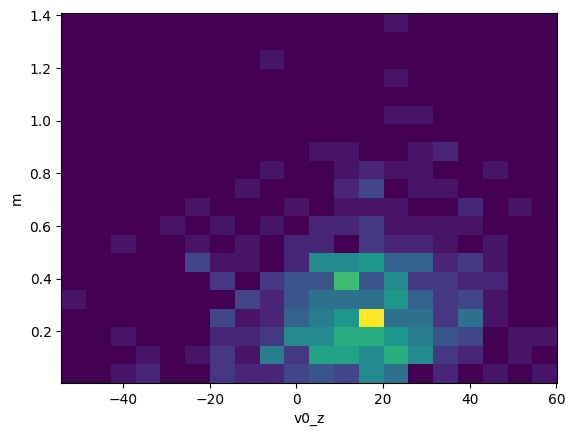

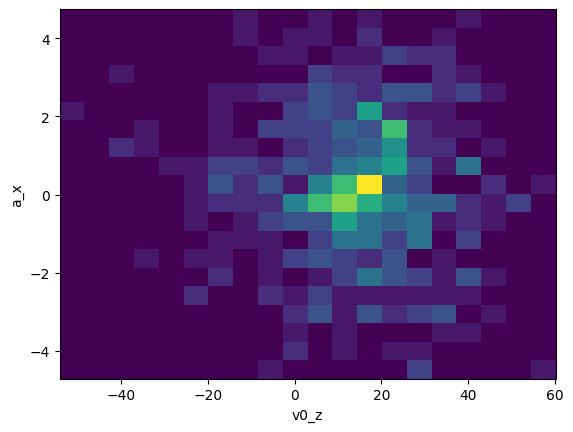

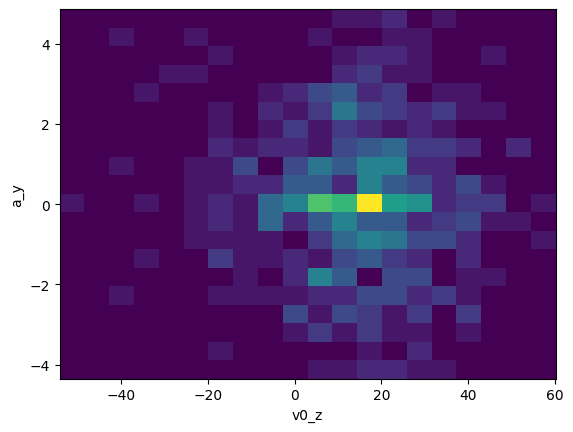

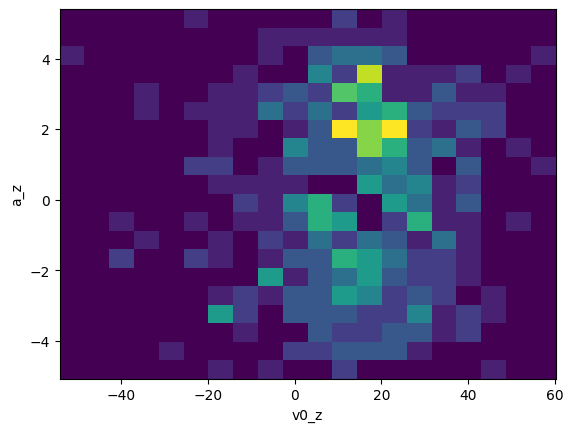

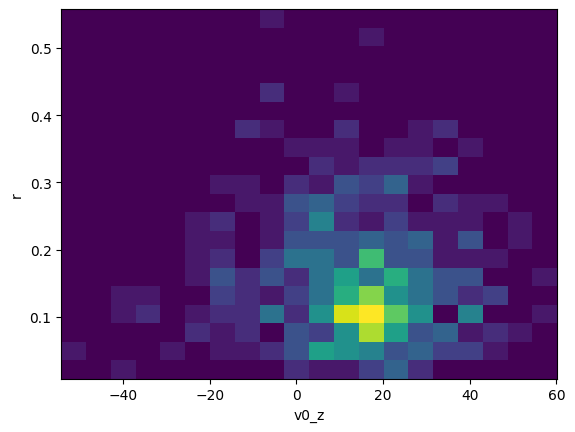

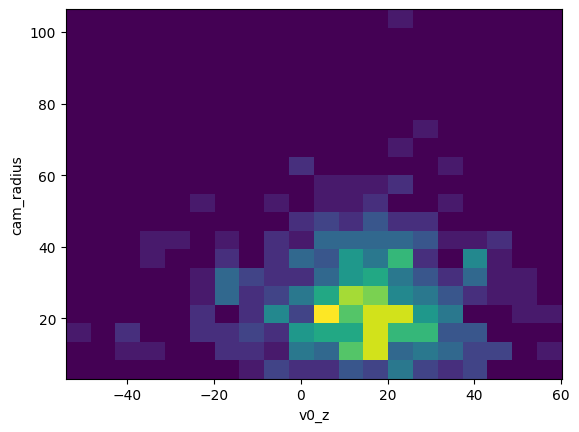

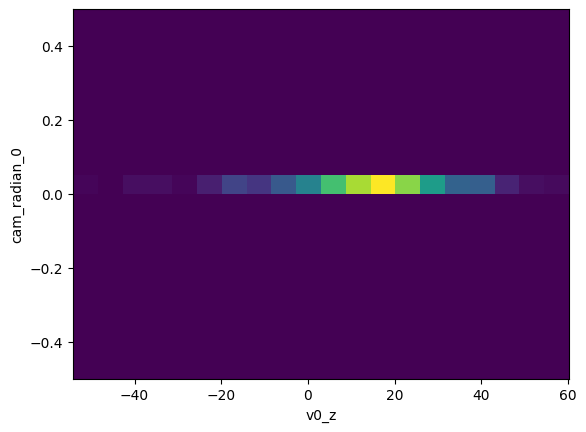

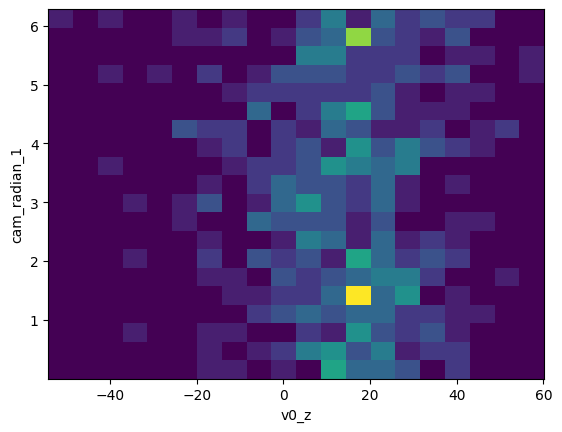

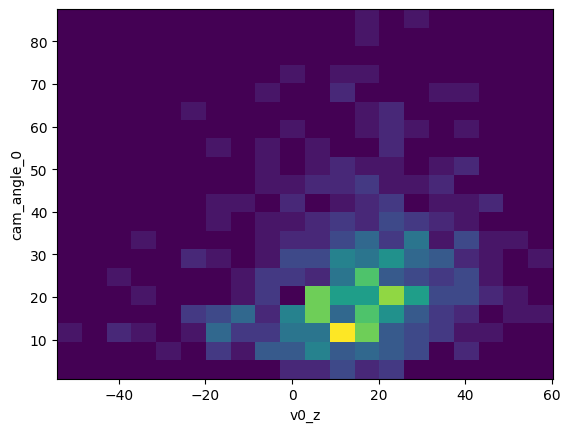

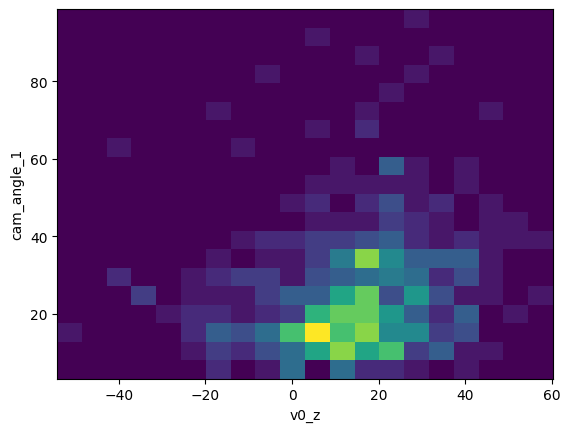

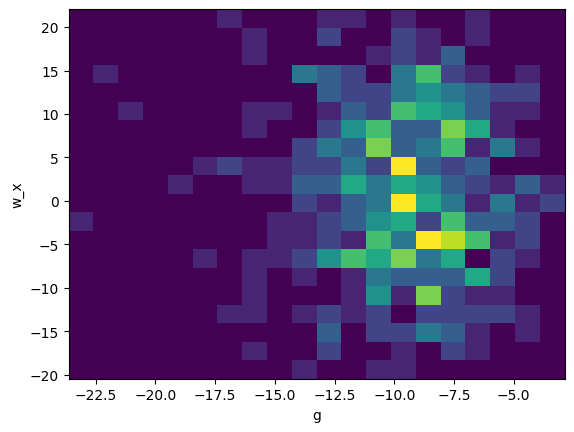

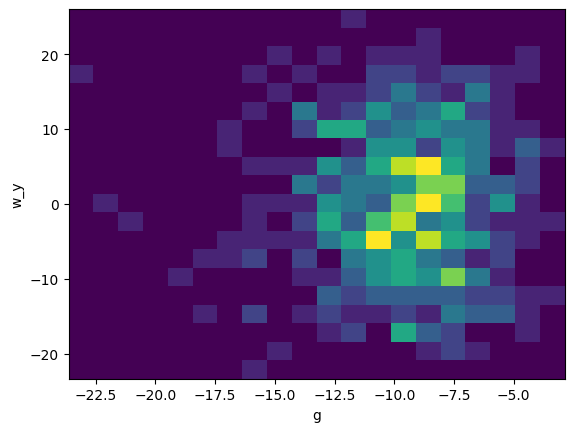

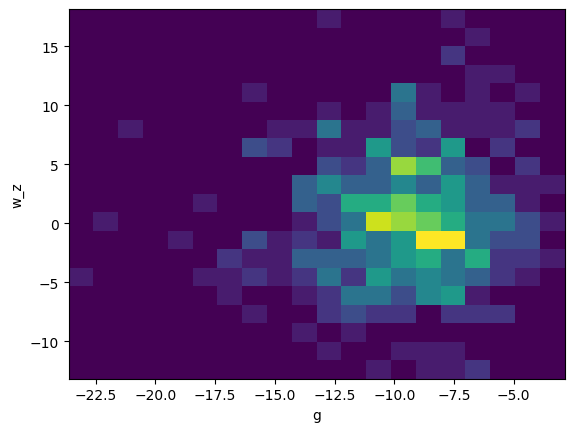

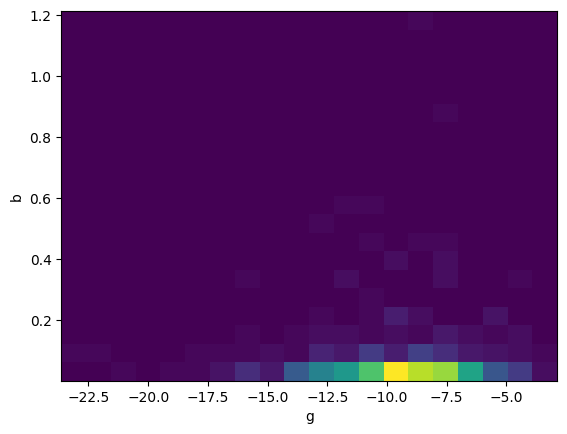

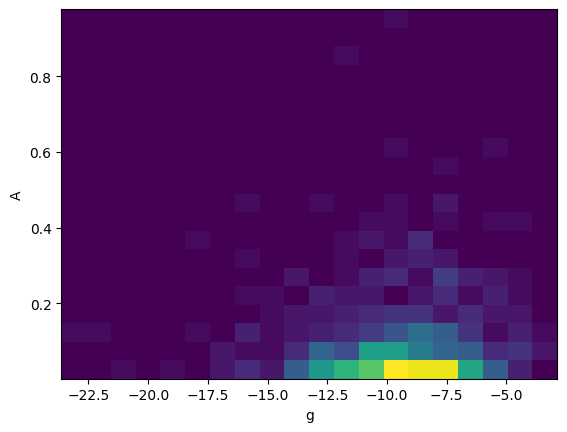

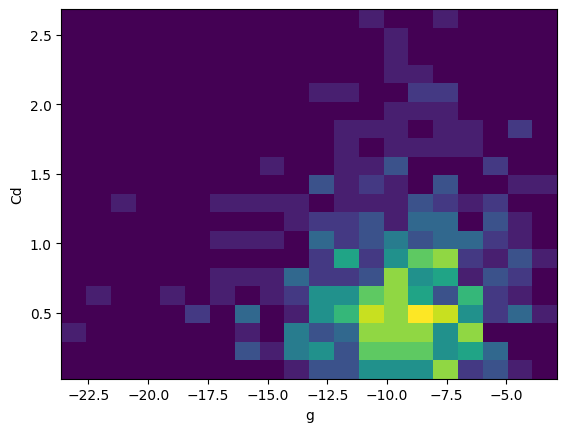

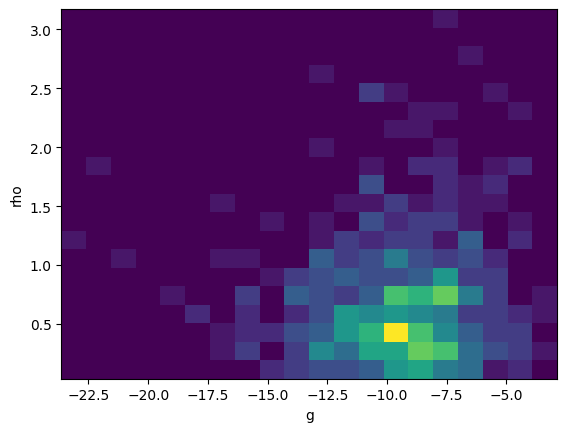

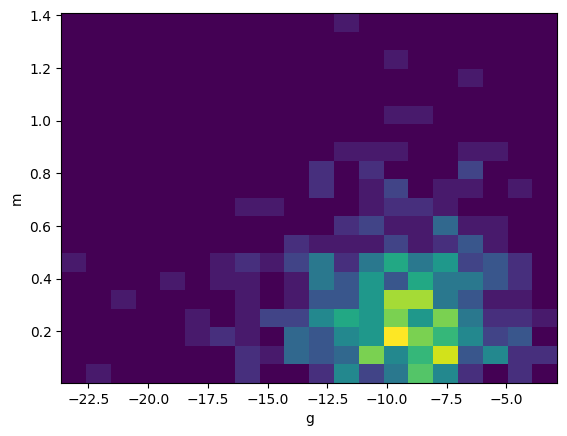

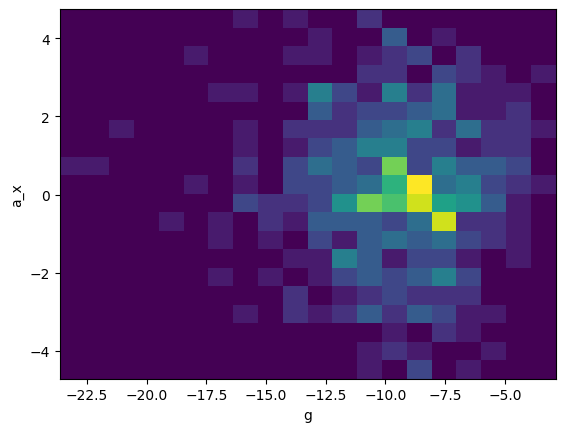

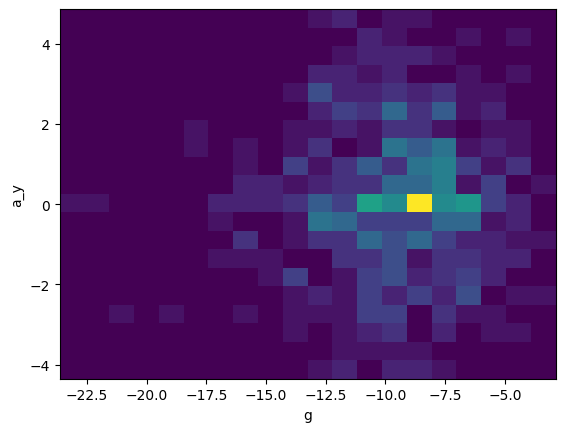

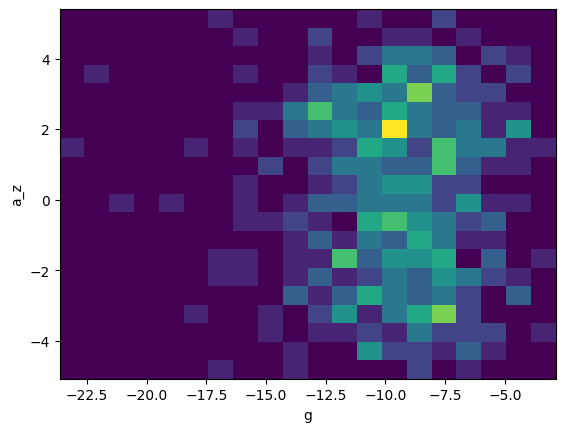

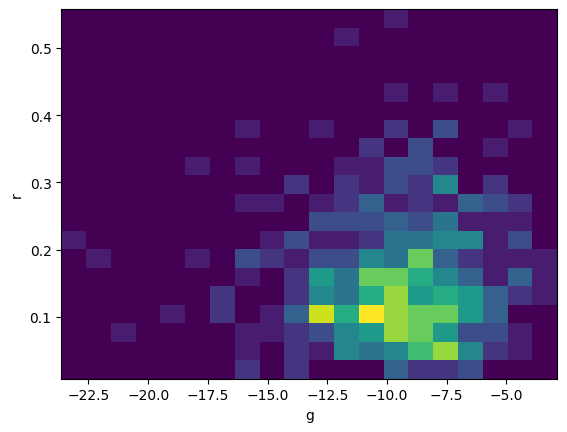

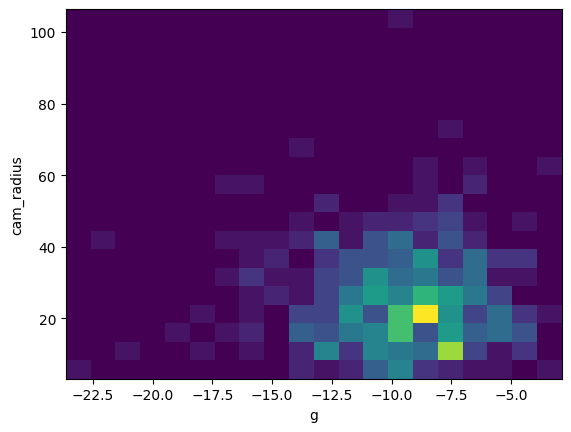

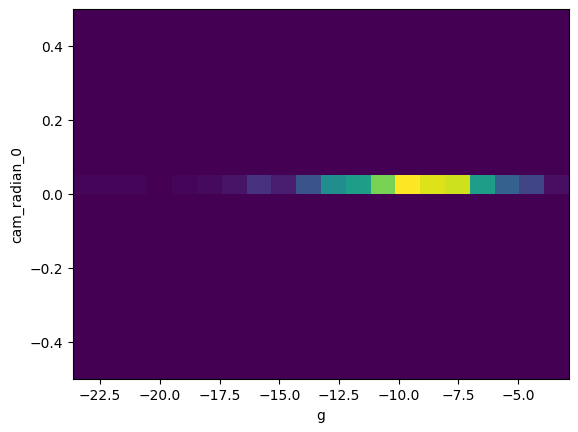

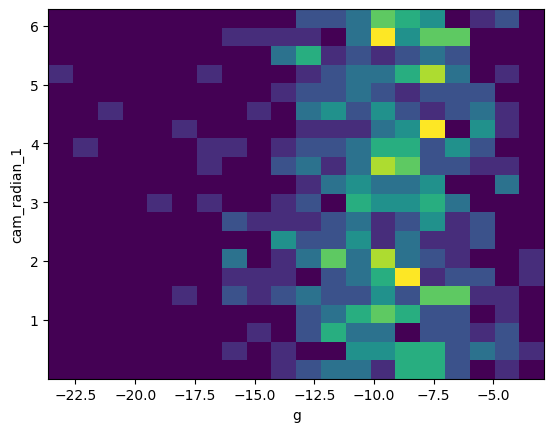

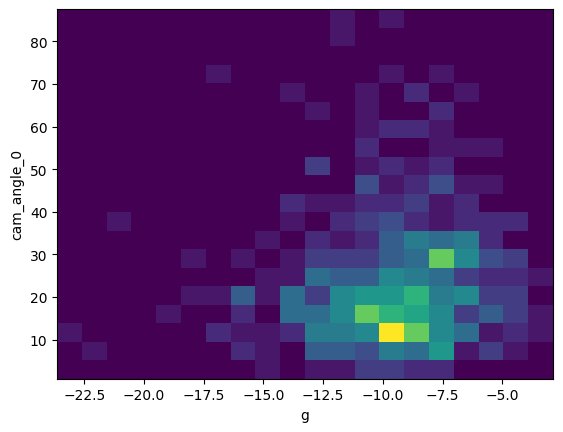

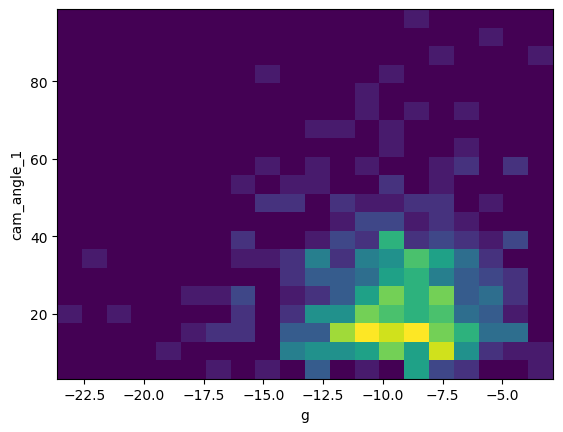

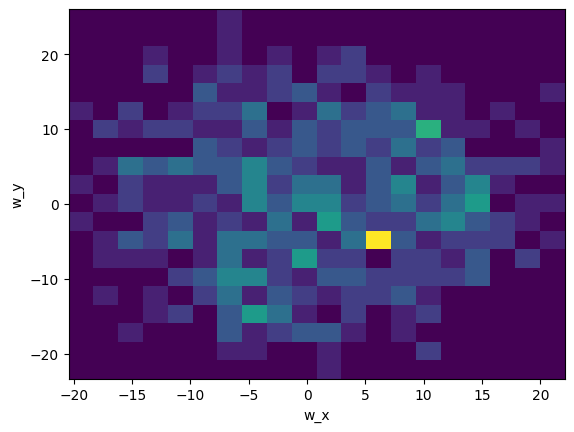

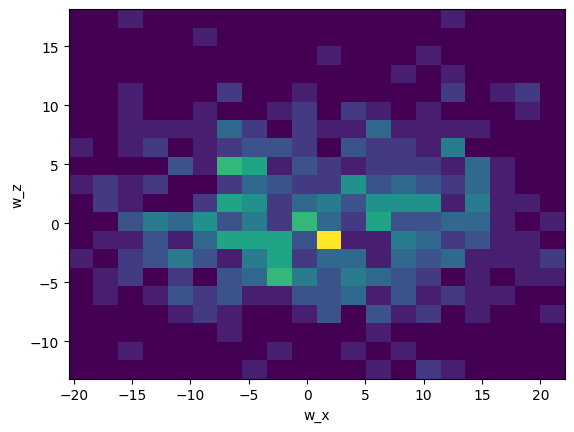

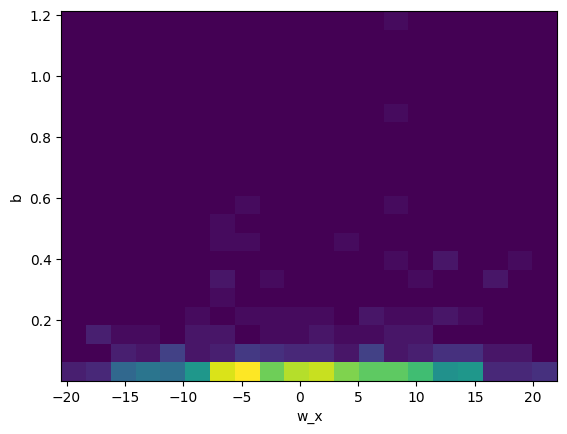

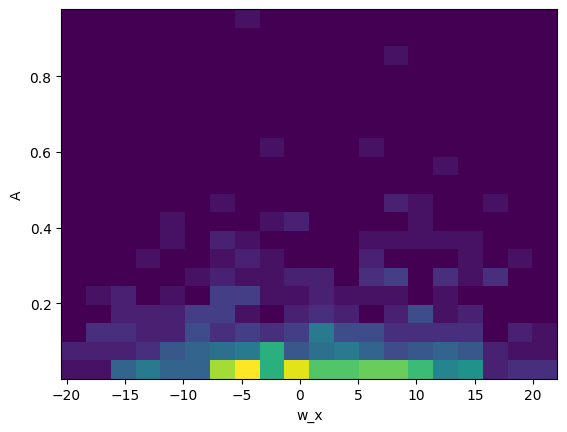

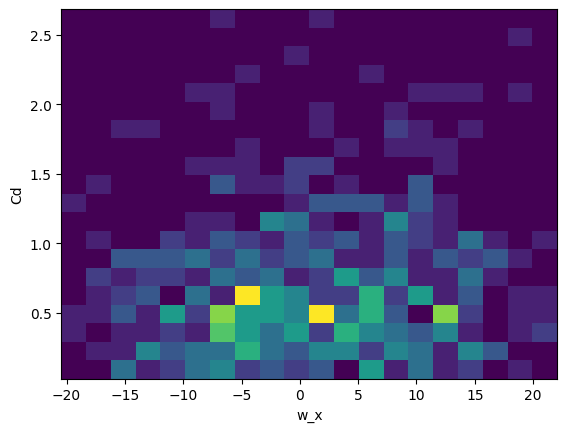

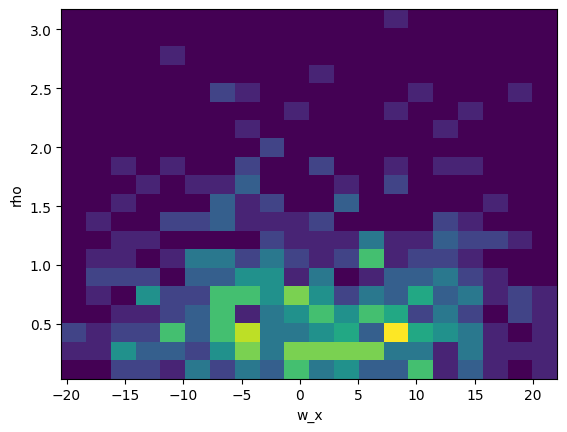

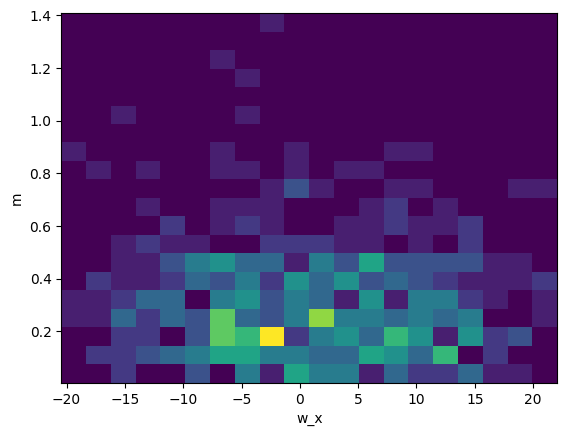

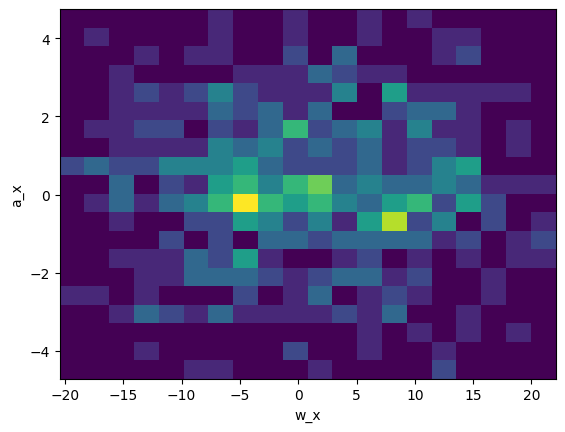

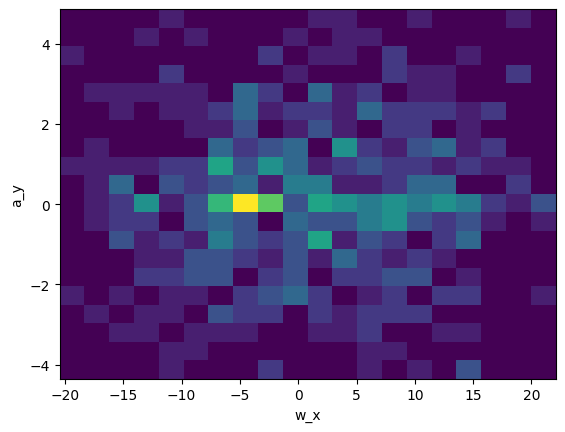

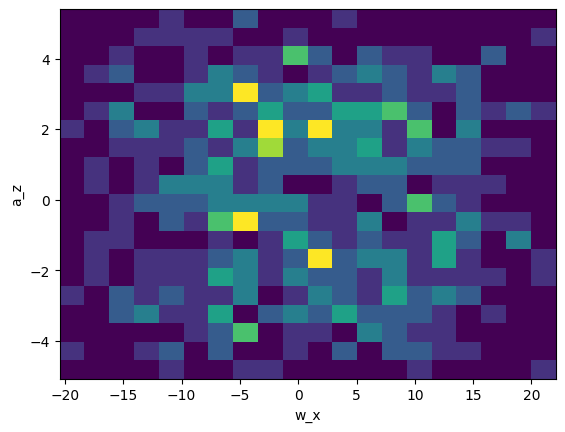

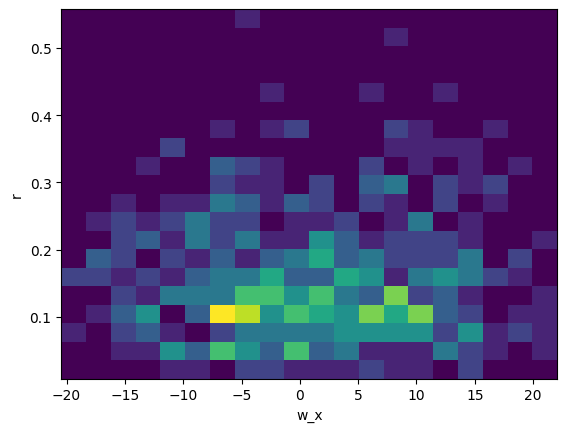

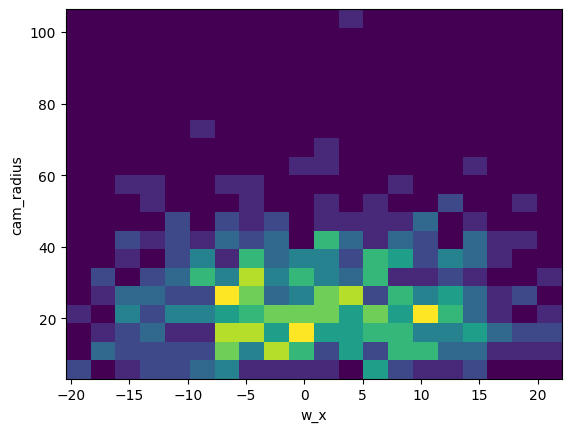

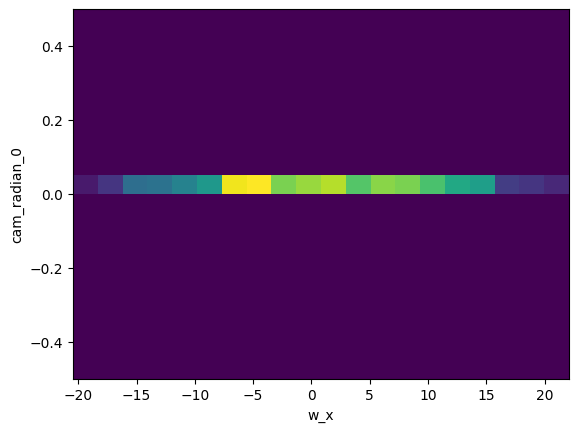

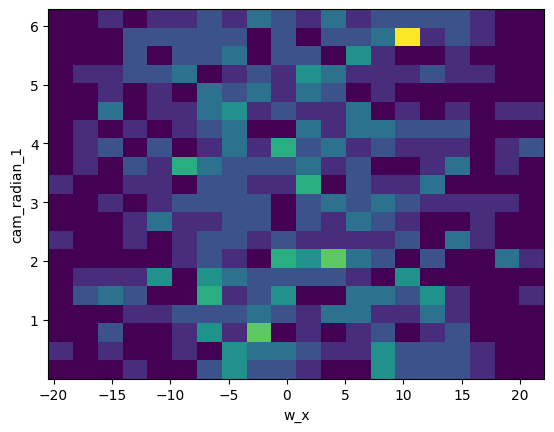

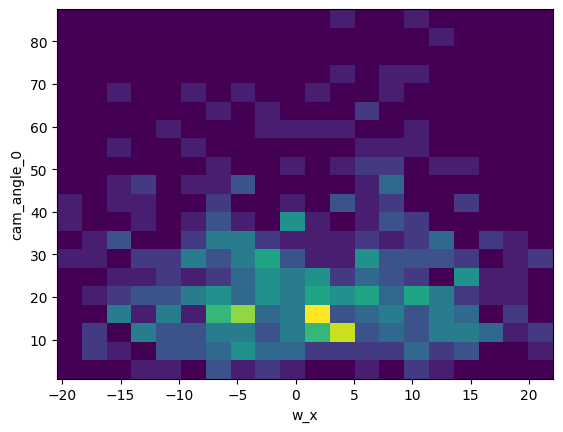

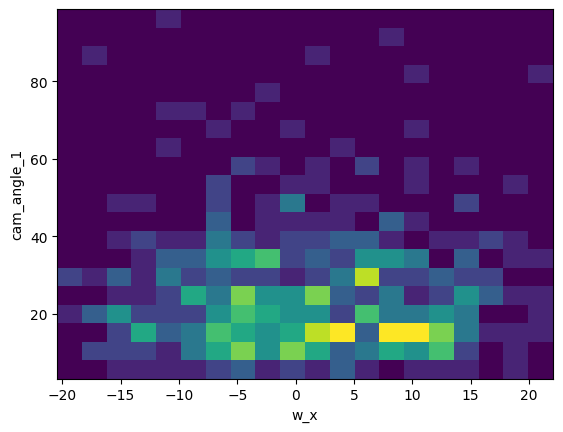

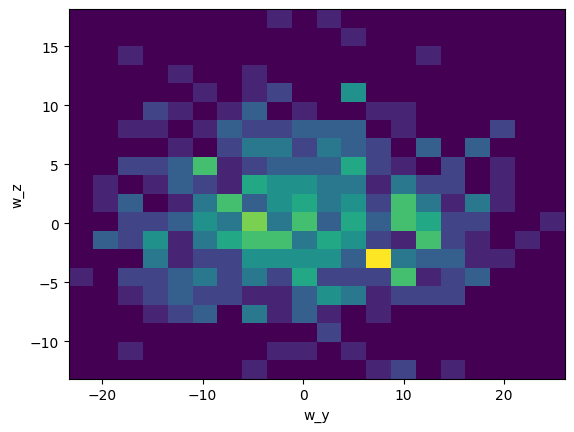

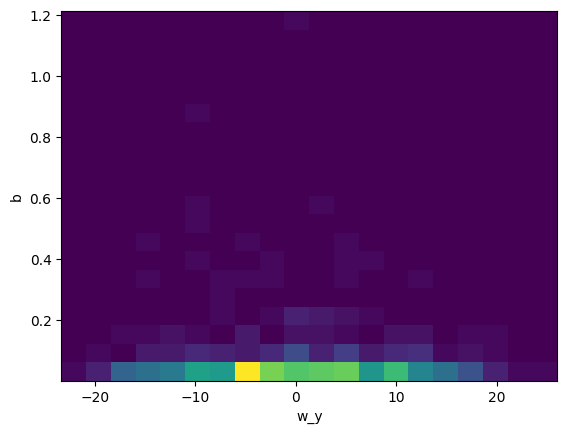

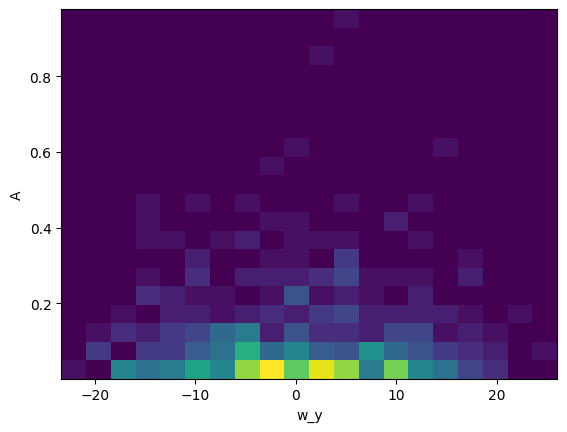

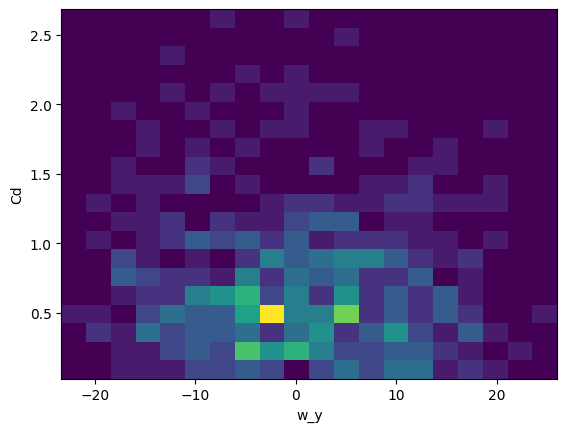

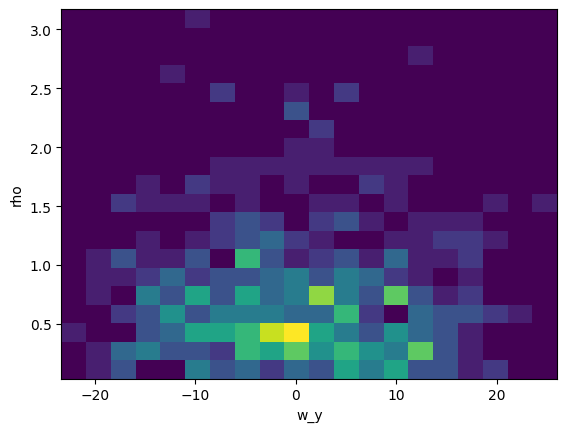

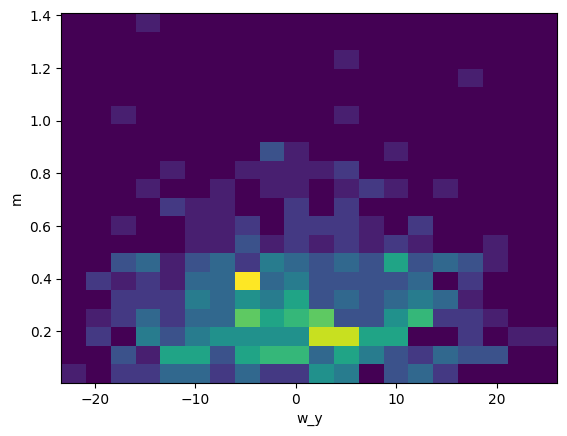

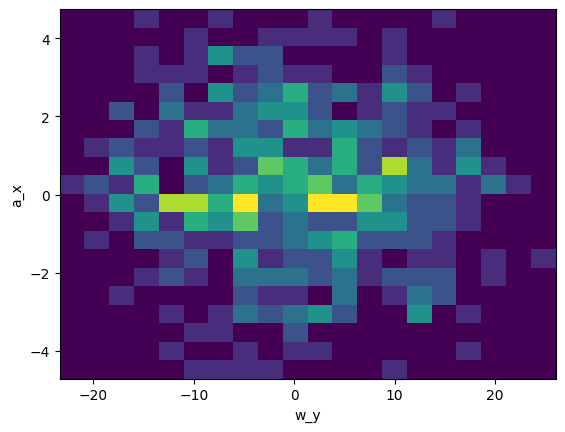

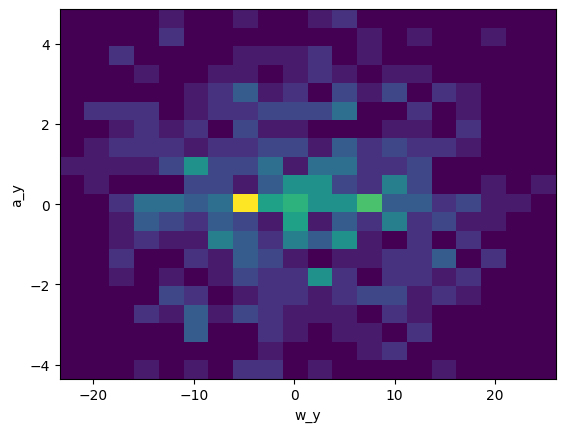

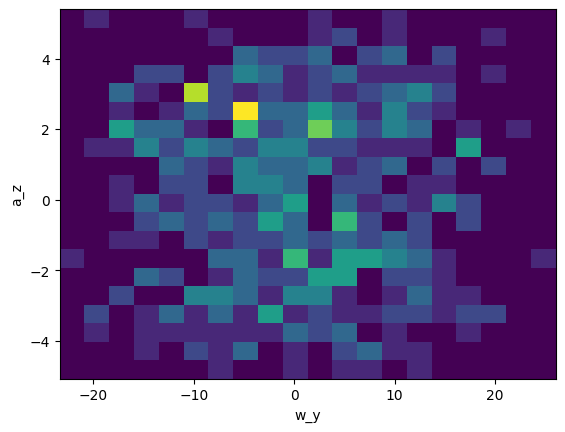

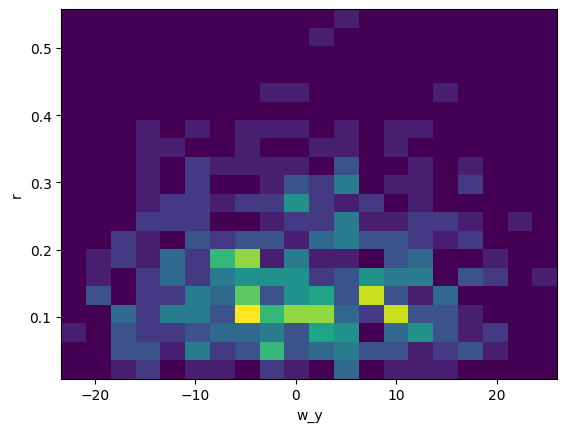

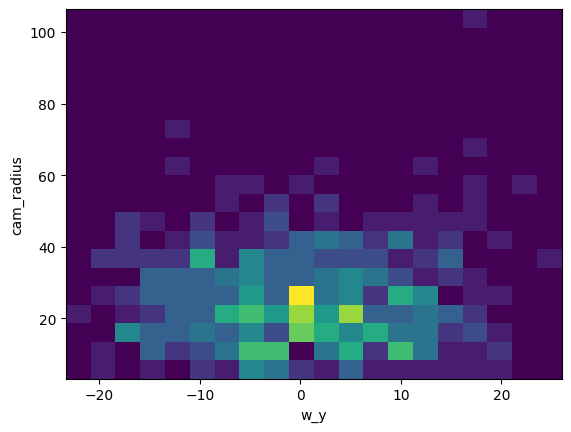

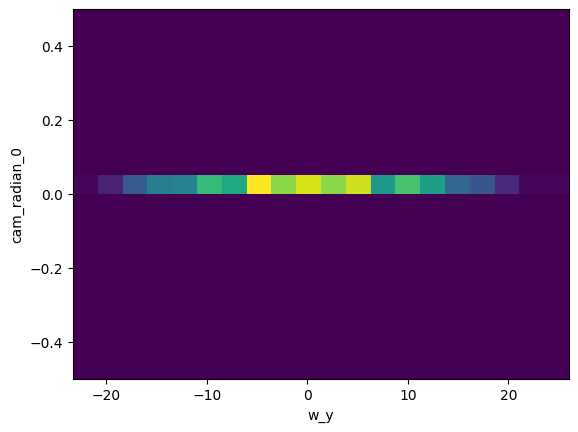

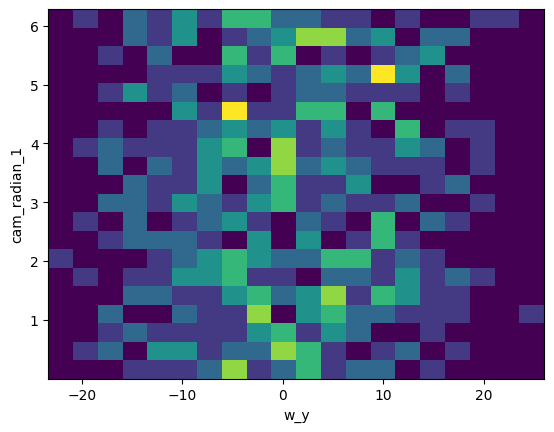

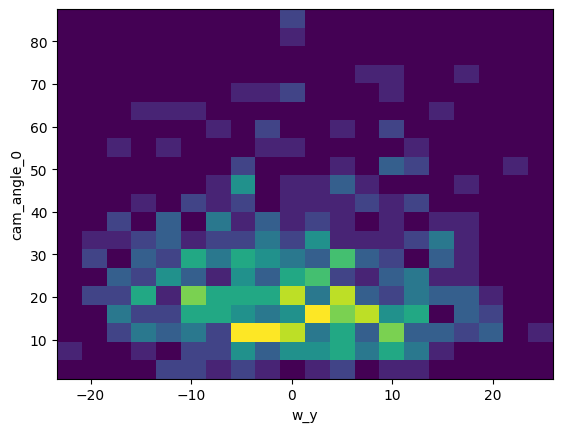

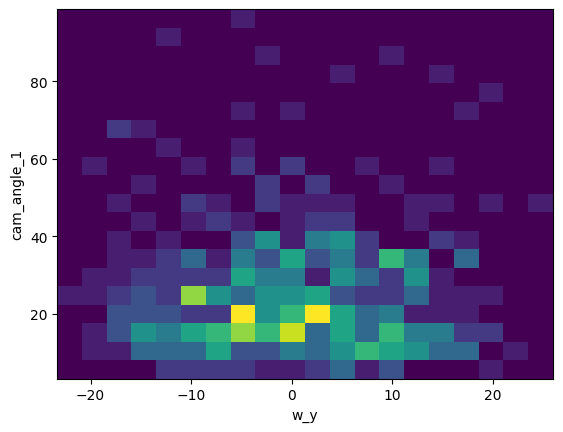

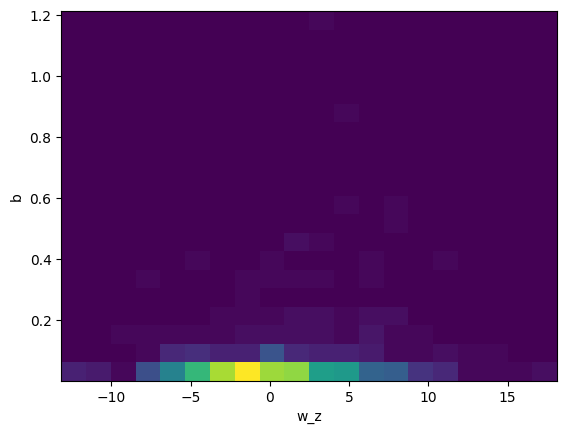

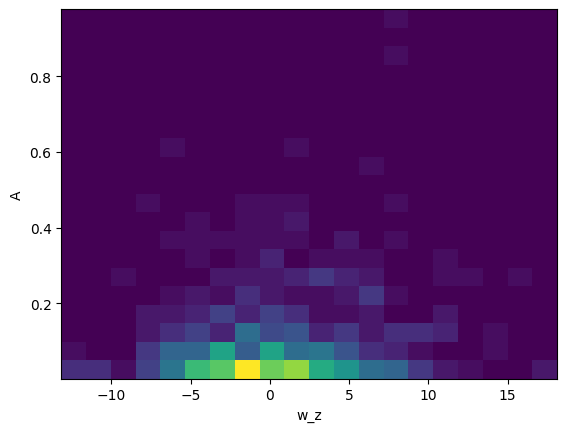

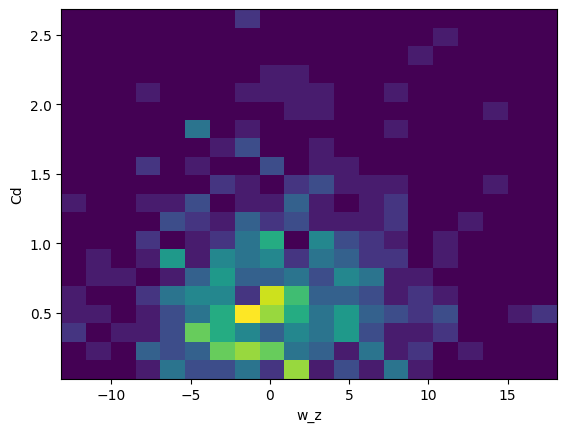

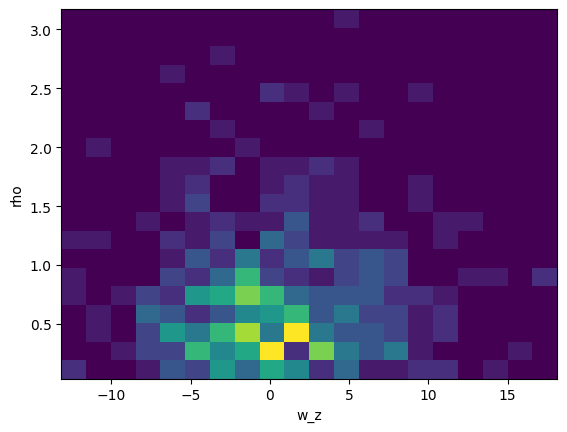

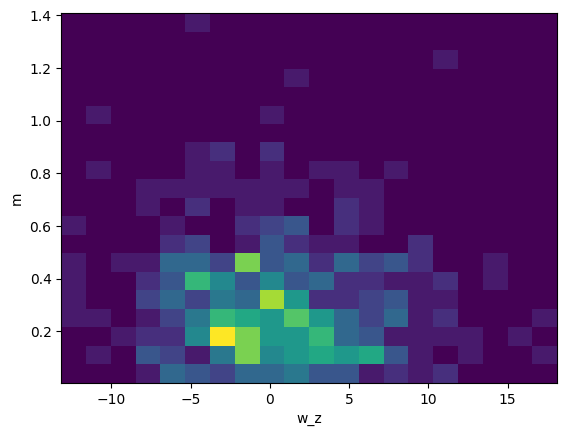

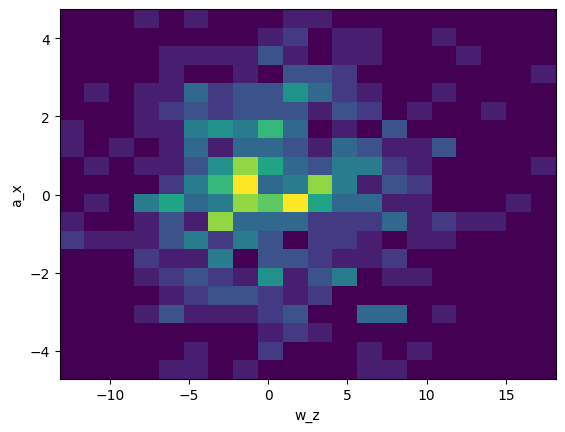

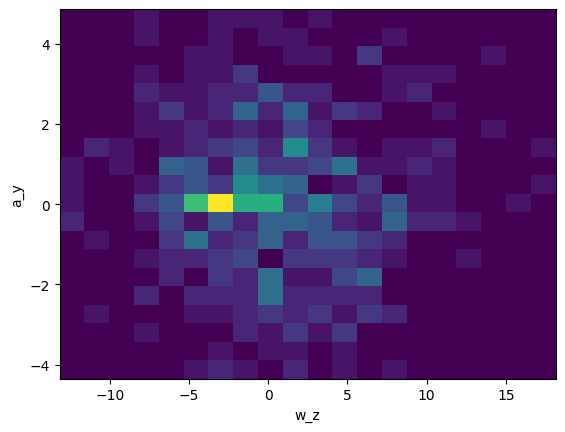

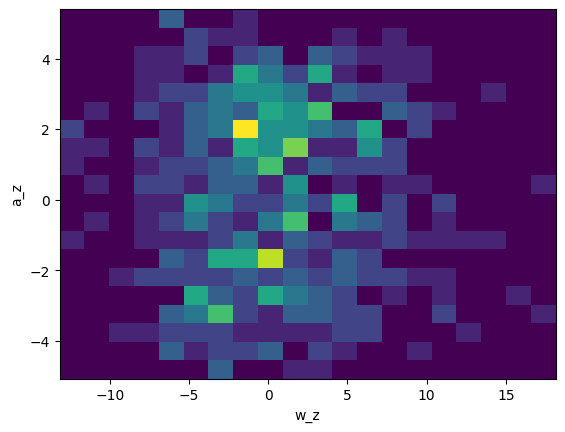

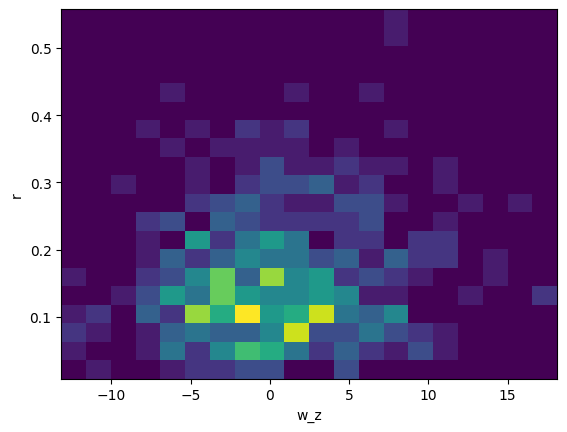

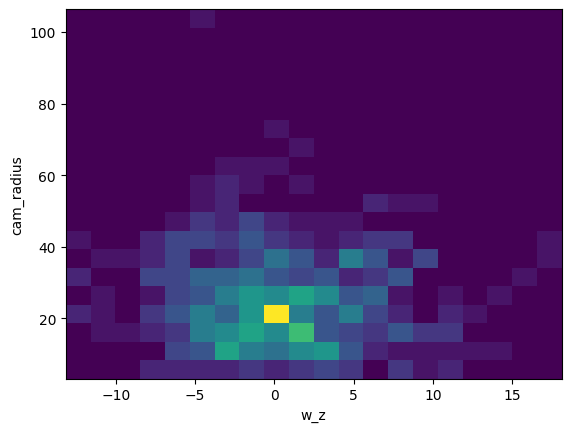

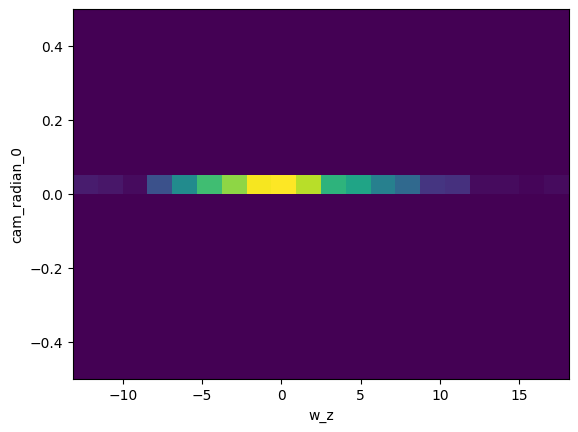

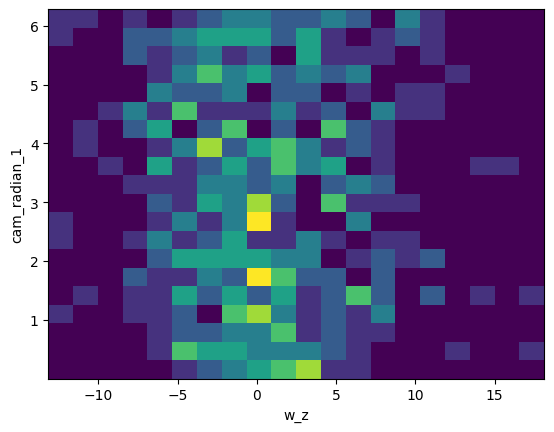

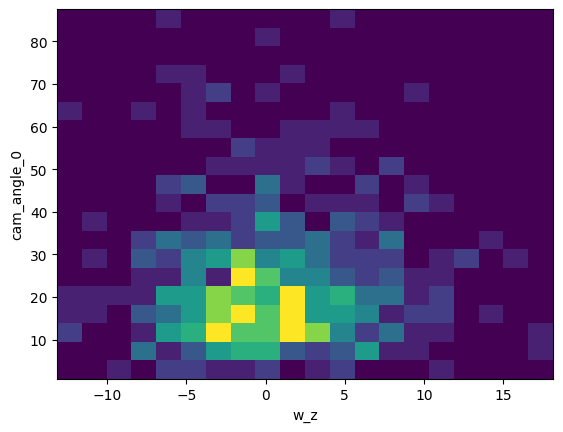

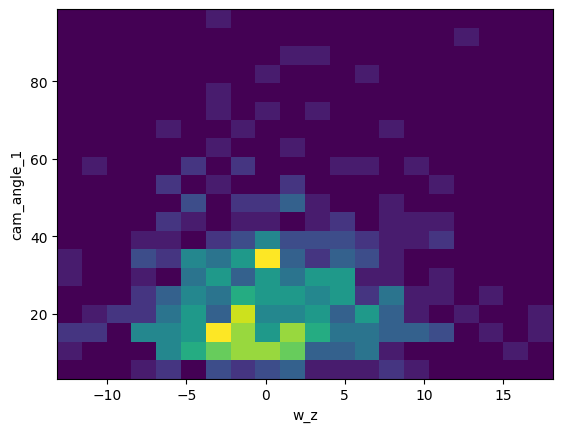

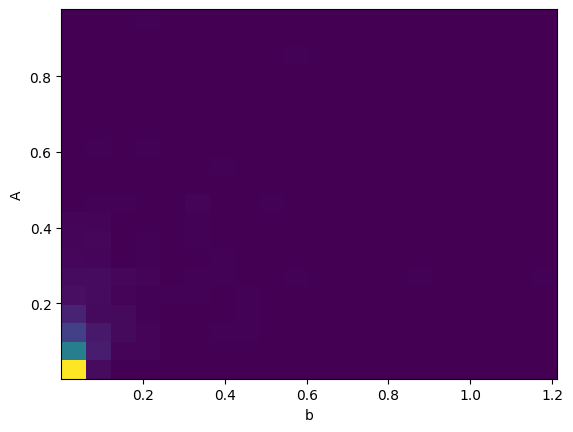

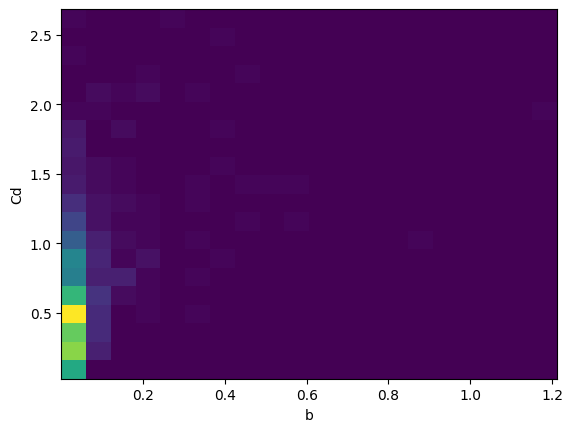

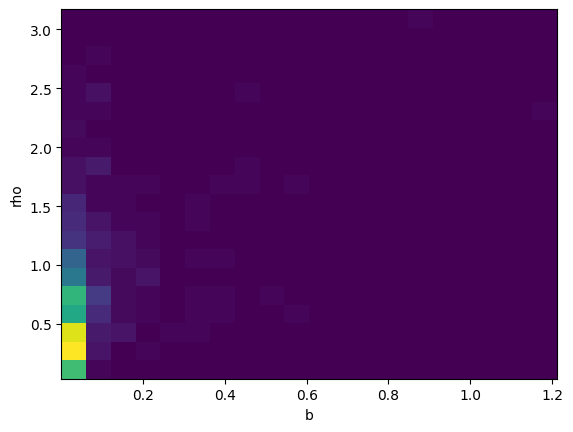

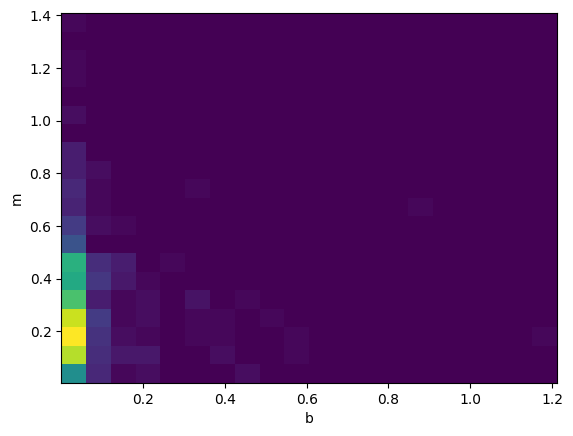

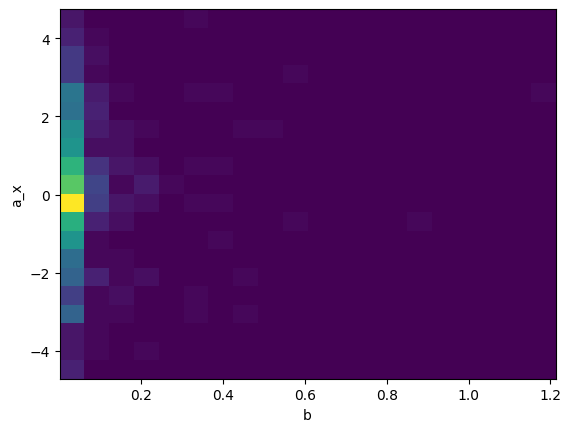

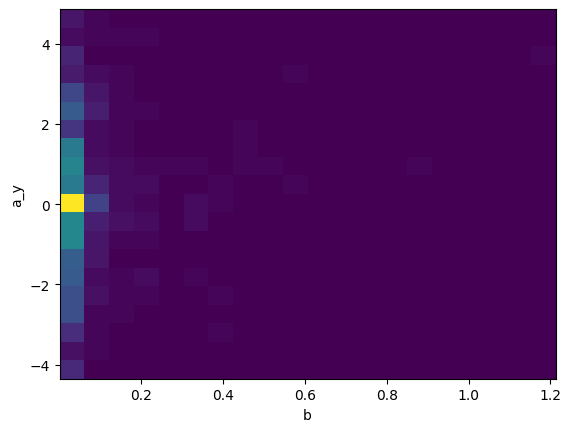

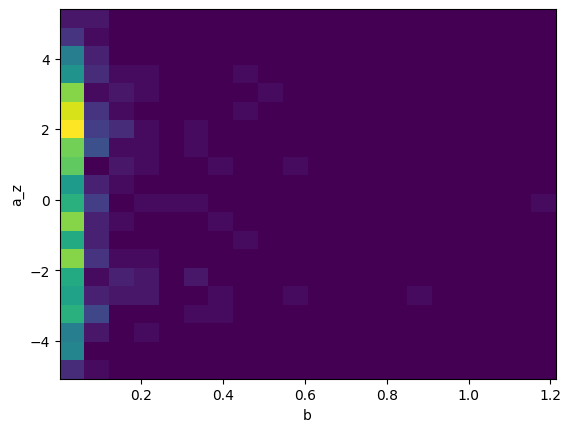

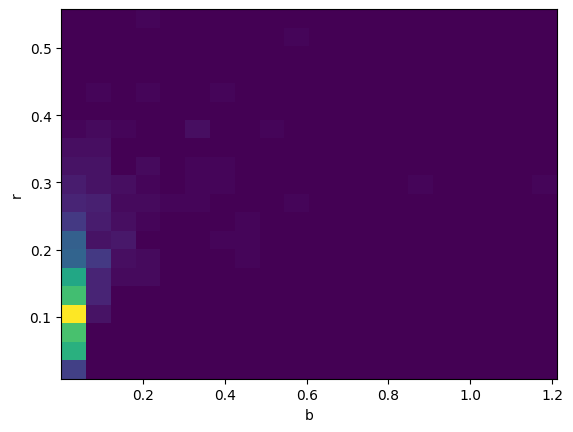

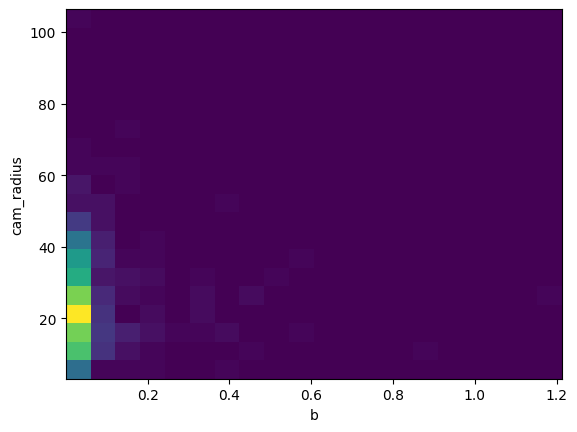

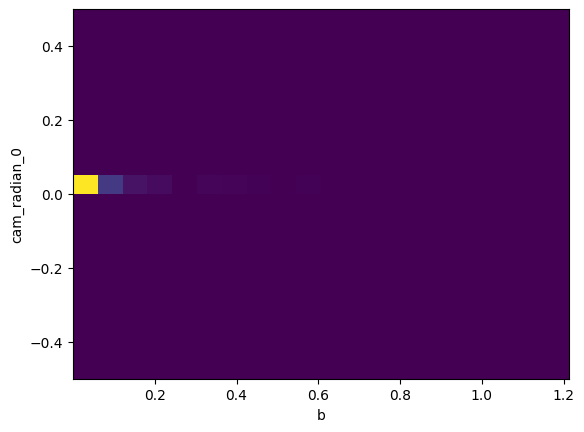

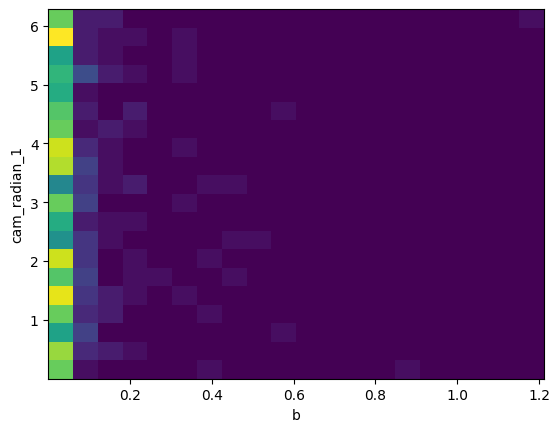

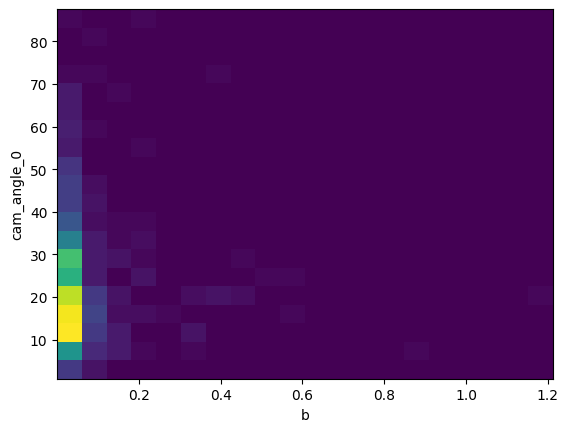

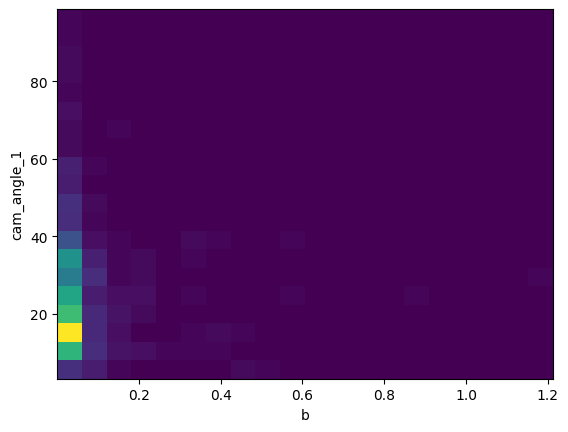

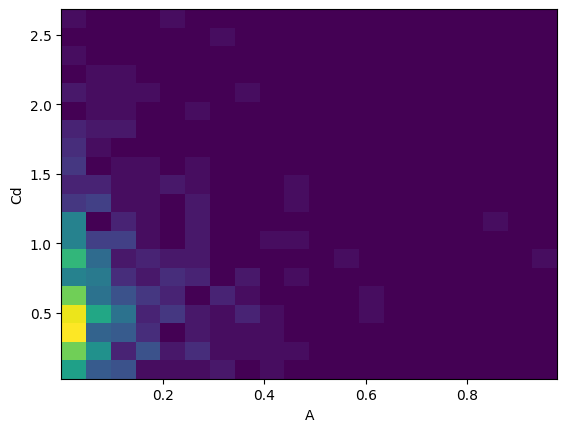

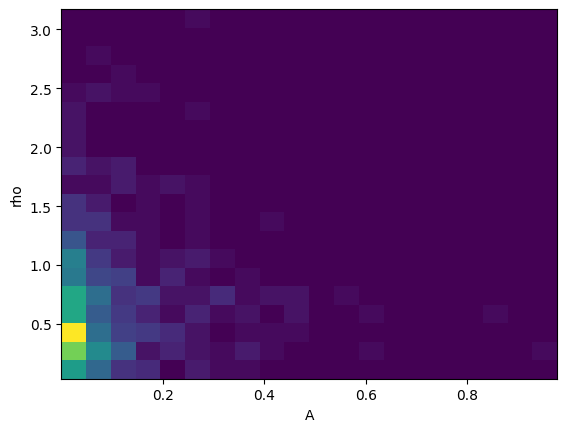

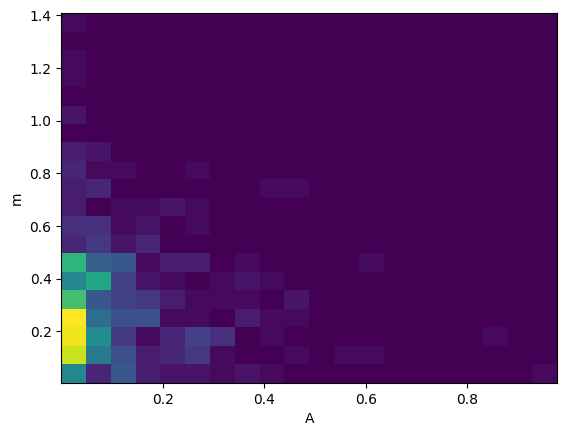

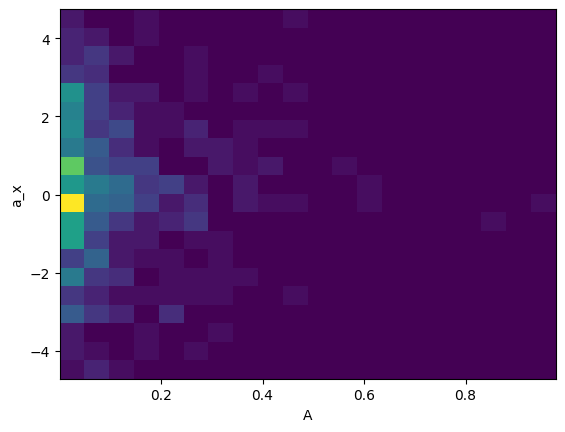

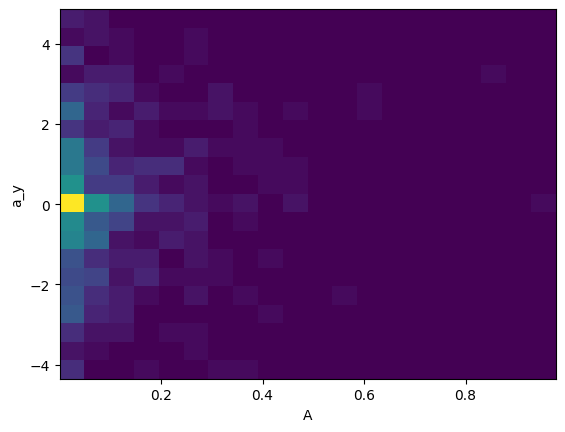

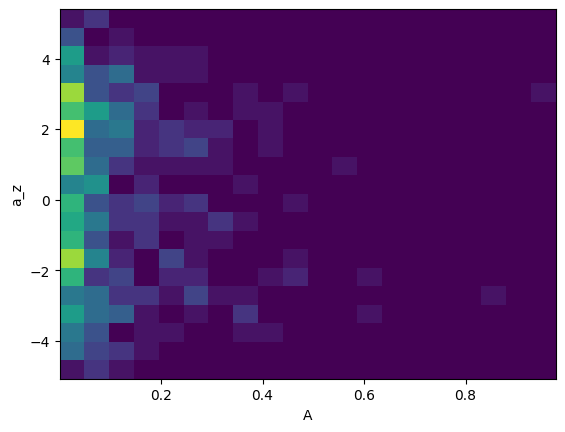

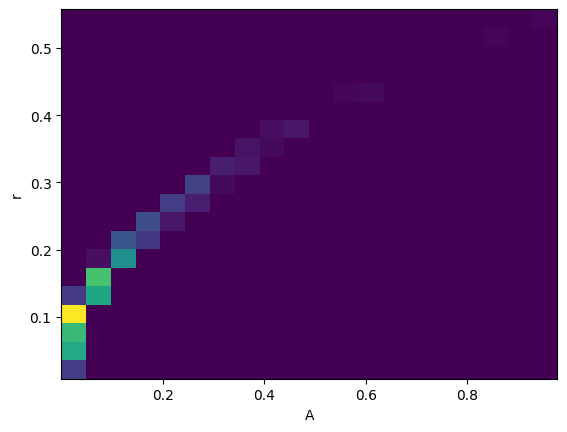

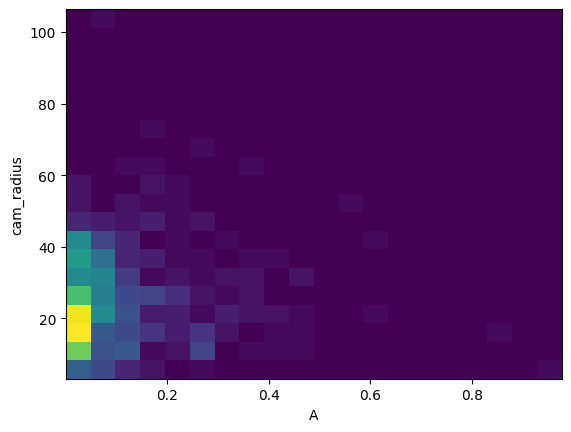

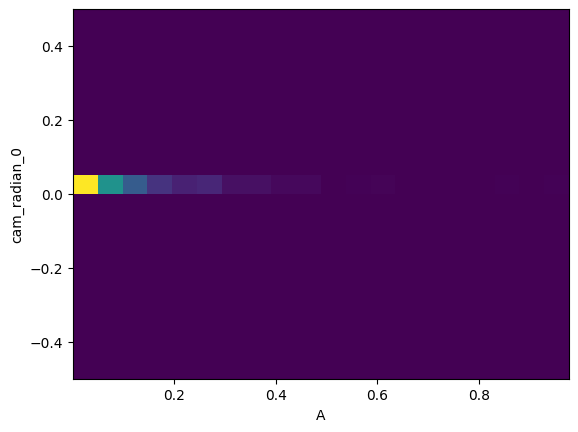

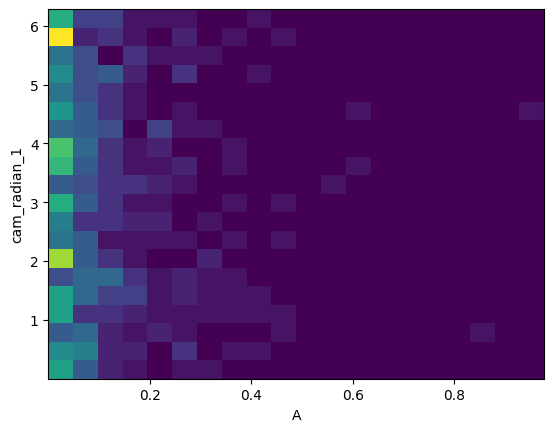

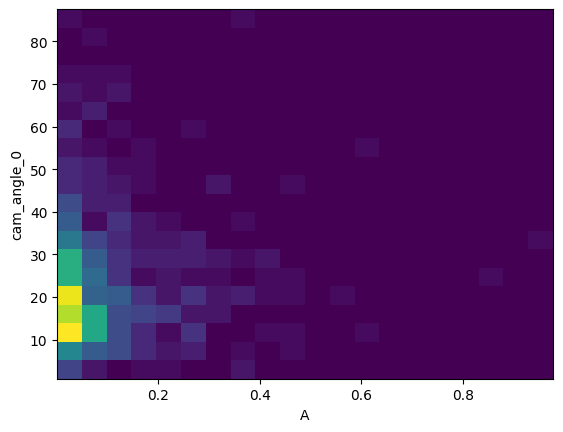

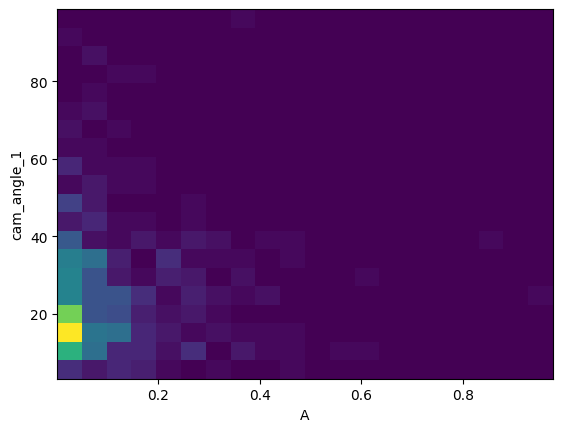

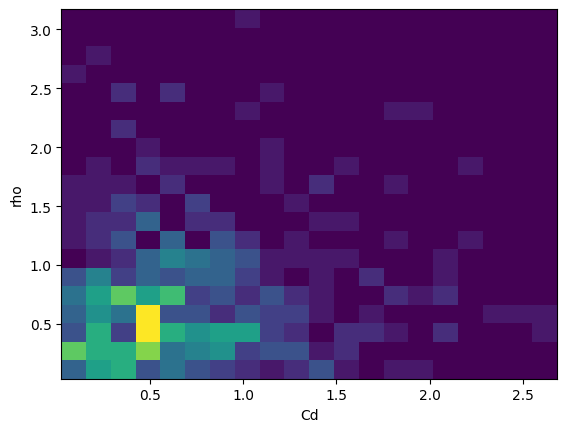

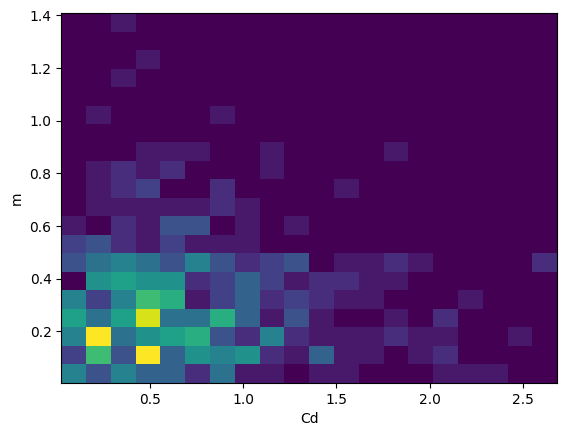

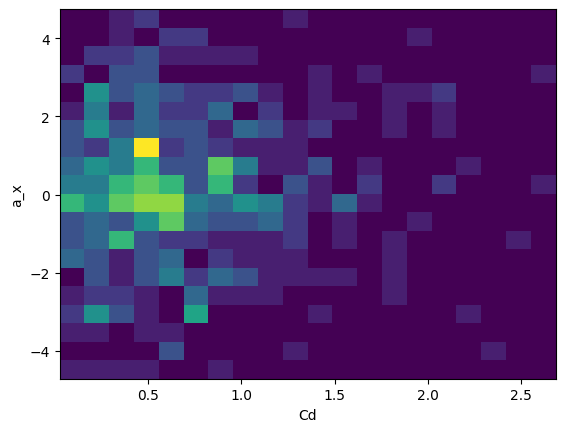

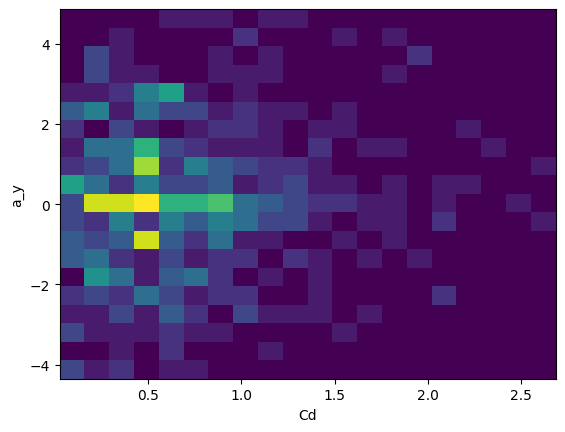

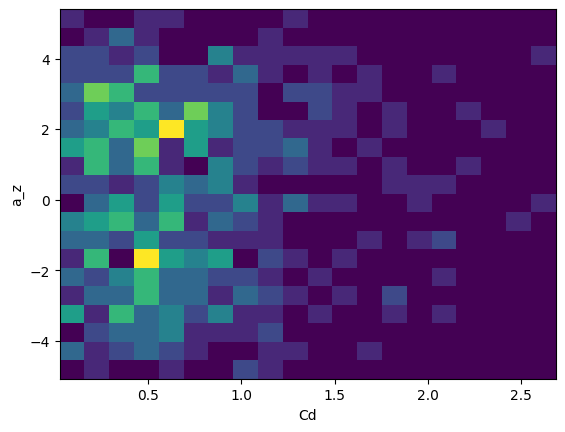

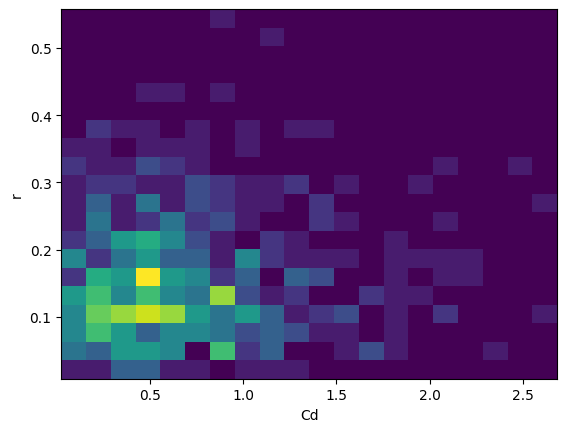

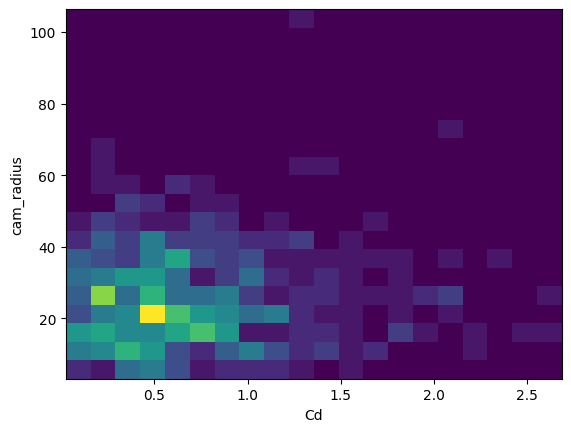

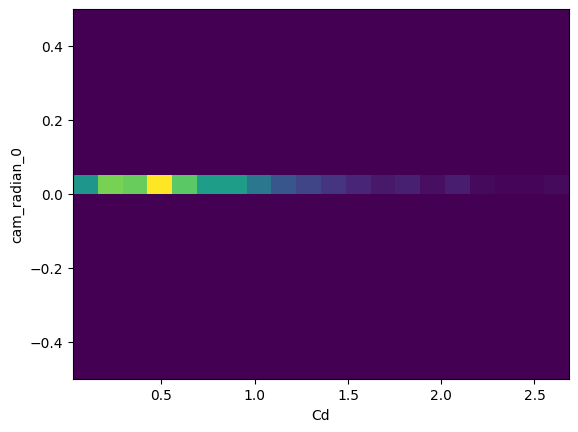

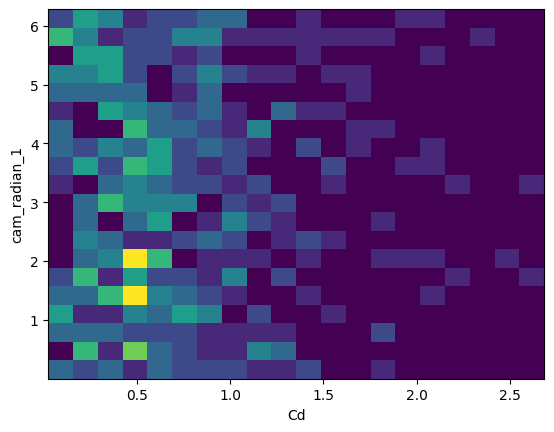

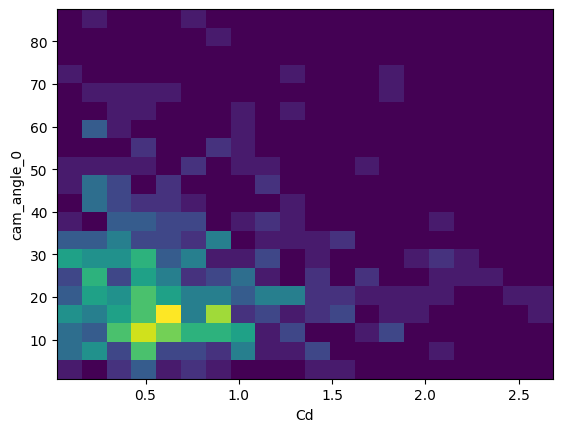

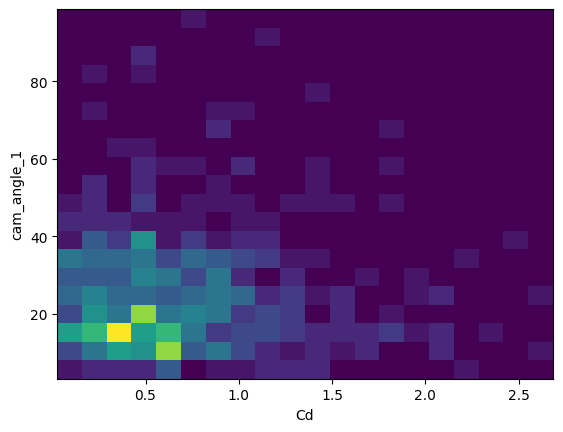

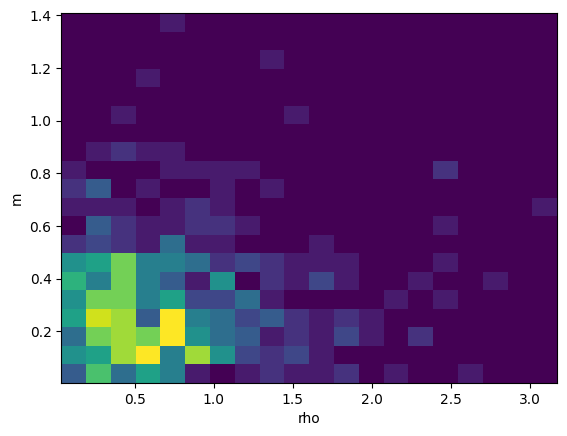

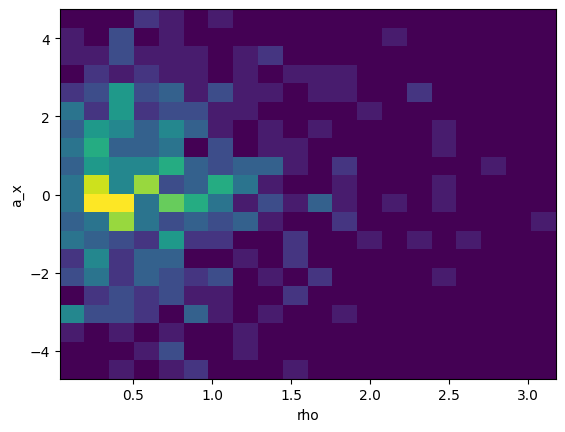

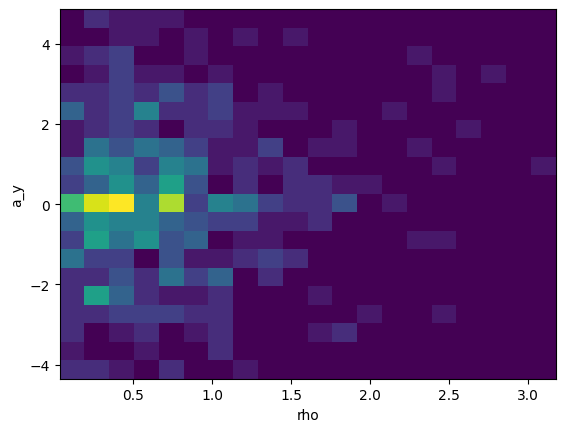

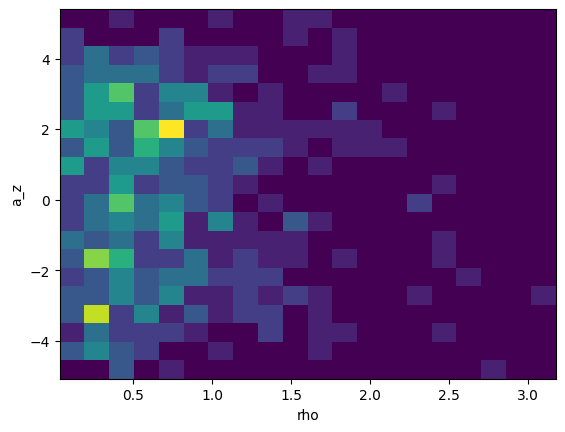

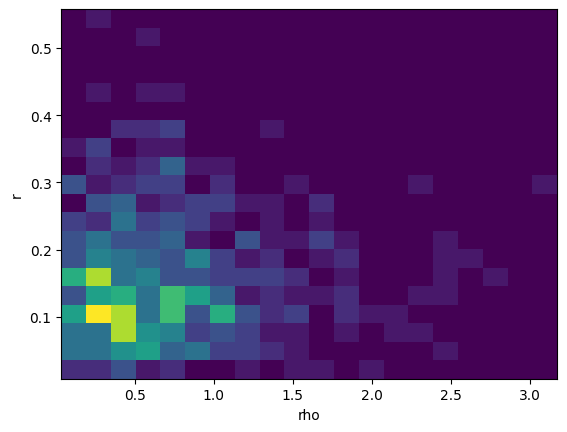

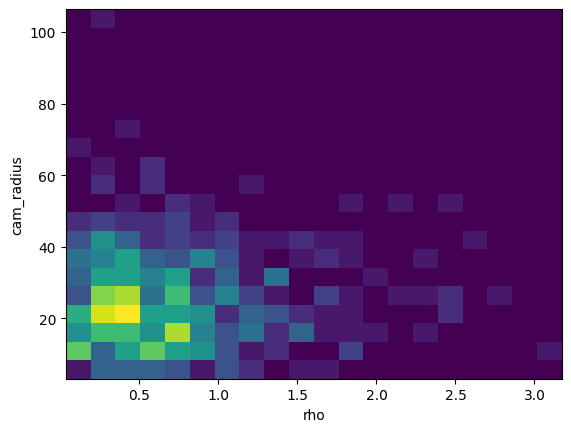

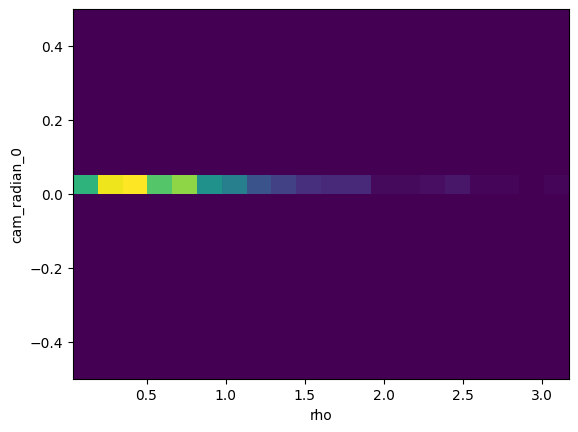

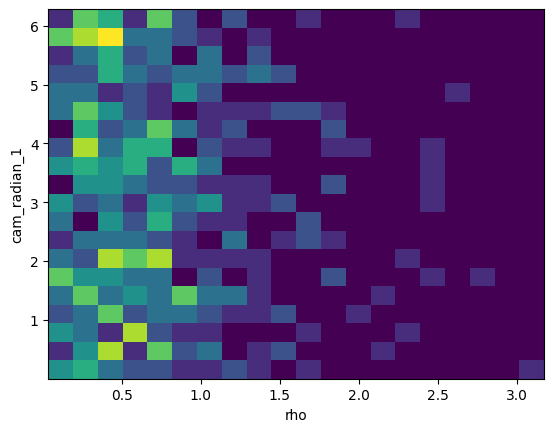

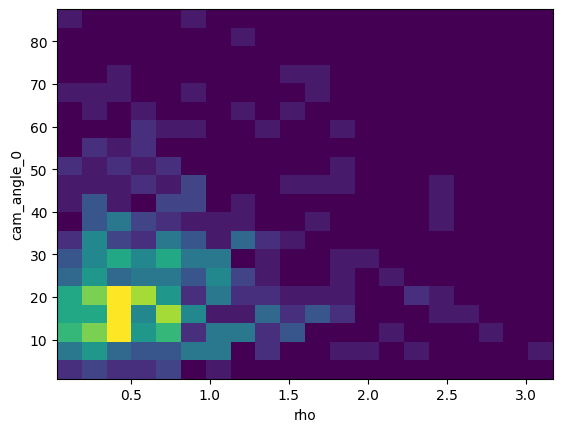

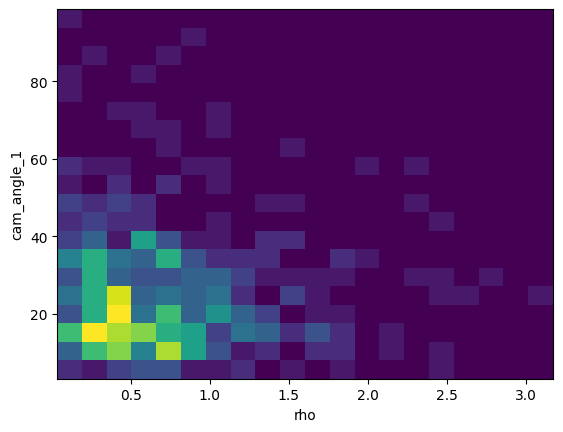

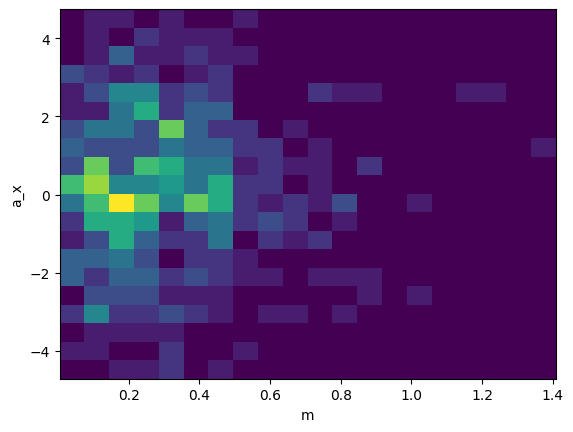

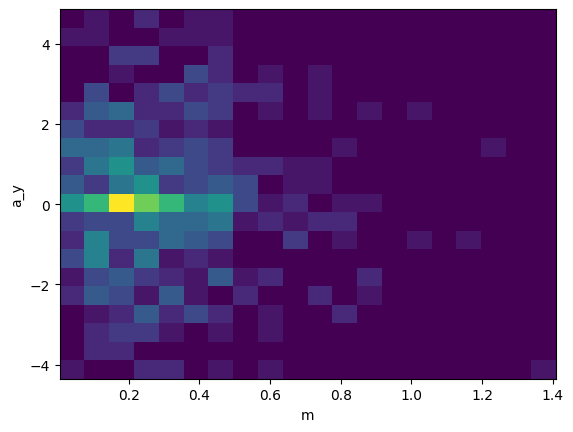

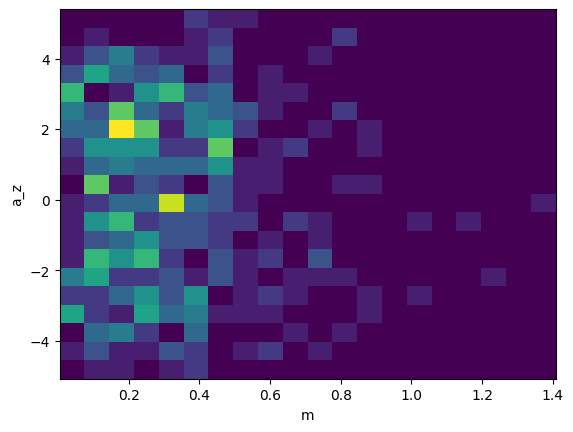

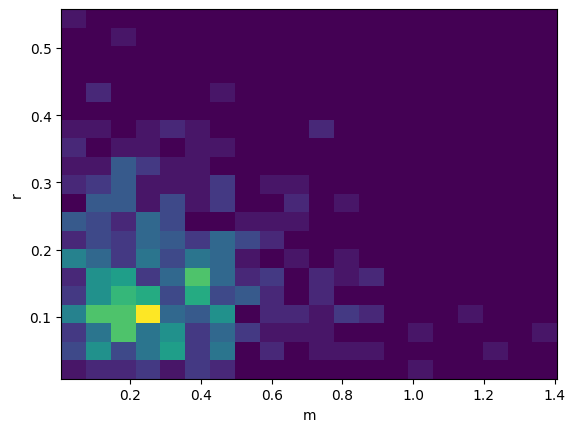

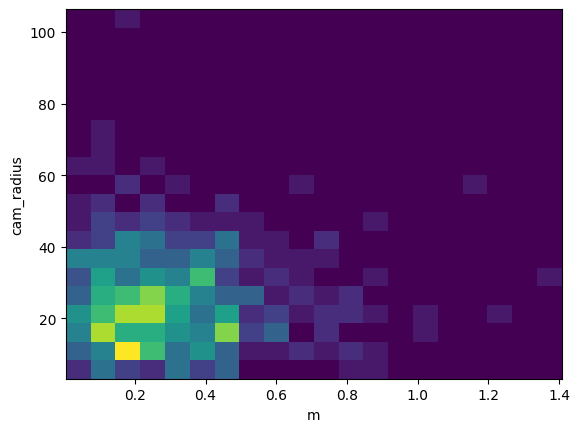

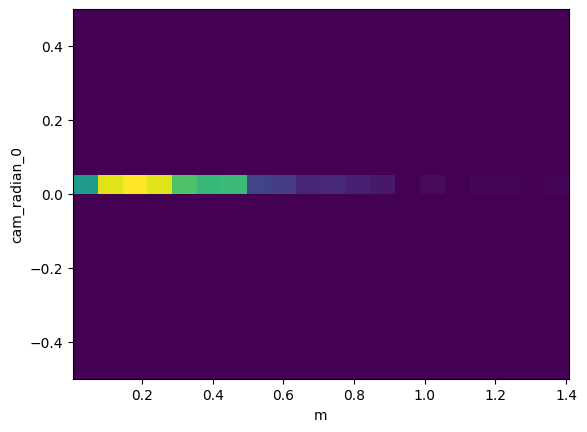

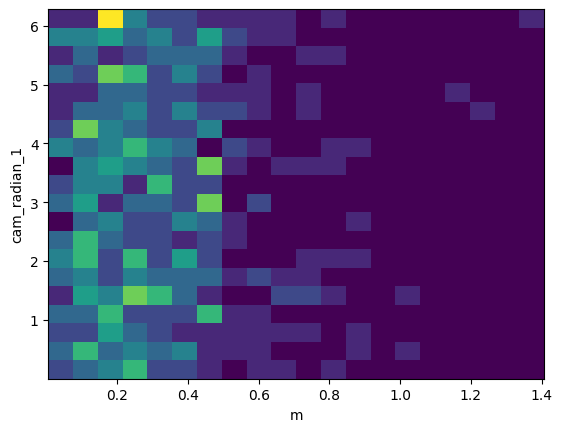

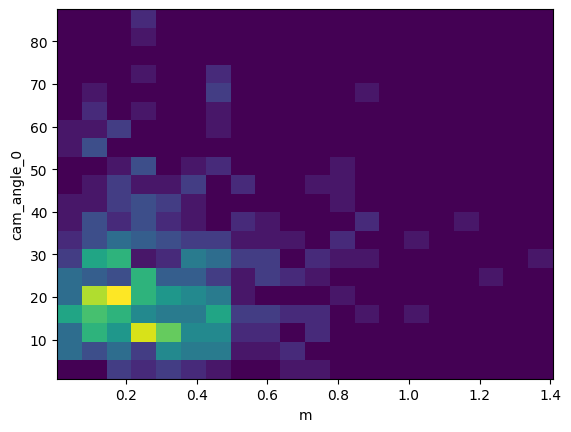

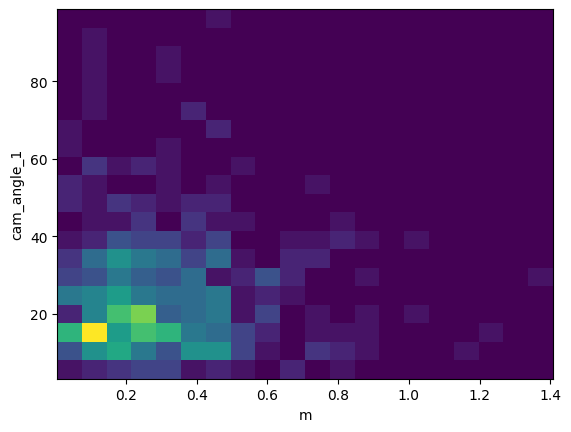

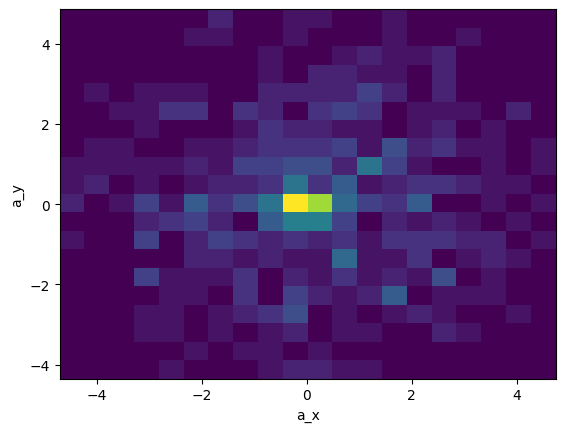

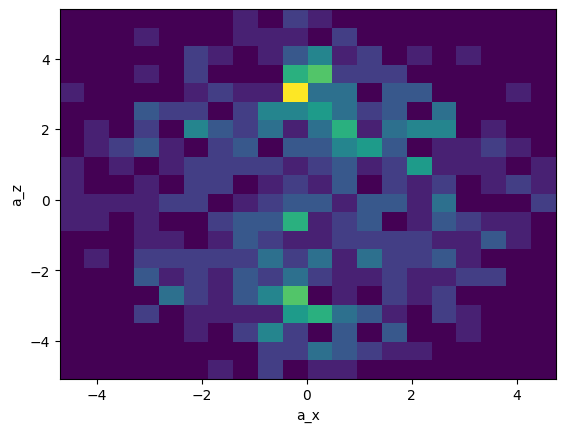

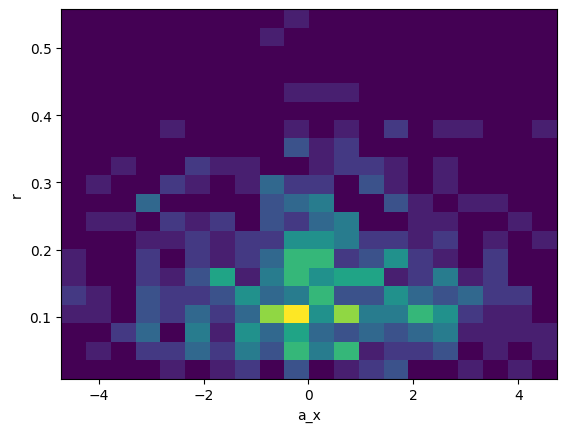

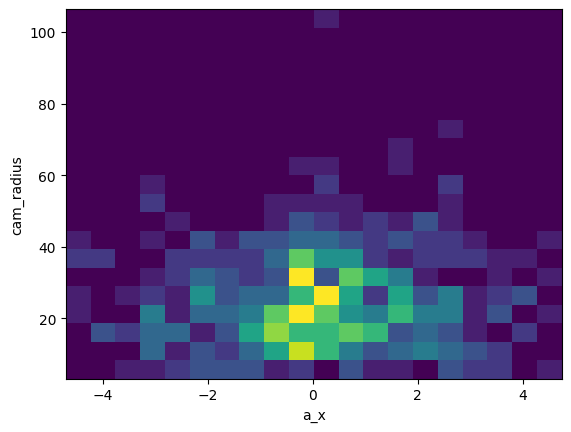

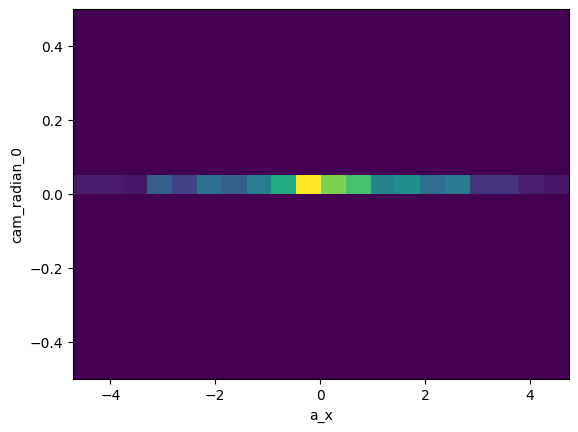

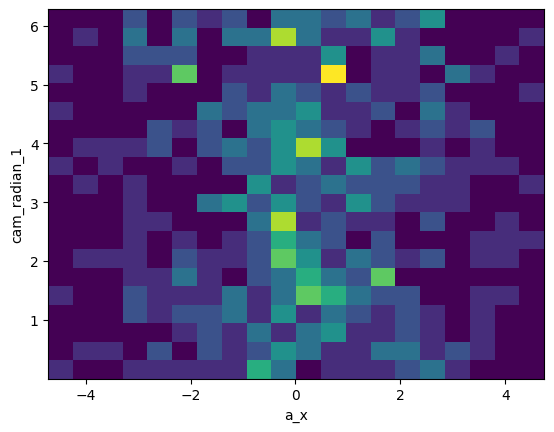

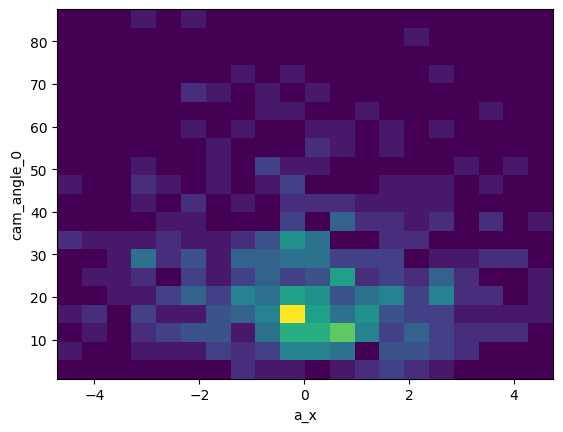

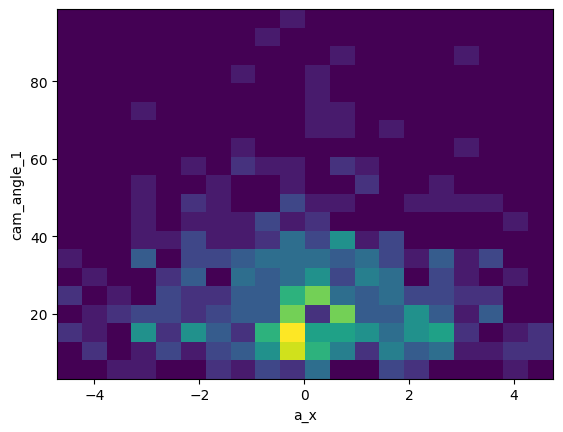

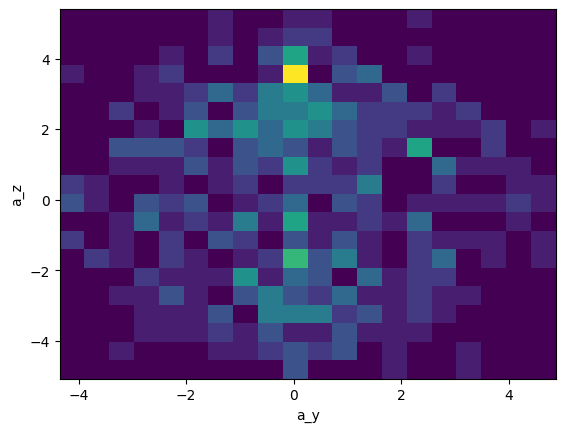

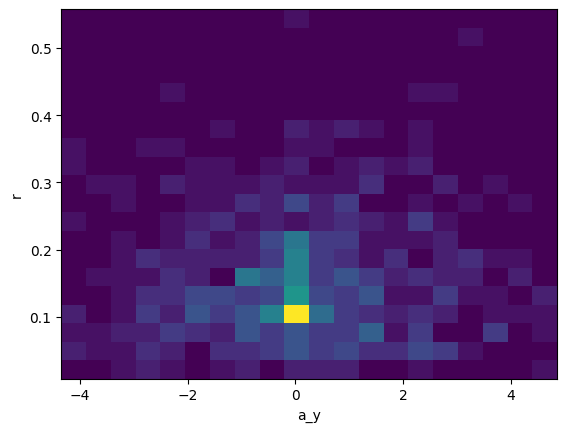

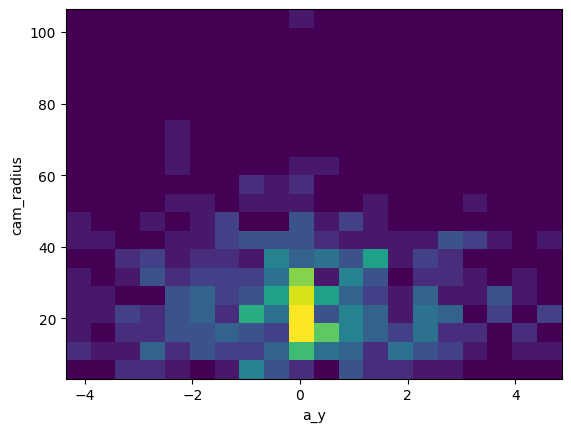

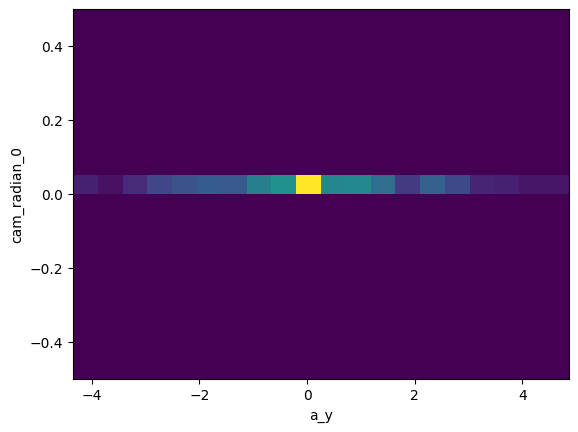

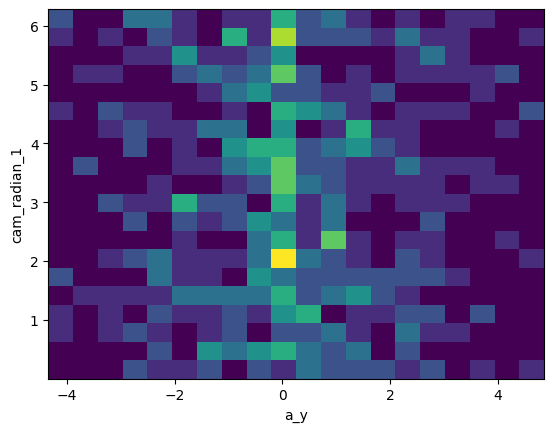

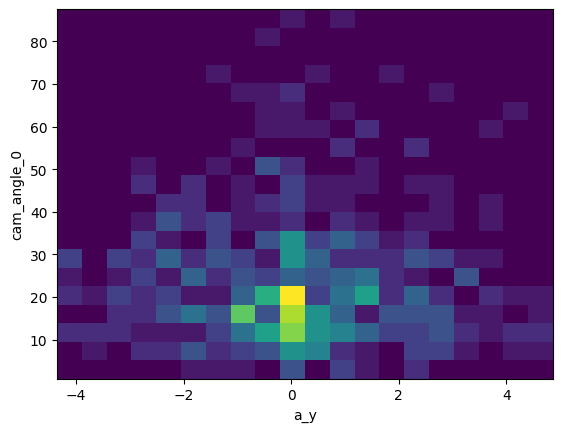

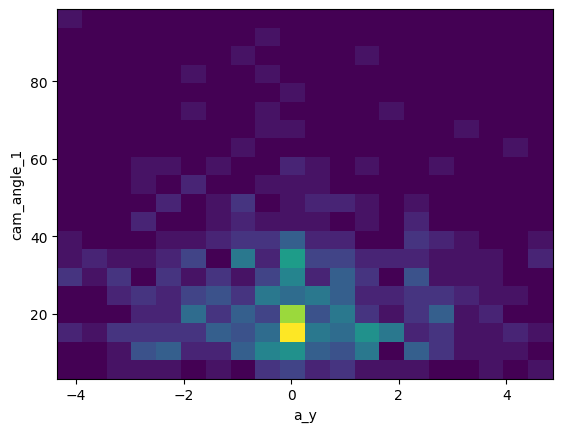

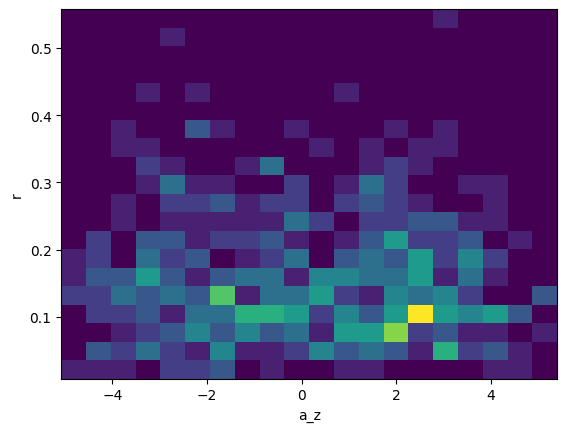

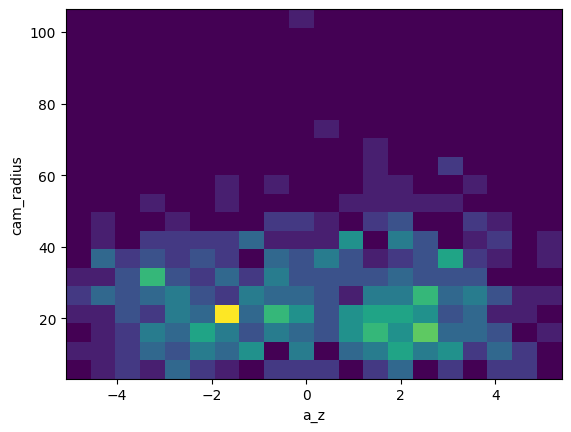

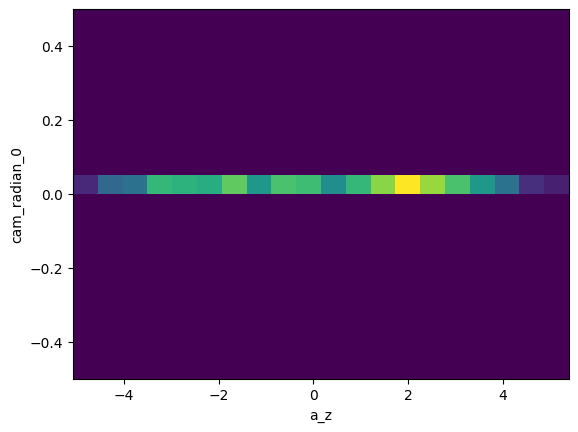

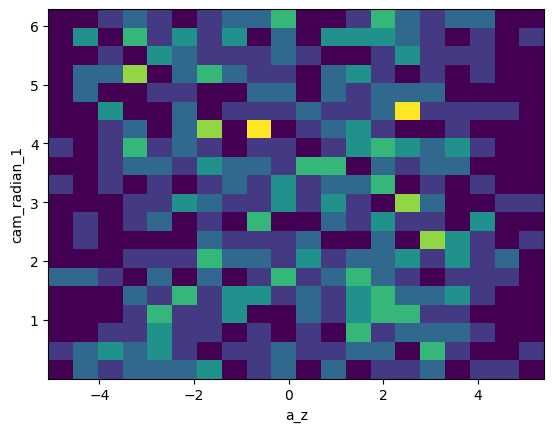

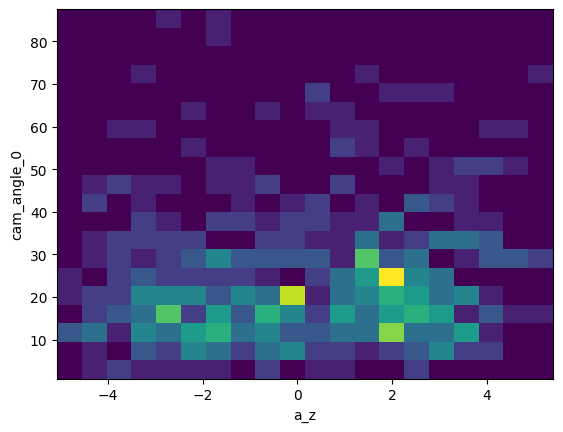

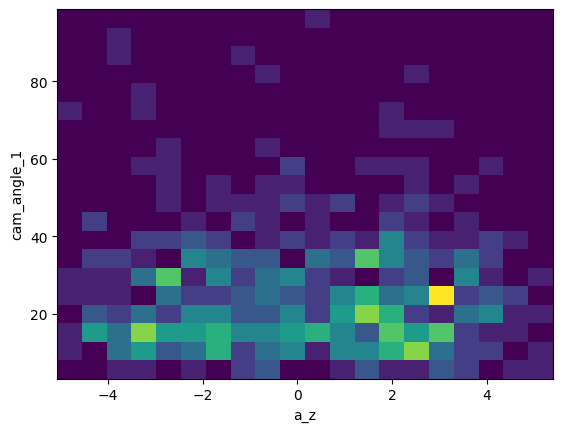

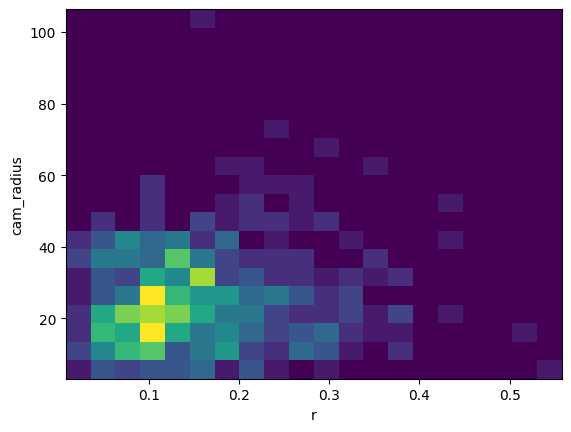

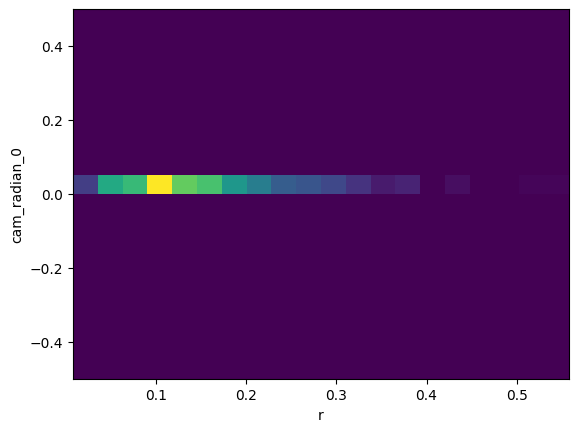

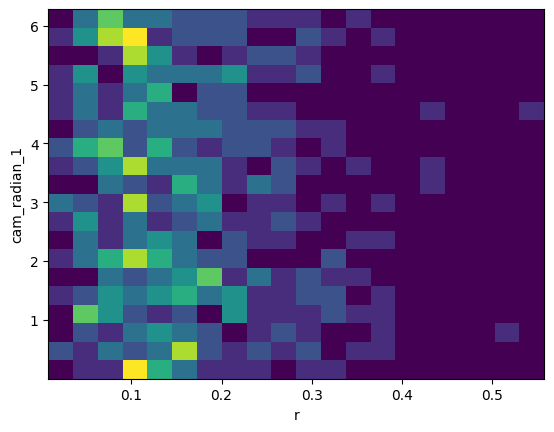

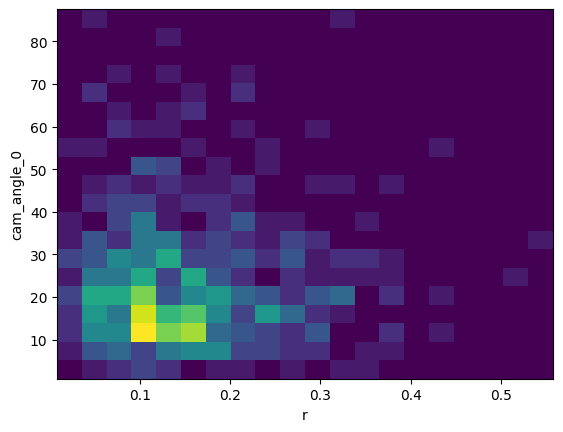

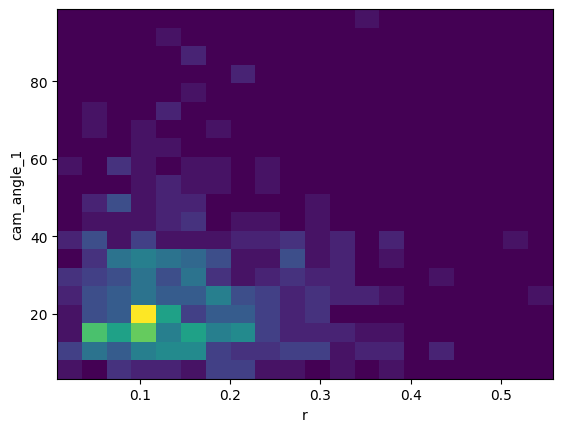

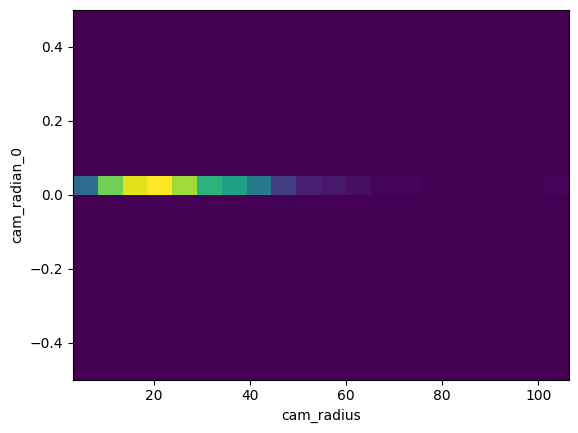

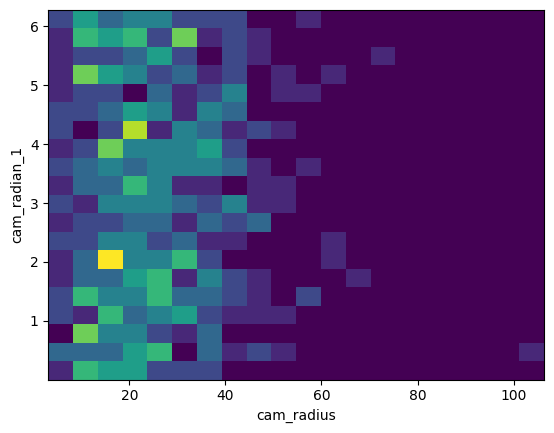

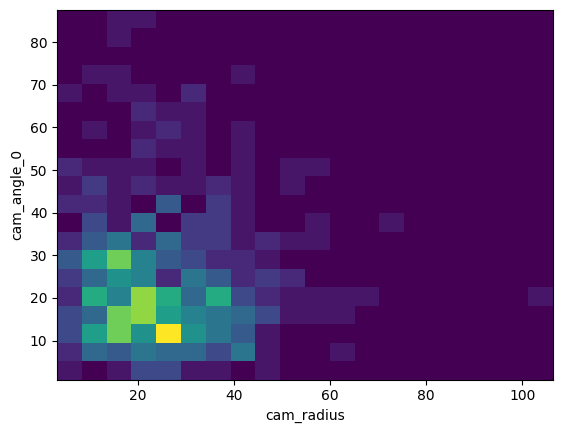

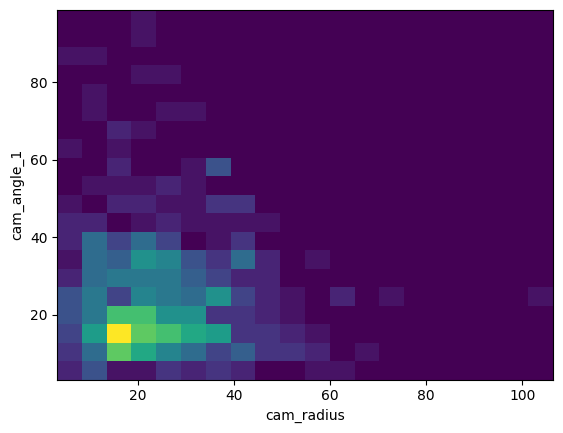

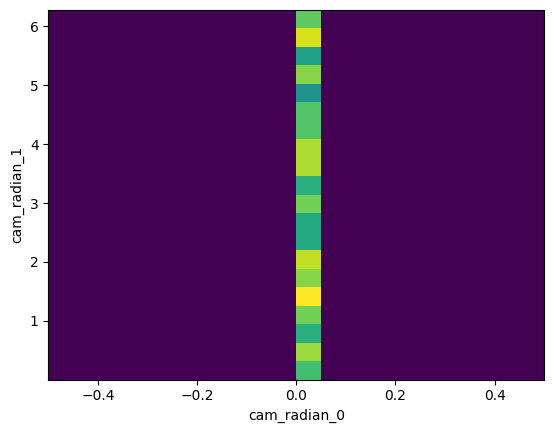

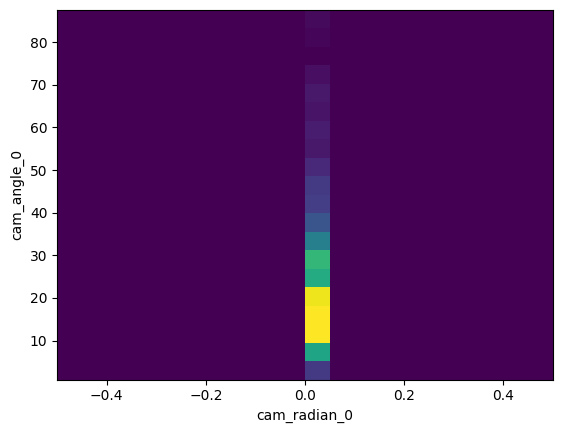

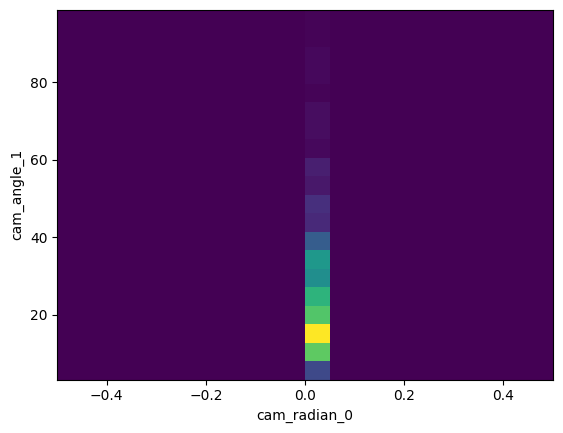

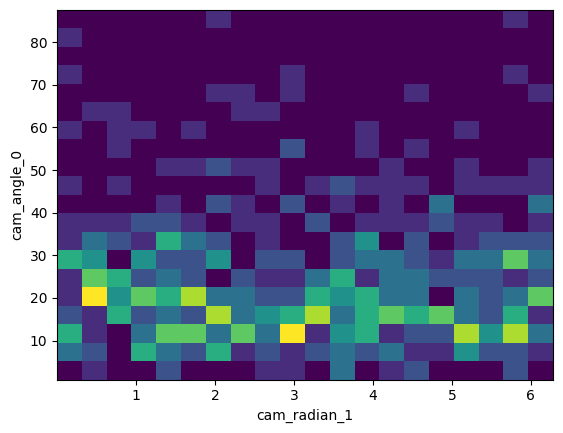

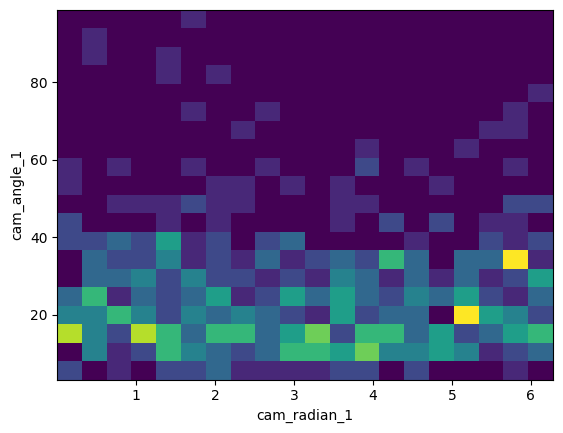

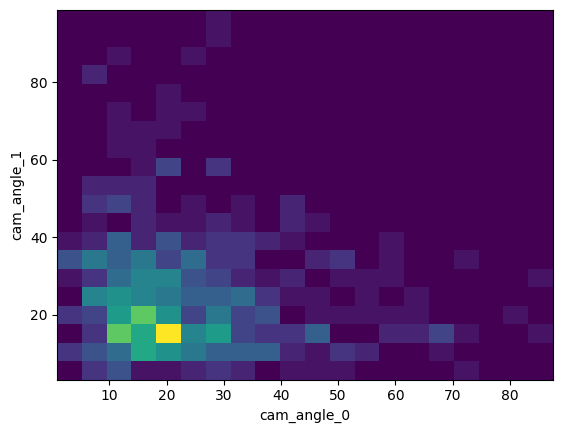

In [10]:
# plot 2d hist of all pairs

for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.hist2d(df.iloc[:, i], df.iloc[:, j], bins=20)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

(0.0, 90.0)

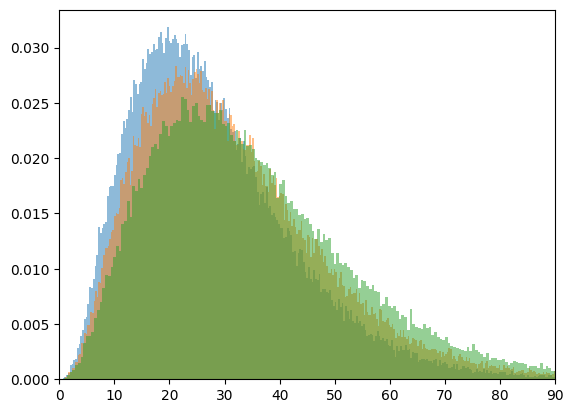

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# test different gamma functions

x = np.random.gamma(3.5, 8, 100000)
y = np.random.gamma(3.5, 9, 100000)
z = np.random.gamma(3.5, 10, 100000)

plt.hist(x, bins=500, density=True, alpha=0.5);
plt.hist(y, bins=500, density=True, alpha=0.5);
plt.hist(z, bins=500, density=True, alpha=0.5);
plt.xlim(0, 90)